In [33]:
import sys
sys.path.append('/usr/local/python')
import argparse

parser = argparse.ArgumentParser()
parser.add_argument("--image_dir", default="../../examples/media/", help="Process a directory of images. Read all standard formats (jpg, png, bmp, etc.).")
parser.add_argument("--no_display", default=False, help="Enable to disable the visual display.")
args = parser.parse_known_args()


from pose_estimator_2d import openpose_estimator
from pose_estimator_3d import estimator_3d
from utils import smooth, vis, camera
from bvh_skeleton import openpose_skeleton, h36m_skeleton, cmu_skeleton

import cv2
import importlib
import numpy as np
import os
from pathlib import Path
from IPython.display import HTML

## Initialize 2d pose estimator

In [39]:
# more 2d pose estimators like HRNet, PoseResNet, CPN, etc., will be added later
e2d = openpose_estimator.OpenPoseEstimator(model_folder="~/openpose/models") # set model_folder to /path/to/openpose/models

## Estimate 2D pose from video

In [40]:
video_file = Path('miscs/cxk.mp4') # video file to process
output_dir = Path(f'miscs/{video_file.stem}_cache')
if not output_dir.exists():
    os.makedirs(output_dir)
    
cap = cv2.VideoCapture(str(video_file))
keypoints_list = []
img_width, img_height = None, None

In [10]:
# cap = cv2.VideoCapture('~/videos/doja-cat-dance-coreography-cropped.mp4')

In [41]:
while True:
    ret, frame = cap.read()
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if not ret:
        print("breaking")
        break
    img_height = frame.shape[0]
    img_width = frame.shape[1]
    
    # returned shape will be (num_of_human, 25, 3)
    # last dimension includes (x, y, confidence)
    keypoints = e2d.estimate(img_list=[frame])[0]
    if not isinstance(keypoints, np.ndarray) or len(keypoints.shape) != 3:
        # failed to detect human
        print('failed to detect human')
        keypoints_list.append(None)
    else:
        # we assume that the image only contains 1 person
        # multi-person video needs some extra processes like grouping
        # maybe we will implemented it in the future
        # print(f'keypoints {keypoints[0]}')
        keypoints_list.append(keypoints[0])
cap.release()

[[[175  89  94]
  [189 103 108]
  [182  96 101]
  ...
  [179 157 161]
  [190 168 172]
  [157 135 139]]

 [[189 103 108]
  [203 117 122]
  [197 111 116]
  ...
  [203 181 185]
  [201 179 183]
  [192 170 174]]

 [[182  96 101]
  [197 111 116]
  [197 111 116]
  ...
  [208 186 190]
  [204 182 186]
  [182 160 164]]

 ...

 [[162 162 174]
  [191 191 203]
  [188 188 200]
  ...
  [173 176 189]
  [172 175 188]
  [146 149 162]]

 [[181 181 193]
  [185 185 197]
  [194 194 206]
  ...
  [175 178 191]
  [179 182 195]
  [156 159 172]]

 [[147 147 159]
  [184 184 196]
  [169 169 181]
  ...
  [153 156 169]
  [159 162 175]
  [137 140 153]]]
keypoints [[7.77484924e+02 4.15610687e+02 8.36129427e-01]
 [8.18747437e+02 4.59736786e+02 8.73112798e-01]
 [7.45135986e+02 4.80135925e+02 8.21532249e-01]
 [7.03906189e+02 5.47994812e+02 8.08374822e-01]
 [6.21582642e+02 5.89119324e+02 7.51981080e-01]
 [8.98182861e+02 4.50826385e+02 7.50671566e-01]
 [9.98180054e+02 5.77419128e+02 8.31434131e-01]
 [1.00426794e+03 7.06862

keypoints [[7.74610352e+02 3.62375305e+02 8.18235517e-01]
 [8.12850952e+02 4.09534393e+02 9.17593777e-01]
 [7.39337402e+02 4.15574982e+02 8.13992918e-01]
 [6.71475830e+02 4.80198181e+02 8.05892825e-01]
 [5.68566162e+02 5.09731995e+02 7.05328703e-01]
 [8.89382019e+02 3.91938934e+02 7.81454563e-01]
 [1.00130499e+03 5.06834076e+02 7.95084596e-01]
 [9.77660278e+02 6.00874390e+02 7.92048812e-01]
 [8.89426147e+02 6.00912964e+02 7.16816902e-01]
 [8.45166992e+02 6.06793335e+02 6.90431416e-01]
 [8.24636597e+02 7.74540894e+02 7.71561265e-01]
 [8.30540710e+02 1.00416077e+03 6.78091347e-01]
 [9.39385376e+02 5.97918213e+02 6.65533900e-01]
 [1.00109314e+03 8.12845825e+02 8.07313859e-01]
 [9.51206238e+02 9.07169189e+02 8.57178986e-01]
 [7.62667908e+02 3.39029175e+02 9.00504172e-01]
 [7.92211121e+02 3.38983490e+02 8.68219674e-01]
 [7.39311951e+02 3.36080261e+02 1.19666375e-01]
 [8.33376404e+02 3.33083008e+02 8.48399222e-01]
 [9.83542053e+02 9.86439758e+02 7.30767369e-01]
 [9.98344604e+02 9.74774414e+0

keypoints [[7.86310120e+02 3.15350433e+02 9.04101193e-01]
 [8.12705505e+02 3.83118011e+02 8.99621367e-01]
 [7.39192505e+02 3.91935211e+02 7.84102738e-01]
 [6.44999451e+02 4.36161011e+02 7.72202373e-01]
 [5.27415100e+02 4.59577972e+02 6.94657981e-01]
 [8.86406372e+02 3.65530640e+02 7.97017097e-01]
 [1.02468860e+03 4.56696655e+02 8.41365099e-01]
 [9.54090027e+02 4.77254730e+02 7.37375021e-01]
 [8.95228149e+02 6.00880005e+02 7.12033153e-01]
 [8.39431213e+02 6.06812927e+02 6.90517545e-01]
 [8.12714783e+02 8.09830078e+02 8.51571083e-01]
 [8.56933350e+02 9.77689392e+02 8.16820920e-01]
 [9.51053101e+02 5.95010315e+02 6.76255941e-01]
 [9.95332092e+02 8.27522400e+02 7.38094866e-01]
 [9.54279785e+02 9.54135376e+02 7.98886359e-01]
 [7.65744812e+02 2.94871094e+02 9.11908031e-01]
 [8.03971863e+02 2.91917511e+02 8.76628697e-01]
 [7.42251343e+02 3.06630768e+02 7.32575655e-01]
 [8.33522400e+02 2.94735809e+02 9.33940649e-01]
 [1.00999054e+03 1.01591992e+03 7.26305842e-01]
 [1.01887177e+03 1.00126807e+0

keypoints [[7.6565985e+02 2.9191315e+02 9.4691455e-01]
 [8.0103986e+02 3.8309848e+02 8.3209783e-01]
 [7.2747034e+02 3.9493387e+02 7.4305737e-01]
 [6.2148407e+02 4.3026825e+02 6.4601171e-01]
 [5.0676379e+02 4.3604816e+02 5.7537997e-01]
 [8.7463208e+02 3.6541876e+02 7.5147432e-01]
 [1.0453232e+03 4.2136166e+02 8.0944169e-01]
 [9.9240088e+02 3.9786389e+02 7.4573648e-01]
 [8.9813965e+02 6.2448407e+02 6.5669006e-01]
 [8.4229413e+02 6.2742542e+02 6.4019209e-01]
 [8.0405139e+02 8.4222968e+02 8.0580080e-01]
 [8.6575958e+02 9.9524347e+02 7.6520729e-01]
 [9.5107373e+02 6.2152228e+02 6.5522397e-01]
 [9.5404474e+02 8.3635352e+02 8.2080710e-01]
 [9.7768079e+02 9.5109375e+02 8.7480581e-01]
 [7.4234674e+02 2.8308505e+02 8.7256253e-01]
 [7.8344000e+02 2.7142212e+02 9.2052776e-01]
 [7.3039740e+02 3.0957629e+02 6.6165382e-01]
 [8.1291095e+02 2.9195547e+02 8.9212263e-01]
 [9.9230713e+02 1.0012442e+03 8.0658281e-01]
 [1.0071434e+03 9.9525946e+02 7.7053398e-01]
 [9.7468073e+02 9.5409058e+02 6.4678735e-01]


keypoints [[7.65651428e+02 2.91893433e+02 9.47946072e-01]
 [8.01110474e+02 3.88965637e+02 8.70447993e-01]
 [7.18789001e+02 4.06587433e+02 7.67339349e-01]
 [6.18606750e+02 4.47842621e+02 6.43726110e-01]
 [5.06698364e+02 4.56801300e+02 5.98858118e-01]
 [8.83411743e+02 3.74288666e+02 7.20888853e-01]
 [1.01005701e+03 4.09495239e+02 7.71114767e-01]
 [1.08951953e+03 4.71371216e+02 7.51942694e-01]
 [8.95209167e+02 6.03904907e+02 6.47439659e-01]
 [8.42335388e+02 6.09745972e+02 6.31975353e-01]
 [7.86393005e+02 8.33322754e+02 8.61612618e-01]
 [8.59995972e+02 9.98200684e+02 7.73011446e-01]
 [9.48126465e+02 6.01001892e+02 6.10846519e-01]
 [9.27471130e+02 8.33427917e+02 8.49946976e-01]
 [9.83504761e+02 9.07074280e+02 8.01429927e-01]
 [7.42368896e+02 2.83012970e+02 8.80207300e-01]
 [7.86207886e+02 2.71444061e+02 9.11548793e-01]
 [7.36199341e+02 3.15312164e+02 7.78344214e-01]
 [8.12997742e+02 2.94869019e+02 8.75109136e-01]
 [9.86520508e+02 9.89391357e+02 7.58602142e-01]
 [1.01000397e+03 9.77638184e+0

keypoints [[7.86449646e+02 2.94976685e+02 9.27281797e-01]
 [8.24620728e+02 3.94910431e+02 8.04297090e-01]
 [7.36210205e+02 4.09502930e+02 7.86011100e-01]
 [6.65720093e+02 4.80261688e+02 8.05411637e-01]
 [5.74431519e+02 5.12660706e+02 6.89884961e-01]
 [9.24722778e+02 3.88941437e+02 7.58127511e-01]
 [1.02767261e+03 4.83201294e+02 8.19679081e-01]
 [1.11299634e+03 5.83276489e+02 7.44290173e-01]
 [8.98141907e+02 6.01039368e+02 7.08217502e-01]
 [8.42235229e+02 6.06797852e+02 6.90960884e-01]
 [7.42329224e+02 7.98152100e+02 8.24064851e-01]
 [8.62816528e+02 9.77594421e+02 7.76453018e-01]
 [9.51104553e+02 6.00899109e+02 7.08983183e-01]
 [9.36450928e+02 7.86246887e+02 8.09322834e-01]
 [9.77581177e+02 9.68769897e+02 7.76195228e-01]
 [7.65845886e+02 2.88949707e+02 9.26806629e-01]
 [8.09718262e+02 2.83094330e+02 8.70256126e-01]
 [7.50990112e+02 3.12532959e+02 7.92727113e-01]
 [8.36481506e+02 3.00683929e+02 8.58034492e-01]
 [9.74737793e+02 1.03063867e+03 7.27890968e-01]
 [9.98276062e+02 1.02464294e+0

[[[172  88  93]
  [186 102 107]
  [179  95 100]
  ...
  [176 156 160]
  [187 167 171]
  [154 134 138]]

 [[186 102 107]
  [200 116 121]
  [194 110 115]
  ...
  [199 179 183]
  [198 178 182]
  [189 169 173]]

 [[179  95 100]
  [194 110 115]
  [194 110 115]
  ...
  [205 185 189]
  [201 181 185]
  [179 159 163]]

 ...

 [[162 162 174]
  [191 191 203]
  [188 188 200]
  ...
  [170 175 188]
  [169 174 187]
  [143 148 161]]

 [[181 181 193]
  [185 185 197]
  [194 194 206]
  ...
  [172 177 190]
  [176 181 194]
  [152 157 170]]

 [[147 147 159]
  [184 184 196]
  [169 169 181]
  ...
  [150 155 168]
  [156 161 174]
  [134 139 152]]]
keypoints [[8.33268066e+02 3.44870636e+02 8.73235583e-01]
 [8.51069275e+02 4.44941406e+02 7.89565980e-01]
 [7.59837402e+02 4.53745056e+02 7.60964870e-01]
 [7.12796631e+02 5.71484802e+02 8.11106861e-01]
 [6.36270691e+02 6.48160034e+02 7.49337673e-01]
 [9.42343811e+02 4.39019226e+02 7.38757789e-01]
 [9.98311096e+02 5.74474243e+02 7.88810134e-01]
 [1.02774561e+03 7.15759

keypoints [[8.6871210e+02 4.0078104e+02 8.1854689e-01]
 [8.7170154e+02 5.0086987e+02 7.9639447e-01]
 [7.8639624e+02 5.0081415e+02 7.8071511e-01]
 [7.6284888e+02 6.3623047e+02 7.4545503e-01]
 [7.4519415e+02 7.5107324e+02 6.7528051e-01]
 [9.5417389e+02 5.0367929e+02 7.6097035e-01]
 [9.8352515e+02 6.4797156e+02 7.5794435e-01]
 [9.7455212e+02 8.0696436e+02 7.7822745e-01]
 [8.6880707e+02 6.9503619e+02 7.1868473e-01]
 [8.1877313e+02 6.9519995e+02 7.0055944e-01]
 [7.5688037e+02 8.8047003e+02 7.9855883e-01]
 [8.4228632e+02 1.0159063e+03 6.7528021e-01]
 [9.1881366e+02 6.9211597e+02 7.1383905e-01]
 [9.2166431e+02 8.1874823e+02 6.0966355e-01]
 [9.2776282e+02 1.0306299e+03 7.0179194e-01]
 [8.5111621e+02 3.8315561e+02 8.5215348e-01]
 [8.8363550e+02 3.8307294e+02 8.8854402e-01]
 [8.2753253e+02 4.0081702e+02 7.8728771e-01]
 [9.1000098e+02 3.9487659e+02 8.3601922e-01]
 [9.1291461e+02 1.0747999e+03 2.6589417e-01]
 [9.3647327e+02 1.0748140e+03 3.2808396e-01]
 [9.3050476e+02 1.0424258e+03 5.1619184e-01]


keypoints [[9.0691205e+02 4.3323602e+02 9.4188601e-01]
 [8.9822626e+02 5.2728461e+02 8.4087670e-01]
 [8.1584924e+02 5.2140710e+02 7.6314867e-01]
 [8.1001379e+02 6.6854254e+02 6.9690156e-01]
 [8.2458002e+02 8.3642743e+02 7.9210085e-01]
 [9.7465210e+02 5.3028162e+02 7.7049398e-01]
 [9.8357410e+02 6.9210968e+02 6.2136137e-01]
 [9.7768994e+02 8.5689178e+02 8.2048517e-01]
 [8.6583380e+02 6.9812341e+02 7.0593470e-01]
 [8.1867926e+02 6.9807849e+02 6.6972560e-01]
 [7.8340405e+02 8.3338336e+02 5.1818281e-02]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [9.1581482e+02 7.0392902e+02 7.0938361e-01]
 [8.8352185e+02 8.1583508e+02 8.4718853e-01]
 [9.2456555e+02 1.0453208e+03 5.6788445e-01]
 [8.8643604e+02 4.1554926e+02 8.7957436e-01]
 [9.2749811e+02 4.1552725e+02 9.0236038e-01]
 [8.6005945e+02 4.3602274e+02 8.6373752e-01]
 [9.5122791e+02 4.3621729e+02 8.8502926e-01]
 [9.0114410e+02 1.0748348e+03 1.4087823e-01]
 [9.1880603e+02 1.0748856e+03 1.8854634e-01]
 [9.3056470e+02 1.0542085e+03 3.1456771e-01]


keypoints [[9.36437988e+02 4.27221436e+02 8.40507805e-01]
 [9.24735718e+02 5.21451111e+02 8.41499031e-01]
 [8.42321106e+02 5.03783447e+02 7.71448255e-01]
 [8.30481201e+02 6.56816101e+02 6.46914899e-01]
 [8.30382935e+02 8.33347534e+02 7.60909915e-01]
 [9.98378174e+02 5.33296631e+02 7.82348514e-01]
 [1.00416284e+03 6.80424011e+02 7.84988701e-01]
 [1.06010510e+03 7.83382751e+02 7.27680504e-01]
 [8.57004761e+02 6.95210999e+02 7.36512780e-01]
 [8.09849609e+02 6.95077881e+02 7.09630013e-01]
 [7.83368591e+02 8.36316223e+02 1.10858366e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.04188965e+02 7.00991150e+02 7.43076503e-01]
 [8.65880676e+02 8.15835449e+02 7.78909743e-01]
 [9.27640991e+02 1.03651562e+03 7.04295039e-01]
 [9.21765442e+02 4.09512482e+02 8.86526287e-01]
 [9.54278381e+02 4.09656250e+02 9.09649730e-01]
 [8.92300964e+02 4.21417633e+02 7.61744201e-01]
 [9.77815125e+02 4.33125824e+02 8.91877651e-01]
 [9.09980225e+02 1.07480713e+03 2.62202233e-01]
 [9.36452759e+02 1.07482349e+0

keypoints [[9.5405151e+02 3.8912582e+02 9.1973817e-01]
 [9.3058270e+02 4.8328128e+02 8.6212295e-01]
 [8.5689484e+02 4.6557358e+02 7.5384468e-01]
 [8.1288794e+02 6.1851575e+02 6.8281150e-01]
 [7.9218054e+02 7.8934454e+02 7.9013759e-01]
 [1.0129584e+03 5.0385327e+02 7.5467658e-01]
 [1.0423580e+03 6.2745245e+02 8.1681252e-01]
 [1.1190609e+03 6.9212915e+02 7.7099669e-01]
 [8.5689618e+02 6.4799066e+02 7.0503622e-01]
 [8.0975897e+02 6.4217108e+02 6.5681762e-01]
 [7.5973914e+02 9.0404352e+02 8.1573611e-01]
 [8.1874310e+02 9.7774481e+02 8.0441570e-01]
 [9.0404370e+02 6.5392401e+02 7.0061398e-01]
 [8.8351605e+02 8.1291412e+02 8.5490936e-01]
 [9.2761829e+02 1.0248330e+03 7.5575918e-01]
 [9.3354492e+02 3.7134894e+02 8.5542041e-01]
 [9.7469196e+02 3.7427600e+02 8.9311445e-01]
 [9.0699054e+02 3.8606311e+02 8.6774105e-01]
 [1.0010712e+03 3.8917307e+02 8.7685668e-01]
 [9.0998938e+02 1.0747908e+03 3.1440637e-01]
 [9.3356262e+02 1.0748040e+03 3.4169722e-01]
 [9.2764349e+02 1.0395120e+03 4.5608714e-01]


keypoints [[9.57095520e+02 3.62420990e+02 8.92065287e-01]
 [9.30589478e+02 4.39148071e+02 8.54066491e-01]
 [8.51041199e+02 4.30195740e+02 7.41111994e-01]
 [7.80416504e+02 5.77316162e+02 7.17848003e-01]
 [7.56852905e+02 7.36354004e+02 7.93442965e-01]
 [1.02167487e+03 4.59533386e+02 7.89101779e-01]
 [1.04837317e+03 5.77362610e+02 8.64507377e-01]
 [1.14246716e+03 6.18482239e+02 7.86255479e-01]
 [8.57089539e+02 6.12673035e+02 6.74426675e-01]
 [8.09952148e+02 6.09750427e+02 6.26292169e-01]
 [7.68683777e+02 8.12926147e+02 7.40948915e-01]
 [7.95179199e+02 9.77721985e+02 8.20912242e-01]
 [9.06939148e+02 6.18507935e+02 6.97607756e-01]
 [9.10037109e+02 8.04034912e+02 7.68323302e-01]
 [9.39366516e+02 1.03945691e+03 6.68877423e-01]
 [9.42299866e+02 3.38939911e+02 8.62643719e-01]
 [9.77635254e+02 3.41830872e+02 9.44808960e-01]
 [9.07090271e+02 3.44814575e+02 8.33631635e-01]
 [1.00112512e+03 3.56625946e+02 8.31385016e-01]
 [9.60006348e+02 1.07483813e+03 2.59377211e-01]
 [9.77731506e+02 1.05422241e+0

[[[172  88  93]
  [186 102 107]
  [179  95 100]
  ...
  [176 156 160]
  [187 167 171]
  [154 134 138]]

 [[186 102 107]
  [200 116 121]
  [194 110 115]
  ...
  [199 179 183]
  [198 178 182]
  [189 169 173]]

 [[179  95 100]
  [194 110 115]
  [194 110 115]
  ...
  [205 185 189]
  [201 181 185]
  [179 159 163]]

 ...

 [[162 162 174]
  [191 191 203]
  [188 188 200]
  ...
  [170 175 188]
  [169 174 187]
  [143 148 161]]

 [[181 181 193]
  [185 185 197]
  [194 194 206]
  ...
  [172 177 190]
  [176 181 194]
  [152 157 170]]

 [[147 147 159]
  [184 184 196]
  [169 169 181]
  ...
  [150 155 168]
  [156 161 174]
  [134 139 152]]]
keypoints [[9.45294678e+02 3.47844940e+02 8.43169451e-01]
 [9.27580200e+02 4.12614014e+02 8.81889164e-01]
 [8.42265869e+02 3.94936615e+02 7.47949839e-01]
 [7.74620667e+02 5.39138123e+02 6.89587831e-01]
 [7.42154053e+02 7.15601379e+02 8.32419038e-01]
 [1.00710260e+03 4.33217560e+02 7.76642323e-01]
 [1.02175262e+03 5.71500244e+02 8.37720454e-01]
 [1.10123865e+03 6.18630

keypoints [[9.24577393e+02 3.77188141e+02 8.35603535e-01]
 [9.07169128e+02 4.36247772e+02 8.52176487e-01]
 [8.30411560e+02 4.30140442e+02 7.53081143e-01]
 [7.74636475e+02 5.68573914e+02 6.84149921e-01]
 [7.62866760e+02 7.45092773e+02 8.68669808e-01]
 [9.98176086e+02 4.56603668e+02 7.76751757e-01]
 [9.80719788e+02 5.92072571e+02 7.27081180e-01]
 [9.95330322e+02 7.18727539e+02 7.50726581e-01]
 [8.74575989e+02 6.24400818e+02 6.31007493e-01]
 [8.18728027e+02 6.21593872e+02 6.14346266e-01]
 [8.54091675e+02 8.12829102e+02 8.46114218e-01]
 [7.86296997e+02 1.00132928e+03 7.84627616e-01]
 [9.24662476e+02 6.24456482e+02 6.55917883e-01]
 [9.51273804e+02 8.09890564e+02 6.77459836e-01]
 [9.15856934e+02 1.00115881e+03 7.75299370e-01]
 [9.04056702e+02 3.56557098e+02 8.40483069e-01]
 [9.39422058e+02 3.56622650e+02 8.14948082e-01]
 [8.77602905e+02 3.42019806e+02 7.11199701e-01]
 [9.74566833e+02 3.47770142e+02 7.69851327e-01]
 [9.74766235e+02 1.04836096e+03 6.90261483e-01]
 [9.80596191e+02 1.04244702e+0

keypoints [[9.0396466e+02 4.1849054e+02 8.5741258e-01]
 [9.0708307e+02 4.8323120e+02 8.8724631e-01]
 [8.3041705e+02 4.7721259e+02 7.5132507e-01]
 [7.8041754e+02 6.4797028e+02 6.7663521e-01]
 [7.4228510e+02 7.8939502e+02 8.4353620e-01]
 [9.9529926e+02 4.9784601e+02 7.5740576e-01]
 [9.6588953e+02 6.4206903e+02 7.3180801e-01]
 [9.2767627e+02 7.8921204e+02 8.3928746e-01]
 [8.8358826e+02 6.6866223e+02 6.7328852e-01]
 [8.3630634e+02 6.6866699e+02 6.4913702e-01]
 [8.9521899e+02 8.3649182e+02 7.7685106e-01]
 [8.0980554e+02 9.8358838e+02 6.3181221e-01]
 [9.3071613e+02 6.6866791e+02 6.4356148e-01]
 [9.7768146e+02 8.4230988e+02 8.4487510e-01]
 [9.0696100e+02 1.0012830e+03 7.9512554e-01]
 [8.8063226e+02 4.0080777e+02 8.7526649e-01]
 [9.2176794e+02 3.9491101e+02 8.3238995e-01]
 [8.5997656e+02 4.0670755e+02 4.5130527e-01]
 [9.5403516e+02 3.9495984e+02 8.5722798e-01]
 [9.8071387e+02 1.0452719e+03 8.1505680e-01]
 [9.8062805e+02 1.0306196e+03 7.4849850e-01]
 [8.8063702e+02 1.0247325e+03 6.8858337e-01]


keypoints [[9.07083862e+02 4.50848785e+02 8.90238583e-01]
 [9.07071228e+02 5.00879272e+02 8.83369923e-01]
 [8.30443604e+02 4.94950897e+02 7.43232071e-01]
 [7.48114014e+02 6.36229492e+02 6.96527243e-01]
 [6.68670715e+02 7.65696655e+02 8.36333275e-01]
 [9.95305969e+02 5.03866577e+02 8.09644282e-01]
 [9.62999817e+02 6.39211426e+02 7.49542892e-01]
 [9.39435303e+02 7.45250244e+02 8.05019736e-01]
 [8.71649780e+02 6.74557373e+02 6.71036899e-01]
 [8.21636719e+02 6.74512085e+02 6.72220230e-01]
 [9.01038391e+02 8.36409973e+02 7.91859329e-01]
 [8.09855042e+02 1.01587592e+03 7.87502468e-01]
 [9.18844727e+02 6.77420959e+02 6.40816689e-01]
 [9.95217957e+02 8.53999817e+02 8.37530077e-01]
 [9.15812378e+02 9.98195679e+02 7.74495840e-01]
 [8.89321777e+02 4.33033478e+02 8.72752070e-01]
 [9.27734863e+02 4.33042145e+02 9.15281415e-01]
 [8.62847168e+02 4.30206512e+02 7.33752012e-01]
 [9.57114563e+02 4.33142395e+02 8.68054569e-01]
 [9.92315491e+02 1.04521265e+03 7.58686125e-01]
 [9.92354736e+02 1.02772961e+0

keypoints [[9.06935181e+02 4.36033905e+02 9.30895686e-01]
 [9.04115723e+02 4.91993622e+02 8.66286814e-01]
 [8.15805725e+02 4.89139343e+02 7.40845263e-01]
 [7.15616150e+02 5.80335266e+02 7.56298959e-01]
 [6.09764038e+02 6.62702393e+02 7.44716048e-01]
 [9.92357971e+02 4.91986755e+02 7.55192280e-01]
 [9.74833557e+02 6.00846069e+02 8.42361271e-01]
 [9.77531128e+02 6.92247742e+02 9.07464862e-01]
 [8.60010071e+02 6.65622620e+02 7.42962122e-01]
 [8.12787598e+02 6.68520386e+02 7.49060750e-01]
 [8.83622192e+02 8.12765625e+02 8.67596924e-01]
 [8.30473083e+02 1.00112653e+03 7.14280307e-01]
 [9.09935425e+02 6.65583740e+02 7.08340883e-01]
 [9.83567017e+02 8.56947205e+02 8.22486043e-01]
 [9.21699280e+02 9.74728821e+02 8.06762040e-01]
 [8.86385559e+02 4.15465149e+02 8.75075698e-01]
 [9.27562378e+02 4.15462769e+02 8.85854602e-01]
 [8.59871094e+02 4.15475342e+02 8.26405764e-01]
 [9.54191223e+02 4.15584259e+02 8.10013115e-01]
 [9.83524597e+02 1.03354712e+03 7.05743611e-01]
 [9.92327942e+02 1.02183844e+0

keypoints [[8.59883179e+02 4.12433105e+02 9.25026000e-01]
 [8.74597351e+02 4.83153870e+02 8.48033011e-01]
 [7.83378662e+02 4.83187103e+02 7.86138177e-01]
 [7.03979675e+02 5.30454529e+02 7.43923128e-01]
 [6.21589294e+02 5.53877380e+02 8.33651006e-01]
 [9.65919189e+02 4.83190948e+02 7.54049897e-01]
 [9.77741638e+02 5.98088013e+02 7.94432402e-01]
 [1.00417175e+03 6.74585083e+02 8.34745526e-01]
 [8.65848328e+02 6.68536743e+02 7.04794824e-01]
 [8.12857605e+02 6.68496216e+02 7.27828503e-01]
 [8.71721252e+02 8.09851746e+02 8.28136742e-01]
 [8.57040039e+02 1.01004205e+03 8.01577032e-01]
 [9.24645020e+02 6.68624146e+02 7.11654305e-01]
 [9.57157959e+02 8.62928894e+02 7.60119796e-01]
 [9.10001221e+02 9.51056335e+02 8.20700169e-01]
 [8.39314697e+02 4.00723206e+02 8.56257558e-01]
 [8.77500183e+02 3.89135529e+02 8.78508568e-01]
 [8.15817993e+02 4.12629364e+02 8.24814439e-01]
 [9.04206360e+02 3.94894836e+02 8.79298568e-01]
 [9.59989807e+02 1.01884827e+03 7.42948234e-01]
 [9.71709412e+02 1.00132367e+0

keypoints [[7.92255615e+02 4.12449951e+02 9.09924626e-01]
 [8.36378662e+02 4.89032837e+02 8.50179195e-01]
 [7.51017517e+02 4.89151489e+02 7.58369148e-01]
 [6.65706177e+02 6.00982178e+02 3.80661845e-01]
 [6.53918396e+02 5.12643616e+02 4.64865893e-01]
 [9.27712830e+02 4.86220001e+02 7.22851574e-01]
 [1.00713745e+03 5.89153259e+02 7.52230287e-01]
 [1.04539490e+03 7.12717590e+02 8.46852720e-01]
 [8.77596008e+02 6.71615417e+02 7.36136317e-01]
 [8.21682800e+02 6.71668884e+02 6.89083815e-01]
 [8.59842041e+02 8.18752441e+02 8.28917027e-01]
 [8.51074158e+02 1.02185925e+03 6.60928249e-01]
 [9.30475220e+02 6.71557068e+02 7.32198417e-01]
 [9.48161499e+02 8.65865662e+02 7.51788914e-01]
 [8.83421265e+02 9.15823242e+02 7.64001250e-01]
 [7.71675232e+02 4.03772217e+02 8.51878285e-01]
 [8.09840698e+02 3.88999817e+02 9.42486584e-01]
 [7.59815002e+02 4.27207642e+02 7.11559296e-01]
 [8.48151184e+02 3.91985962e+02 8.42396200e-01]
 [9.10029785e+02 9.98344788e+02 6.95699215e-01]
 [9.21705872e+02 9.92328491e+0

keypoints [[7.62735718e+02 4.09568115e+02 9.05835032e-01]
 [8.15855713e+02 4.83203583e+02 8.72377813e-01]
 [7.39299194e+02 5.00848999e+02 8.16418052e-01]
 [6.65696411e+02 6.45070129e+02 6.42994881e-01]
 [6.48090942e+02 5.71439270e+02 5.36444545e-01]
 [9.03989624e+02 4.71458923e+02 7.07204580e-01]
 [1.02171466e+03 5.68541260e+02 7.95650005e-01]
 [1.07190698e+03 6.94999939e+02 8.18239570e-01]
 [8.80424927e+02 6.74474854e+02 7.49774039e-01]
 [8.30389587e+02 6.80384583e+02 6.96114302e-01]
 [8.56956970e+02 8.21716736e+02 7.98563302e-01]
 [8.48145264e+02 1.01890192e+03 7.15252042e-01]
 [9.30515381e+02 6.71505554e+02 7.47569263e-01]
 [9.51260376e+02 8.86436890e+02 7.78638482e-01]
 [8.56914490e+02 9.12898499e+02 5.47424793e-01]
 [7.39276062e+02 4.03697113e+02 8.84801626e-01]
 [7.71673706e+02 3.86014130e+02 8.58336151e-01]
 [7.27504822e+02 4.32983582e+02 7.01132536e-01]
 [8.15795349e+02 3.88868347e+02 8.95201921e-01]
 [9.03962830e+02 9.92339905e+02 4.45774913e-01]
 [9.03997681e+02 9.80630371e+0

keypoints [[7.62922668e+02 3.92024139e+02 8.93840313e-01]
 [8.21641357e+02 4.80337860e+02 8.53974044e-01]
 [7.42275757e+02 5.00764557e+02 8.29972863e-01]
 [7.18758240e+02 5.89148804e+02 6.82535768e-01]
 [6.92031250e+02 6.21608398e+02 8.14657569e-01]
 [9.04026917e+02 4.62619690e+02 7.33070076e-01]
 [1.02467053e+03 5.47839539e+02 8.30898523e-01]
 [1.09833313e+03 6.62703247e+02 7.73037970e-01]
 [8.80554382e+02 6.74458313e+02 7.57492185e-01]
 [8.30498230e+02 6.77492065e+02 7.06994593e-01]
 [8.57111572e+02 8.12978943e+02 8.63900602e-01]
 [8.45170654e+02 1.01298523e+03 6.67123020e-01]
 [9.30622620e+02 6.68691956e+02 7.31462657e-01]
 [9.68801086e+02 9.06945801e+02 8.01175237e-01]
 [8.77587463e+02 9.48222717e+02 7.40862012e-01]
 [7.42163574e+02 3.89006134e+02 9.26797748e-01]
 [7.77559937e+02 3.68528473e+02 8.21572900e-01]
 [7.36226501e+02 4.12696106e+02 6.33483827e-01]
 [8.21687561e+02 3.86031189e+02 8.63611102e-01]
 [9.21680298e+02 1.02467883e+03 7.38599658e-01]
 [9.24642151e+02 1.01591626e+0

keypoints [[7.8916754e+02 3.8594717e+02 9.1513705e-01]
 [8.3651617e+02 4.8024362e+02 8.9402407e-01]
 [7.5976044e+02 5.0368262e+02 7.9743344e-01]
 [7.1865588e+02 6.2746655e+02 7.8293508e-01]
 [6.7450006e+02 7.6271149e+02 7.7596688e-01]
 [9.2469727e+02 4.5953043e+02 7.7730906e-01]
 [1.0394440e+03 5.3018988e+02 8.1974012e-01]
 [1.1160890e+03 6.1272369e+02 8.0946803e-01]
 [8.8060107e+02 6.7447534e+02 7.6057160e-01]
 [8.3053534e+02 6.7740863e+02 7.1537346e-01]
 [8.5702081e+02 8.1290466e+02 8.6780506e-01]
 [8.5114813e+02 1.0217910e+03 7.1799529e-01]
 [9.3069751e+02 6.7149414e+02 7.2012073e-01]
 [9.7778308e+02 9.0414661e+02 8.1670576e-01]
 [8.9226672e+02 9.7171753e+02 7.4236703e-01]
 [7.6565350e+02 3.8013208e+02 8.8750440e-01]
 [8.0398859e+02 3.6247952e+02 8.8895255e-01]
 [7.5394269e+02 4.0965494e+02 8.1419086e-01]
 [8.3936780e+02 3.7435110e+02 8.1313467e-01]
 [9.5121118e+02 1.0277820e+03 7.6393050e-01]
 [9.5406525e+02 1.0216964e+03 7.3574686e-01]
 [8.7467694e+02 9.7468756e+02 5.9462088e-01]


keypoints [[8.12948486e+02 3.68460022e+02 8.86069119e-01]
 [8.56934937e+02 4.74378448e+02 8.75371456e-01]
 [7.68744019e+02 4.97914032e+02 7.81873226e-01]
 [7.39211182e+02 6.33317932e+02 8.10298562e-01]
 [6.62719543e+02 7.89267029e+02 7.83256471e-01]
 [9.33500000e+02 4.53676178e+02 7.38045037e-01]
 [1.03355750e+03 5.03842285e+02 7.76818871e-01]
 [1.11005688e+03 5.45036682e+02 7.82553196e-01]
 [8.80433838e+02 6.71536011e+02 7.60597467e-01]
 [8.27499634e+02 6.71687622e+02 7.11529970e-01]
 [8.53945740e+02 8.12877808e+02 8.15421164e-01]
 [8.56918640e+02 1.02179315e+03 7.45542705e-01]
 [9.30553955e+02 6.68623474e+02 7.31428266e-01]
 [9.83579773e+02 9.01188171e+02 7.83117235e-01]
 [9.04110046e+02 9.71824158e+02 7.82570243e-01]
 [7.92190674e+02 3.65376740e+02 9.20167923e-01]
 [8.33355286e+02 3.50697296e+02 8.66648018e-01]
 [7.83313782e+02 3.94901093e+02 7.52118230e-01]
 [8.65861755e+02 3.68359650e+02 8.27248216e-01]
 [9.54187012e+02 1.03651770e+03 6.90609574e-01]
 [9.57073486e+02 1.02191211e+0

[[[172  88  93]
  [186 102 107]
  [179  95 100]
  ...
  [176 156 160]
  [187 167 171]
  [154 134 138]]

 [[186 102 107]
  [200 116 121]
  [194 110 115]
  ...
  [199 179 183]
  [198 178 182]
  [189 169 173]]

 [[179  95 100]
  [194 110 115]
  [194 110 115]
  ...
  [205 185 189]
  [201 181 185]
  [179 159 163]]

 ...

 [[161 161 173]
  [190 190 202]
  [187 187 199]
  ...
  [171 176 189]
  [170 175 188]
  [144 149 162]]

 [[180 180 192]
  [184 184 196]
  [192 192 204]
  ...
  [173 178 191]
  [177 182 195]
  [154 159 172]]

 [[146 146 158]
  [183 183 195]
  [168 168 180]
  ...
  [151 156 169]
  [157 162 175]
  [135 140 153]]]
keypoints [[8.36420410e+02 3.56652466e+02 8.89009476e-01]
 [8.74617981e+02 4.56799591e+02 8.51102293e-01]
 [7.86370850e+02 4.77255920e+02 7.81017721e-01]
 [7.42090149e+02 6.06872803e+02 7.96842933e-01]
 [6.48116699e+02 7.39131104e+02 7.81470239e-01]
 [9.54172913e+02 4.39110535e+02 7.42872655e-01]
 [1.02770166e+03 4.83244507e+02 6.52852237e-01]
 [1.08359143e+03 5.03818

keypoints [[8.5394916e+02 3.2141599e+02 8.6254847e-01]
 [8.8041785e+02 4.3322162e+02 8.7509441e-01]
 [7.8922931e+02 4.3909491e+02 7.8707671e-01]
 [7.4512201e+02 5.5388458e+02 8.2524157e-01]
 [6.5392401e+02 6.4506177e+02 7.8044069e-01]
 [9.7172589e+02 4.3018604e+02 7.0331281e-01]
 [1.0894880e+03 5.2140558e+02 8.0678028e-01]
 [1.0835598e+03 4.6260425e+02 7.4643987e-01]
 [8.6291821e+02 6.4505518e+02 7.4533790e-01]
 [8.1275818e+02 6.4496307e+02 7.5423509e-01]
 [8.1289532e+02 8.0393713e+02 8.0194962e-01]
 [8.5397052e+02 1.0129600e+03 6.8918133e-01]
 [9.2457947e+02 6.4793237e+02 7.0134944e-01]
 [9.6882550e+02 8.5986401e+02 7.8898662e-01]
 [9.0692828e+02 9.8060132e+02 8.2362115e-01]
 [8.3329871e+02 3.1824445e+02 9.3542206e-01]
 [8.6585931e+02 3.0662509e+02 8.4083003e-01]
 [8.1280157e+02 3.4202966e+02 7.7356511e-01]
 [9.0402405e+02 3.3305121e+02 8.6433816e-01]
 [9.6002307e+02 1.0306898e+03 7.1627194e-01]
 [9.6881940e+02 1.0218057e+03 7.5499266e-01]
 [8.8352777e+02 9.9528717e+02 8.0303466e-01]


keypoints [[8.54088196e+02 2.94752411e+02 9.32375014e-01]
 [8.74674316e+02 4.03770416e+02 8.10686946e-01]
 [7.86284363e+02 4.06712463e+02 8.00781965e-01]
 [7.50988525e+02 5.03873840e+02 8.27878594e-01]
 [6.71695862e+02 5.68558594e+02 7.76402295e-01]
 [9.57119202e+02 3.97840515e+02 7.15762973e-01]
 [1.06585071e+03 5.27422180e+02 8.55516791e-01]
 [1.04540247e+03 4.41999237e+02 8.39460611e-01]
 [8.59960388e+02 6.30319397e+02 7.40832567e-01]
 [8.06974609e+02 6.27380615e+02 7.21113920e-01]
 [7.86440002e+02 7.89355774e+02 8.35390151e-01]
 [8.36449036e+02 9.98222290e+02 7.30906844e-01]
 [9.18802917e+02 6.33257080e+02 6.57880425e-01]
 [9.60010315e+02 8.51120850e+02 7.25974798e-01]
 [9.06906372e+02 9.74591919e+02 8.36681485e-01]
 [8.33454590e+02 2.88867645e+02 9.27769899e-01]
 [8.65888733e+02 2.74228241e+02 8.70122313e-01]
 [8.12923889e+02 3.15354828e+02 8.26812506e-01]
 [9.04038818e+02 2.97868469e+02 8.73041034e-01]
 [9.63005920e+02 1.02470154e+03 7.81499624e-01]
 [9.68862244e+02 1.01583936e+0

keypoints [[8.42279053e+02 2.74333618e+02 8.69967520e-01]
 [8.62843567e+02 3.86088135e+02 8.79235148e-01]
 [7.83329407e+02 3.86174805e+02 8.04343104e-01]
 [7.42211975e+02 4.77307831e+02 8.50542367e-01]
 [6.68502258e+02 5.06657837e+02 7.81031549e-01]
 [9.51103271e+02 3.86047882e+02 7.88898587e-01]
 [1.03647583e+03 5.27264465e+02 8.21806431e-01]
 [9.98248413e+02 4.18448151e+02 8.07303667e-01]
 [8.59917908e+02 6.45027100e+02 7.18670130e-01]
 [8.09728394e+02 6.42083313e+02 6.68076873e-01]
 [7.65719482e+02 8.36353699e+02 8.84034634e-01]
 [8.21676819e+02 9.86540222e+02 7.42408156e-01]
 [9.12949524e+02 6.45080627e+02 6.53312206e-01]
 [9.42328796e+02 8.57021484e+02 7.49711871e-01]
 [9.24684387e+02 9.62932373e+02 8.08803201e-01]
 [8.27592285e+02 2.68393402e+02 9.21602368e-01]
 [8.59991638e+02 2.65341248e+02 9.02175546e-01]
 [8.09768738e+02 2.94698700e+02 7.86711156e-01]
 [9.01028076e+02 2.85960236e+02 8.34763646e-01]
 [9.54055359e+02 1.02168292e+03 7.57447720e-01]
 [9.65949768e+02 1.00419965e+0

keypoints [[8.21642883e+02 2.74199066e+02 8.76504362e-01]
 [8.54010559e+02 3.86064117e+02 8.58976603e-01]
 [7.71688110e+02 3.88987732e+02 7.82153904e-01]
 [7.18671143e+02 4.47888275e+02 7.55642414e-01]
 [6.33267273e+02 4.39042786e+02 5.79477906e-01]
 [9.27628418e+02 3.83043213e+02 7.32305229e-01]
 [1.04840771e+03 4.65485657e+02 8.14108431e-01]
 [9.80698364e+02 3.83153870e+02 8.16664040e-01]
 [8.60015747e+02 6.45053528e+02 6.73954189e-01]
 [8.09921265e+02 6.42147156e+02 6.53416753e-01]
 [7.56905029e+02 8.59983276e+02 8.14540207e-01]
 [8.21720825e+02 1.00417810e+03 7.50326693e-01]
 [9.12951233e+02 6.45109375e+02 6.07452929e-01]
 [9.27467529e+02 8.62930359e+02 7.72659123e-01]
 [9.51171753e+02 1.01294543e+03 6.42639339e-01]
 [8.06982056e+02 2.68219940e+02 9.28534389e-01]
 [8.42244751e+02 2.65431305e+02 8.63881588e-01]
 [7.86315063e+02 2.91978394e+02 7.13493705e-01]
 [8.80471436e+02 2.91873199e+02 8.93204093e-01]
 [9.33458252e+02 1.04839600e+03 2.84530461e-01]
 [9.62913818e+02 1.05123987e+0

keypoints [[7.89163086e+02 2.77218903e+02 9.07750726e-01]
 [8.24579468e+02 3.88971436e+02 8.40738952e-01]
 [7.53943359e+02 3.91966095e+02 7.43188500e-01]
 [6.65615479e+02 4.15498230e+02 7.53117561e-01]
 [5.74510315e+02 3.94963104e+02 6.17608726e-01]
 [9.01104126e+02 3.86132721e+02 7.38117516e-01]
 [1.02771033e+03 3.97854675e+02 7.55866706e-01]
 [1.09532043e+03 4.74383179e+02 7.30235040e-01]
 [8.77575623e+02 6.42093506e+02 6.36258721e-01]
 [8.21713501e+02 6.36271667e+02 6.19247198e-01]
 [7.36279724e+02 8.36334351e+02 8.50394368e-01]
 [8.21677002e+02 1.00117395e+03 7.30568469e-01]
 [9.27715881e+02 6.45079102e+02 6.14692807e-01]
 [9.15837463e+02 8.80480713e+02 7.77396560e-01]
 [9.51147339e+02 9.27516968e+02 8.63430321e-01]
 [7.68705566e+02 2.71305969e+02 9.11019385e-01]
 [8.09908325e+02 2.68430298e+02 9.60076928e-01]
 [7.56942932e+02 3.09479309e+02 5.74763477e-01]
 [8.45274170e+02 3.03685272e+02 7.79498637e-01]
 [9.48128357e+02 9.98281433e+02 8.25773120e-01]
 [9.68809326e+02 9.89431152e+0

[[[172  88  93]
  [186 102 107]
  [179  95 100]
  ...
  [172 155 158]
  [182 165 168]
  [150 133 136]]

 [[186 102 107]
  [200 116 121]
  [194 110 115]
  ...
  [195 178 181]
  [194 177 180]
  [185 168 171]]

 [[179  95 100]
  [194 110 115]
  [194 110 115]
  ...
  [201 184 187]
  [196 179 182]
  [174 157 160]]

 ...

 [[159 159 171]
  [188 188 200]
  [184 184 196]
  ...
  [171 176 189]
  [170 175 188]
  [144 149 162]]

 [[177 177 189]
  [182 182 194]
  [190 190 202]
  ...
  [173 178 191]
  [177 182 195]
  [154 159 172]]

 [[144 144 156]
  [181 181 193]
  [166 166 178]
  ...
  [151 156 169]
  [157 162 175]
  [135 140 153]]]
keypoints [[8.0395905e+02 2.9771149e+02 8.7486321e-01]
 [8.3040216e+02 4.0960248e+02 8.3107078e-01]
 [7.4509827e+02 4.0372922e+02 7.5980014e-01]
 [6.4793207e+02 4.5682254e+02 7.4208629e-01]
 [5.7444775e+02 4.6267285e+02 5.5943602e-01]
 [9.2461908e+02 4.1844067e+02 6.4838958e-01]
 [1.0454352e+03 5.3017224e+02 8.1139398e-01]
 [1.1161152e+03 6.4215771e+02 7.8315800e-01]


keypoints [[8.33501526e+02 3.42022461e+02 9.17508245e-01]
 [8.48150208e+02 4.47847382e+02 7.73930788e-01]
 [7.62784851e+02 4.39074463e+02 7.55096793e-01]
 [6.89157959e+02 5.36168701e+02 7.52992928e-01]
 [6.09749084e+02 5.86214294e+02 6.96255684e-01]
 [9.33562500e+02 4.53769104e+02 7.07281888e-01]
 [1.01293359e+03 6.09760925e+02 7.01672792e-01]
 [1.03948389e+03 7.62877136e+02 7.79971361e-01]
 [8.83486206e+02 6.42130554e+02 7.81610131e-01]
 [8.33409851e+02 6.44972412e+02 7.51159072e-01]
 [7.15796265e+02 8.24622070e+02 8.12037408e-01]
 [8.57036621e+02 9.83548401e+02 7.52538443e-01]
 [9.33527710e+02 6.42142761e+02 7.22875953e-01]
 [9.27482117e+02 7.74599182e+02 8.07235360e-01]
 [9.51159180e+02 9.98235291e+02 6.86274409e-01]
 [8.15772217e+02 3.24220825e+02 8.45783651e-01]
 [8.56951111e+02 3.27209808e+02 8.72766614e-01]
 [7.95184692e+02 3.41787262e+02 5.23880363e-01]
 [8.86401794e+02 3.47863098e+02 8.03893924e-01]
 [9.24671448e+02 1.04842188e+03 4.49429452e-01]
 [9.51091248e+02 1.04839587e+0

[[[172  88  93]
  [186 102 107]
  [179  95 100]
  ...
  [172 155 158]
  [182 165 168]
  [150 133 136]]

 [[186 102 107]
  [200 116 121]
  [194 110 115]
  ...
  [195 178 181]
  [194 177 180]
  [185 168 171]]

 [[179  95 100]
  [194 110 115]
  [194 110 115]
  ...
  [201 184 187]
  [196 179 182]
  [174 157 160]]

 ...

 [[159 159 171]
  [188 188 200]
  [184 184 196]
  ...
  [171 176 189]
  [170 175 188]
  [144 149 162]]

 [[177 177 189]
  [182 182 194]
  [190 190 202]
  ...
  [173 178 191]
  [177 182 195]
  [154 159 172]]

 [[144 144 156]
  [181 181 193]
  [166 166 178]
  ...
  [151 156 169]
  [157 162 175]
  [135 140 153]]]
keypoints [[8.62964844e+02 4.03681793e+02 8.40523601e-01]
 [8.71651611e+02 5.03659485e+02 8.00212324e-01]
 [7.86444763e+02 4.92053650e+02 7.38319278e-01]
 [7.39361084e+02 6.21549805e+02 7.55179882e-01]
 [6.95089233e+02 7.53993042e+02 6.15330338e-01]
 [9.54021667e+02 5.06662415e+02 7.56201982e-01]
 [9.83550110e+02 6.71630188e+02 7.01260269e-01]
 [9.71728699e+02 8.42324

keypoints [[9.0411157e+02 4.3604593e+02 9.4185990e-01]
 [8.9820703e+02 5.3031952e+02 8.2948822e-01]
 [8.1287854e+02 5.2142310e+02 7.7462423e-01]
 [7.9811206e+02 6.6568463e+02 6.8489313e-01]
 [8.0394977e+02 8.2463153e+02 7.3454046e-01]
 [9.7761206e+02 5.4793799e+02 7.4765587e-01]
 [9.8071826e+02 7.0099951e+02 7.0790613e-01]
 [9.7481439e+02 8.5986285e+02 8.6087483e-01]
 [8.6584528e+02 7.0979437e+02 6.6086549e-01]
 [8.1585809e+02 7.0984875e+02 6.4753413e-01]
 [7.8917596e+02 8.5406848e+02 1.3646957e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [9.1585443e+02 7.0982825e+02 6.8575740e-01]
 [8.8041119e+02 8.0693848e+02 8.3361113e-01]
 [8.9818915e+02 1.0452867e+03 5.4302239e-01]
 [8.8364301e+02 4.1560065e+02 8.7305486e-01]
 [9.2750708e+02 4.1843970e+02 8.9165914e-01]
 [8.6010699e+02 4.3320184e+02 7.4957716e-01]
 [9.5413226e+02 4.3899054e+02 8.8813281e-01]
 [8.8045123e+02 1.0748495e+03 1.3191664e-01]
 [9.0413434e+02 1.0748785e+03 1.8380941e-01]
 [9.0109552e+02 1.0748003e+03 3.2474667e-01]


keypoints [[9.27686279e+02 4.21415283e+02 8.76530766e-01]
 [9.24686707e+02 5.06869507e+02 8.30757439e-01]
 [8.39296021e+02 4.91993561e+02 7.59142816e-01]
 [8.30434937e+02 6.44992493e+02 6.77965462e-01]
 [8.27539124e+02 7.95163574e+02 6.41111434e-01]
 [1.00128607e+03 5.30211426e+02 7.68317223e-01]
 [1.01291785e+03 6.71577637e+02 7.40125716e-01]
 [1.04829431e+03 7.89373718e+02 7.48782992e-01]
 [8.59895569e+02 6.92090698e+02 7.41129756e-01]
 [8.10018005e+02 6.89171082e+02 6.87890470e-01]
 [7.62729614e+02 9.33537659e+02 8.38103831e-01]
 [8.45209290e+02 9.65905334e+02 7.41376996e-01]
 [9.07158752e+02 6.95069031e+02 7.32064366e-01]
 [8.62930664e+02 8.09798828e+02 8.21972728e-01]
 [9.03950439e+02 1.02480835e+03 6.58521295e-01]
 [9.10014282e+02 4.06566681e+02 8.38727951e-01]
 [9.51120422e+02 4.09472504e+02 9.12342429e-01]
 [8.92312622e+02 4.09640381e+02 3.73653769e-01]
 [9.80677734e+02 4.18445099e+02 8.26963782e-01]
 [8.80465332e+02 1.05420581e+03 3.22548807e-01]
 [9.04051514e+02 1.07480847e+0

keypoints [[9.39352356e+02 3.83034149e+02 8.40678692e-01]
 [9.36434998e+02 4.59695953e+02 8.31906140e-01]
 [8.57032043e+02 4.39146790e+02 7.87275732e-01]
 [8.18724182e+02 5.92099548e+02 6.60192072e-01]
 [8.09884888e+02 7.62829407e+02 8.31514001e-01]
 [1.02166516e+03 4.80342468e+02 7.80453920e-01]
 [1.06294958e+03 6.03932434e+02 7.82577276e-01]
 [1.13652014e+03 6.74500427e+02 7.14450538e-01]
 [8.59978516e+02 6.44988586e+02 7.08576560e-01]
 [8.12801025e+02 6.33267395e+02 6.40851438e-01]
 [7.62887268e+02 8.83561096e+02 8.58059049e-01]
 [8.48201294e+02 9.74696899e+02 7.52689362e-01]
 [9.10003418e+02 6.50913391e+02 6.90907657e-01]
 [8.80494202e+02 8.03939819e+02 8.01398695e-01]
 [9.04102722e+02 1.01886884e+03 7.38738656e-01]
 [9.27657776e+02 3.59569458e+02 8.85343134e-01]
 [9.60074768e+02 3.62535431e+02 8.68836164e-01]
 [9.06981628e+02 3.59485474e+02 1.49228960e-01]
 [1.00115295e+03 3.71339905e+02 8.71020734e-01]
 [8.80457336e+02 1.05423315e+03 3.59924793e-01]
 [9.01120300e+02 1.07478833e+0

keypoints [[9.42363281e+02 3.35942444e+02 8.35821390e-01]
 [9.45274475e+02 4.09653412e+02 8.26941013e-01]
 [8.57039612e+02 3.91974670e+02 7.84488499e-01]
 [7.95161072e+02 5.42044312e+02 7.07275391e-01]
 [7.53971008e+02 6.95192322e+02 7.87644684e-01]
 [1.02477075e+03 4.18518372e+02 7.56348550e-01]
 [1.09231421e+03 5.09703613e+02 7.72359669e-01]
 [1.18669788e+03 5.68572571e+02 5.81415296e-01]
 [8.77588928e+02 5.92108215e+02 6.53176546e-01]
 [8.30465210e+02 5.86222839e+02 6.13467991e-01]
 [7.80438171e+02 8.33437622e+02 7.88405895e-01]
 [8.42346191e+02 9.57061462e+02 7.79676139e-01]
 [9.24725952e+02 5.97932800e+02 6.91979229e-01]
 [9.15878113e+02 7.89184875e+02 8.00709069e-01]
 [9.15816895e+02 1.02475891e+03 6.27016902e-01]
 [9.30475098e+02 3.12453674e+02 8.86810482e-01]
 [9.68836487e+02 3.15457703e+02 8.74851465e-01]
 [9.09922302e+02 3.09532471e+02 9.64713246e-02]
 [1.00425726e+03 3.24219818e+02 8.11683118e-01]
 [9.65873474e+02 1.05132581e+03 3.52762431e-01]
 [9.62953308e+02 1.04814856e+0

keypoints [[9.3944635e+02 3.0654559e+02 8.2680792e-01]
 [9.5102301e+02 3.8020123e+02 8.4131366e-01]
 [8.5705194e+02 3.6558600e+02 7.8128666e-01]
 [7.6568085e+02 5.0377557e+02 8.3426070e-01]
 [6.8916345e+02 6.3914636e+02 7.7383029e-01]
 [1.0306891e+03 3.8891348e+02 7.6209527e-01]
 [1.1248464e+03 4.5086218e+02 7.2824985e-01]
 [1.2219885e+03 4.8913571e+02 6.3393527e-01]
 [8.7457867e+02 5.7741150e+02 6.5796131e-01]
 [8.1290369e+02 5.7739941e+02 6.6543108e-01]
 [8.0102209e+02 8.0975677e+02 7.8079426e-01]
 [8.3653491e+02 9.6888037e+02 7.8194916e-01]
 [9.2759241e+02 5.7747076e+02 7.1382040e-01]
 [9.5707452e+02 7.7167767e+02 7.9896426e-01]
 [9.3647919e+02 9.8359662e+02 7.3657763e-01]
 [9.2764246e+02 2.8596872e+02 8.8951349e-01]
 [9.6297876e+02 2.9173685e+02 8.8246638e-01]
 [9.0708563e+02 2.8308902e+02 1.8612626e-01]
 [1.0041242e+03 2.9774643e+02 8.6166161e-01]
 [9.9234369e+02 1.0483539e+03 6.4722037e-01]
 [1.0011199e+03 1.0423909e+03 7.3575521e-01]
 [9.2167175e+02 1.0040996e+03 7.3647904e-01]


keypoints [[9.48264221e+02 2.97787506e+02 9.00150657e-01]
 [9.51085083e+02 3.86018036e+02 8.68195653e-01]
 [8.56975281e+02 3.80126465e+02 7.21790195e-01]
 [7.39285339e+02 4.80167755e+02 7.68528163e-01]
 [6.27391907e+02 5.94950012e+02 7.76577950e-01]
 [1.03940662e+03 3.88971619e+02 7.49637723e-01]
 [1.14250391e+03 4.21382080e+02 7.40789831e-01]
 [1.24550684e+03 4.36129425e+02 7.46449292e-01]
 [8.80387268e+02 6.03868591e+02 6.78761959e-01]
 [8.15887085e+02 6.00958374e+02 6.40711308e-01]
 [8.15756775e+02 8.15751282e+02 8.18466187e-01]
 [8.36444092e+02 1.00124554e+03 7.72363424e-01]
 [9.30627014e+02 6.03937683e+02 6.78066611e-01]
 [9.83607239e+02 8.21632202e+02 7.58935332e-01]
 [9.77574890e+02 9.89468140e+02 7.95813203e-01]
 [9.30508789e+02 2.80063751e+02 8.92998576e-01]
 [9.71706970e+02 2.83029541e+02 8.54878306e-01]
 [9.09964233e+02 2.88837708e+02 2.51176834e-01]
 [1.00412842e+03 2.94773376e+02 9.09857631e-01]
 [1.02767712e+03 1.04541821e+03 7.14718819e-01]
 [1.03942285e+03 1.03650635e+0

keypoints [[9.54246338e+02 2.94745941e+02 9.42672431e-01]
 [9.51133179e+02 3.83172729e+02 8.71121883e-01]
 [8.57064026e+02 3.68479523e+02 7.43769348e-01]
 [7.27494019e+02 4.65565460e+02 7.26930499e-01]
 [6.21475647e+02 5.62718201e+02 7.98312962e-01]
 [1.03941211e+03 3.89050171e+02 7.53894150e-01]
 [1.13951074e+03 4.36092682e+02 7.54346311e-01]
 [1.23960437e+03 4.50788147e+02 6.45034254e-01]
 [8.83496887e+02 6.09718872e+02 6.95439756e-01]
 [8.33333374e+02 6.06803101e+02 6.16884410e-01]
 [8.30470337e+02 8.01087891e+02 7.45858729e-01]
 [8.33490356e+02 9.92368713e+02 7.86261976e-01]
 [9.36512878e+02 6.09716431e+02 6.56623363e-01]
 [1.02477026e+03 8.09868286e+02 8.56176734e-01]
 [9.80655640e+02 9.98250854e+02 7.53936291e-01]
 [9.42373352e+02 2.74199951e+02 8.61666620e-01]
 [9.77649536e+02 2.74346802e+02 8.97219360e-01]
 [9.21755310e+02 2.88978516e+02 6.02111697e-01]
 [1.00716925e+03 2.94686188e+02 8.73605669e-01]
 [1.05126892e+03 1.04521704e+03 8.11281919e-01]
 [1.05415991e+03 1.02773718e+0

keypoints [[9.45284790e+02 3.03682465e+02 8.34635973e-01]
 [9.30700378e+02 3.83134674e+02 8.40127587e-01]
 [8.42265686e+02 3.74289001e+02 7.12410212e-01]
 [7.36248108e+02 4.83207214e+02 7.31911123e-01]
 [6.50935791e+02 6.03955872e+02 8.09640884e-01]
 [1.02178699e+03 3.86152222e+02 7.85702348e-01]
 [1.09835449e+03 4.68505157e+02 6.91152513e-01]
 [1.18951892e+03 5.12585022e+02 7.23996341e-01]
 [8.86497437e+02 6.00969910e+02 7.29669213e-01]
 [8.36308472e+02 6.00916565e+02 7.22621262e-01]
 [8.53945801e+02 7.65712219e+02 8.07876766e-01]
 [8.33453552e+02 9.74794128e+02 7.18959570e-01]
 [9.48163818e+02 6.00977844e+02 7.01755822e-01]
 [1.04543713e+03 7.86427429e+02 8.76073658e-01]
 [9.92399536e+02 9.86533142e+02 7.09122837e-01]
 [9.27608215e+02 2.88821014e+02 8.83765042e-01]
 [9.62971436e+02 2.88937744e+02 8.64371061e-01]
 [9.04167542e+02 2.88902466e+02 5.09646595e-01]
 [9.98352051e+02 2.91865509e+02 9.10713017e-01]
 [1.07196167e+03 1.03944421e+03 7.17537403e-01]
 [1.07186792e+03 1.02472876e+0

keypoints [[9.06996643e+02 3.38987610e+02 9.19016361e-01]
 [9.10042725e+02 4.09691681e+02 8.45707059e-01]
 [8.18687866e+02 4.09617584e+02 7.61511147e-01]
 [7.59757263e+02 5.36202881e+02 7.04301119e-01]
 [7.18585815e+02 6.89198792e+02 8.23612511e-01]
 [1.00710242e+03 4.12508698e+02 7.37794995e-01]
 [1.06002942e+03 5.50953491e+02 7.60813236e-01]
 [1.11596118e+03 6.39138916e+02 7.49144971e-01]
 [9.06929565e+02 6.12701477e+02 7.19285965e-01]
 [8.54078674e+02 6.18504883e+02 6.89077258e-01]
 [8.65807983e+02 7.71663574e+02 7.82947600e-01]
 [8.45250366e+02 1.01294623e+03 6.59843504e-01]
 [9.57158752e+02 6.06779419e+02 6.66925609e-01]
 [1.04538708e+03 8.06955994e+02 7.60125995e-01]
 [9.71670410e+02 9.74813477e+02 7.43157983e-01]
 [8.89321350e+02 3.18238617e+02 8.58340919e-01]
 [9.27651794e+02 3.15520660e+02 9.26329792e-01]
 [8.65888245e+02 3.15531281e+02 5.39453328e-01]
 [9.57181274e+02 3.15530945e+02 8.71975899e-01]
 [1.05713062e+03 1.01594189e+03 7.47151315e-01]
 [1.04838245e+03 1.00128589e+0

keypoints [[8.7751544e+02 3.9202484e+02 8.5793495e-01]
 [8.9525946e+02 4.7727518e+02 7.9944348e-01]
 [8.0985077e+02 4.8326746e+02 7.6734698e-01]
 [7.8634131e+02 6.4209009e+02 7.2173202e-01]
 [7.8042010e+02 7.8639142e+02 7.9167974e-01]
 [9.8068555e+02 4.5978403e+02 7.3808587e-01]
 [1.0188802e+03 6.2153107e+02 7.0427954e-01]
 [1.0188937e+03 7.8933923e+02 7.9869699e-01]
 [9.2468115e+02 6.6558203e+02 6.7934597e-01]
 [8.6877856e+02 6.6274023e+02 6.6934592e-01]
 [9.0115643e+02 7.8332593e+02 8.1599391e-01]
 [8.5705664e+02 1.0188394e+03 6.9121593e-01]
 [9.7476752e+02 6.6559564e+02 6.6854680e-01]
 [1.0453486e+03 8.7759198e+02 7.7386785e-01]
 [9.5419568e+02 9.7770459e+02 7.3016614e-01]
 [8.5703607e+02 3.7430283e+02 8.5373557e-01]
 [8.9232135e+02 3.7131223e+02 8.2578778e-01]
 [8.3627246e+02 3.8010611e+02 6.1765105e-01]
 [9.2773206e+02 3.6562909e+02 8.7786150e-01]
 [1.0248198e+03 1.0246693e+03 7.2979820e-01]
 [1.0248531e+03 1.0129696e+03 6.7426193e-01]
 [9.2756976e+02 9.8940417e+02 5.5696809e-01]


keypoints [[8.56873718e+02 4.36175995e+02 9.06279743e-01]
 [8.83636047e+02 5.06726013e+02 8.84647310e-01]
 [8.09786438e+02 5.27289001e+02 7.95159459e-01]
 [7.98100403e+02 6.71516602e+02 7.66853452e-01]
 [7.71628357e+02 8.12858826e+02 7.87637174e-01]
 [9.74577637e+02 4.89094543e+02 7.47181535e-01]
 [9.86503235e+02 6.45165161e+02 6.65236831e-01]
 [9.95207886e+02 8.18692749e+02 7.49874294e-01]
 [9.30714600e+02 6.92064148e+02 7.23809123e-01]
 [8.83533813e+02 6.95039307e+02 7.48350620e-01]
 [9.27523315e+02 7.89238586e+02 8.91502619e-01]
 [8.68760620e+02 1.00413745e+03 6.86726093e-01]
 [9.83541199e+02 6.86311279e+02 6.43628120e-01]
 [1.04837524e+03 9.15894653e+02 7.60549188e-01]
 [9.51276550e+02 9.68755371e+02 7.39040792e-01]
 [8.33529175e+02 4.15596832e+02 8.60327184e-01]
 [8.77492554e+02 4.12693634e+02 8.45471501e-01]
 [8.12807556e+02 4.18396545e+02 4.23019052e-01]
 [9.07180542e+02 4.12610199e+02 8.89323890e-01]
 [1.02484595e+03 1.01591980e+03 7.57553995e-01]
 [1.02189612e+03 1.00128766e+0

keypoints [[8.56946838e+02 4.30136139e+02 8.89108598e-01]
 [8.83616516e+02 5.03649170e+02 8.70352805e-01]
 [8.06989929e+02 5.15554932e+02 7.81358480e-01]
 [7.80410767e+02 6.24452881e+02 7.30759501e-01]
 [7.36321838e+02 7.09777283e+02 6.15436733e-01]
 [9.71807129e+02 4.83249939e+02 7.79475987e-01]
 [1.00711462e+03 6.36212830e+02 6.93623424e-01]
 [1.02189783e+03 8.06855042e+02 8.12149286e-01]
 [9.30676331e+02 6.89262329e+02 7.29773581e-01]
 [8.83540833e+02 6.92105957e+02 7.35714436e-01]
 [9.30475952e+02 7.89193665e+02 8.84188056e-01]
 [8.77468994e+02 1.00132147e+03 7.23361611e-01]
 [9.80554321e+02 6.89164185e+02 6.76980138e-01]
 [1.06882703e+03 9.06962708e+02 8.57159913e-01]
 [9.57126160e+02 9.54094177e+02 7.76555359e-01]
 [8.36280640e+02 4.09641571e+02 9.11367416e-01]
 [8.77512939e+02 4.06720886e+02 8.54155779e-01]
 [8.12948792e+02 4.12496033e+02 4.76988554e-01]
 [9.07076111e+02 4.09449646e+02 8.62444639e-01]
 [1.02481140e+03 1.01585187e+03 7.67764449e-01]
 [1.02482239e+03 1.00123792e+0

keypoints [[8.60065857e+02 3.71311035e+02 8.57231677e-01]
 [8.86528076e+02 4.44967712e+02 8.13532352e-01]
 [8.09793457e+02 4.56770996e+02 7.92414665e-01]
 [7.51039856e+02 5.53820618e+02 6.85696900e-01]
 [6.89260986e+02 6.00859863e+02 5.09585261e-01]
 [9.74772278e+02 4.36067993e+02 8.02748859e-01]
 [1.04527466e+03 5.74356689e+02 8.34107876e-01]
 [1.06300171e+03 6.98109314e+02 7.84293950e-01]
 [9.30592529e+02 6.45106567e+02 7.55800009e-01]
 [8.80641602e+02 6.48007019e+02 7.25567877e-01]
 [9.10022705e+02 7.89262512e+02 8.23230624e-01]
 [8.65838440e+02 1.00120776e+03 6.86047971e-01]
 [9.80642517e+02 6.42141968e+02 6.99568748e-01]
 [1.05125525e+03 8.62974609e+02 7.83419728e-01]
 [9.54244812e+02 9.54254395e+02 7.96914041e-01]
 [8.42331055e+02 3.50716705e+02 7.83247948e-01]
 [8.83492676e+02 3.50732941e+02 8.22581291e-01]
 [8.21649902e+02 3.53643738e+02 5.45266509e-01]
 [9.15869141e+02 3.44977112e+02 8.10420871e-01]
 [1.02486841e+03 1.01594629e+03 7.76890516e-01]
 [1.02486401e+03 1.00123578e+0

keypoints [[8.7761194e+02 2.9478720e+02 8.7723190e-01]
 [9.0106665e+02 3.6559869e+02 8.4726185e-01]
 [8.1280072e+02 3.7136664e+02 7.8889984e-01]
 [7.5991986e+02 4.5372122e+02 8.1881869e-01]
 [6.9204315e+02 4.7722031e+02 7.5816965e-01]
 [9.8061987e+02 3.6545291e+02 7.7651548e-01]
 [1.0512465e+03 4.8322205e+02 8.3140594e-01]
 [1.0835920e+03 5.8912268e+02 7.7442384e-01]
 [9.2173438e+02 5.9498926e+02 6.7810172e-01]
 [8.6293652e+02 5.9500830e+02 6.7230844e-01]
 [8.6003845e+02 7.7160419e+02 7.4653059e-01]
 [8.5984363e+02 9.9532318e+02 6.9405007e-01]
 [9.7754730e+02 5.8918042e+02 6.8149990e-01]
 [1.0452048e+03 8.0399823e+02 7.9881388e-01]
 [9.7774554e+02 9.3358734e+02 8.1490332e-01]
 [8.5983142e+02 2.7139374e+02 8.7570870e-01]
 [8.9815826e+02 2.7135382e+02 8.3127218e-01]
 [8.3626630e+02 2.7420767e+02 6.5665078e-01]
 [9.2759357e+02 2.7418472e+02 8.8563800e-01]
 [1.0217057e+03 1.0071576e+03 7.5250524e-01]
 [1.0277594e+03 9.9824152e+02 7.8153658e-01]
 [9.5406641e+02 9.3652014e+02 7.4628299e-01]


keypoints [[8.8351843e+02 2.3886438e+02 8.6847353e-01]
 [8.9821521e+02 3.1831937e+02 8.4804642e-01]
 [8.0995740e+02 3.1824890e+02 8.1952655e-01]
 [7.4216565e+02 3.8313940e+02 8.1552422e-01]
 [6.6567419e+02 3.8590369e+02 6.5035880e-01]
 [9.8069714e+02 3.1847107e+02 7.4143684e-01]
 [1.0688278e+03 4.2721793e+02 7.8937888e-01]
 [1.0894590e+03 4.8308151e+02 8.5094762e-01]
 [9.0689832e+02 5.5970557e+02 7.0685053e-01]
 [8.5392572e+02 5.5972882e+02 6.5500683e-01]
 [8.3328998e+02 7.5393536e+02 7.6784456e-01]
 [8.5689551e+02 9.9829132e+02 7.3931527e-01]
 [9.6294922e+02 5.5677344e+02 6.4646703e-01]
 [1.0336377e+03 7.6581427e+02 8.0201864e-01]
 [1.0012628e+03 9.1003070e+02 8.1704742e-01]
 [8.6580811e+02 2.2115514e+02 8.6077023e-01]
 [9.0403876e+02 2.1835953e+02 8.9149374e-01]
 [8.4525403e+02 2.2420233e+02 7.0469999e-01]
 [9.3067145e+02 2.2129134e+02 9.0105236e-01]
 [1.0394822e+03 9.9535876e+02 7.5131679e-01]
 [1.0484097e+03 9.8065637e+02 7.3502910e-01]
 [9.7766821e+02 9.1583447e+02 7.2208059e-01]


keypoints [[8.86444824e+02 2.21182800e+02 9.12191689e-01]
 [9.04005005e+02 3.00760468e+02 8.30886602e-01]
 [8.12848145e+02 2.91871643e+02 8.22162151e-01]
 [7.27476196e+02 3.33134644e+02 7.13752389e-01]
 [6.65631470e+02 3.15504120e+02 5.93547821e-01]
 [9.92340698e+02 3.18308563e+02 7.37766981e-01]
 [1.09247168e+03 4.41987762e+02 8.17579985e-01]
 [1.06894897e+03 3.94847595e+02 7.82527328e-01]
 [8.92294861e+02 5.59744507e+02 6.35597765e-01]
 [8.36411682e+02 5.56809326e+02 6.37538016e-01]
 [7.86400513e+02 7.71594971e+02 8.28954160e-01]
 [8.54020203e+02 9.54167725e+02 8.00648689e-01]
 [9.51087402e+02 5.62669983e+02 6.44166648e-01]
 [1.00133582e+03 7.71640747e+02 8.02885056e-01]
 [1.04830042e+03 9.65916382e+02 7.66353428e-01]
 [8.74584229e+02 2.00636520e+02 8.99768889e-01]
 [9.06983643e+02 2.00558212e+02 9.46870387e-01]
 [8.51070618e+02 2.09494965e+02 6.60535991e-01]
 [9.39392151e+02 2.03672256e+02 8.12594354e-01]
 [1.08947839e+03 1.02180988e+03 7.45892167e-01]
 [1.09542041e+03 1.01001025e+0

keypoints [[8.8057288e+02 2.2412219e+02 9.4757265e-01]
 [8.9236267e+02 3.0950562e+02 7.9289442e-01]
 [8.0978180e+02 3.0067056e+02 7.7716005e-01]
 [7.1578857e+02 3.3009033e+02 6.7071444e-01]
 [6.6273431e+02 3.1242676e+02 3.8049242e-01]
 [9.7758923e+02 3.1542456e+02 7.9042602e-01]
 [1.0659878e+03 4.3901703e+02 8.2908463e-01]
 [1.0187962e+03 3.2717398e+02 7.7173126e-01]
 [8.8052277e+02 5.8916040e+02 6.7180276e-01]
 [8.2461517e+02 5.8621783e+02 6.2326956e-01]
 [7.6872437e+02 8.0398785e+02 8.0002141e-01]
 [8.3626904e+02 9.6589679e+02 7.8507435e-01]
 [9.3069958e+02 5.9204810e+02 6.4531708e-01]
 [9.9531610e+02 8.0981763e+02 8.3765548e-01]
 [1.0659963e+03 9.7170770e+02 7.6377749e-01]
 [8.6287762e+02 2.0656232e+02 8.4794301e-01]
 [9.0111536e+02 2.0365504e+02 8.8429111e-01]
 [8.4819171e+02 2.2123726e+02 3.7707126e-01]
 [9.3053583e+02 2.1831290e+02 9.0250695e-01]
 [1.0747405e+03 1.0218642e+03 7.7865779e-01]
 [1.0954268e+03 1.0129971e+03 7.8260559e-01]
 [1.0659044e+03 9.7772180e+02 5.5629259e-01]


keypoints [[8.54000061e+02 1.97835495e+02 9.14659739e-01]
 [8.62918091e+02 2.91828400e+02 8.53744984e-01]
 [7.86233582e+02 2.88922363e+02 7.91270733e-01]
 [7.12736450e+02 3.56642456e+02 6.65313661e-01]
 [6.48019775e+02 3.27196686e+02 3.58056128e-01]
 [9.51138245e+02 2.91886963e+02 7.60961175e-01]
 [1.02167340e+03 4.30190033e+02 8.43210101e-01]
 [9.60028076e+02 3.15476837e+02 7.44508982e-01]
 [8.60034058e+02 5.59686890e+02 6.92855597e-01]
 [8.09902954e+02 5.56836792e+02 6.74507856e-01]
 [7.68757568e+02 7.65882446e+02 8.10005486e-01]
 [8.39327087e+02 9.60000610e+02 7.60497987e-01]
 [9.15860901e+02 5.56787842e+02 6.44774139e-01]
 [9.57056824e+02 7.68765076e+02 7.99392760e-01]
 [1.05713306e+03 9.48168579e+02 7.34751463e-01]
 [8.36268188e+02 1.80115814e+02 8.93205345e-01]
 [8.68796997e+02 1.80021149e+02 8.77939403e-01]
 [8.15727722e+02 1.97531662e+02 3.43249738e-01]
 [9.04096802e+02 1.94767212e+02 8.77011776e-01]
 [1.07187610e+03 1.01887469e+03 7.43470252e-01]
 [1.09529468e+03 1.00415918e+0

[[[173  89  94]
  [184 100 105]
  [182  98 103]
  ...
  [175 155 159]
  [186 166 170]
  [151 131 135]]

 [[184 100 105]
  [198 114 119]
  [196 112 117]
  ...
  [198 178 182]
  [202 182 186]
  [186 166 170]]

 [[182  98 103]
  [196 112 117]
  [195 111 116]
  ...
  [206 186 190]
  [201 181 185]
  [176 156 160]]

 ...

 [[163 161 173]
  [189 187 199]
  [189 187 199]
  ...
  [171 176 189]
  [171 176 189]
  [149 154 167]]

 [[175 173 185]
  [189 187 199]
  [189 187 199]
  ...
  [172 175 188]
  [168 171 184]
  [158 161 174]]

 [[142 140 152]
  [179 177 189]
  [162 160 172]
  ...
  [147 150 163]
  [163 166 179]
  [128 131 144]]]
keypoints [[8.12795471e+02 1.77102692e+02 9.54039276e-01]
 [8.39376221e+02 2.68251404e+02 8.58724952e-01]
 [7.62667908e+02 2.71214478e+02 8.24668884e-01]
 [7.45106628e+02 3.80216187e+02 2.70966887e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.24721191e+02 2.62494263e+02 7.66134799e-01]
 [9.74593689e+02 3.92039612e+02 7.80184507e-01]
 [9.12930420e+02 3.62426

keypoints [[7.86340149e+02 1.91851089e+02 8.90047073e-01]
 [8.24599426e+02 2.71341797e+02 8.47386777e-01]
 [7.39344238e+02 2.91929840e+02 8.30494046e-01]
 [7.15566589e+02 4.15460236e+02 6.22455597e-01]
 [7.09806580e+02 5.00863281e+02 2.58631676e-01]
 [9.06962524e+02 2.56565338e+02 7.66420782e-01]
 [9.54229614e+02 3.68353333e+02 8.05014729e-01]
 [9.18830811e+02 4.36193878e+02 8.08286726e-01]
 [8.59887817e+02 5.24351440e+02 7.11379111e-01]
 [8.09732910e+02 5.27384949e+02 6.56199157e-01]
 [7.65800598e+02 7.42210388e+02 8.34978342e-01]
 [8.18727600e+02 9.36415710e+02 7.73531616e-01]
 [9.10028748e+02 5.15569092e+02 6.77078307e-01]
 [9.30580505e+02 7.18795776e+02 8.33334148e-01]
 [9.51249146e+02 9.36415894e+02 7.63051510e-01]
 [7.65839294e+02 1.74258865e+02 9.34267044e-01]
 [8.03931580e+02 1.74023514e+02 8.80598307e-01]
 [7.51052856e+02 1.80014938e+02 4.04594570e-01]
 [8.36333923e+02 1.74163406e+02 9.26935673e-01]
 [9.51240784e+02 1.01005096e+03 6.87689483e-01]
 [9.74694336e+02 1.00129413e+0

[[[173  89  94]
  [184 100 105]
  [182  98 103]
  ...
  [175 155 159]
  [186 166 170]
  [151 131 135]]

 [[184 100 105]
  [198 114 119]
  [196 112 117]
  ...
  [198 178 182]
  [202 182 186]
  [186 166 170]]

 [[182  98 103]
  [196 112 117]
  [195 111 116]
  ...
  [206 186 190]
  [201 181 185]
  [176 156 160]]

 ...

 [[163 161 173]
  [189 187 199]
  [189 187 199]
  ...
  [171 176 189]
  [171 176 189]
  [149 154 167]]

 [[175 173 185]
  [189 187 199]
  [189 187 199]
  ...
  [172 175 188]
  [168 171 184]
  [158 161 174]]

 [[142 140 152]
  [179 177 189]
  [162 160 172]
  ...
  [147 150 163]
  [163 166 179]
  [128 131 144]]]
keypoints [[7.6563617e+02 2.5361705e+02 8.3370972e-01]
 [8.1000122e+02 3.3603265e+02 8.7886202e-01]
 [7.3039844e+02 3.6251968e+02 7.4461687e-01]
 [7.1574121e+02 5.0665024e+02 7.4610925e-01]
 [7.0393475e+02 6.4813885e+02 7.7543110e-01]
 [8.8936365e+02 3.0956116e+02 7.4135411e-01]
 [9.5122211e+02 3.9494916e+02 7.4025035e-01]
 [9.6593317e+02 5.0082599e+02 7.8282839e-01]


keypoints [[7.65654541e+02 3.15312469e+02 8.94902587e-01]
 [8.12782593e+02 3.80195465e+02 8.66155982e-01]
 [7.39126099e+02 4.12609863e+02 7.46220648e-01]
 [7.12725037e+02 5.71435364e+02 7.43244469e-01]
 [6.50956909e+02 7.18618530e+02 8.57414603e-01]
 [8.86435547e+02 3.41967621e+02 7.87504613e-01]
 [9.42334167e+02 4.21353851e+02 7.27236807e-01]
 [1.01297955e+03 4.83293732e+02 8.35620940e-01]
 [8.39437683e+02 6.03852234e+02 6.84176564e-01]
 [7.89246399e+02 6.12732605e+02 6.80903554e-01]
 [7.62780090e+02 8.33485962e+02 8.57614815e-01]
 [8.09951782e+02 9.54242920e+02 8.08364451e-01]
 [8.98207214e+02 5.97987244e+02 6.73049808e-01]
 [8.86442505e+02 7.86430908e+02 8.21784258e-01]
 [8.77646484e+02 9.80647827e+02 7.54718423e-01]
 [7.45128113e+02 2.94738800e+02 8.90137255e-01]
 [7.86190247e+02 2.88958527e+02 8.72274458e-01]
 [7.36302490e+02 3.03704010e+02 2.31364474e-01]
 [8.24586121e+02 2.91873779e+02 8.67225409e-01]
 [8.59932617e+02 1.02478784e+03 5.49927533e-01]
 [8.83594727e+02 1.02469812e+0

keypoints [[7.95152344e+02 3.18321838e+02 9.12081182e-01]
 [8.24654053e+02 3.80174316e+02 7.97247708e-01]
 [7.45154663e+02 4.09637878e+02 7.51012921e-01]
 [6.95167114e+02 5.47882751e+02 7.70594954e-01]
 [6.24391113e+02 6.50900330e+02 7.99859703e-01]
 [9.01138611e+02 3.44856018e+02 7.82388031e-01]
 [9.54078857e+02 3.88998383e+02 8.19856286e-01]
 [1.03065869e+03 4.36179382e+02 8.54449928e-01]
 [8.36477783e+02 6.06851685e+02 6.90921903e-01]
 [7.86364014e+02 6.18509277e+02 6.74665272e-01]
 [7.65761230e+02 8.27517517e+02 7.83365846e-01]
 [8.09855042e+02 9.48262085e+02 8.25899422e-01]
 [8.89395996e+02 6.00929810e+02 6.63588762e-01]
 [8.83373901e+02 7.80466858e+02 8.03275645e-01]
 [8.68810120e+02 9.95265625e+02 6.94920242e-01]
 [7.83300598e+02 3.00764679e+02 8.40553522e-01]
 [8.12818420e+02 2.94933105e+02 9.34625804e-01]
 [7.62813538e+02 3.15260986e+02 2.55350500e-01]
 [8.53951294e+02 2.94972473e+02 8.55945647e-01]
 [8.77528564e+02 1.04236804e+03 5.76422274e-01]
 [9.01092163e+02 1.03070654e+0

keypoints [[8.3040283e+02 2.9181973e+02 8.6748934e-01]
 [8.3644556e+02 3.4780743e+02 8.5792905e-01]
 [7.5975519e+02 3.6549356e+02 7.6223749e-01]
 [6.9512750e+02 4.7439948e+02 7.9619467e-01]
 [6.2443494e+02 5.3017798e+02 7.7360117e-01]
 [9.2466876e+02 3.3306320e+02 7.8299272e-01]
 [9.6295959e+02 3.7141205e+02 7.1355021e-01]
 [1.0277854e+03 4.1551889e+02 8.3063686e-01]
 [8.3633600e+02 5.9789569e+02 7.0751613e-01]
 [7.8619293e+02 6.0087134e+02 6.6350287e-01]
 [7.6286560e+02 8.0403052e+02 7.8453010e-01]
 [8.0105609e+02 9.2752136e+02 8.1493735e-01]
 [8.8650104e+02 5.8915491e+02 6.7540246e-01]
 [9.0119385e+02 7.7163867e+02 7.6870209e-01]
 [8.8349097e+02 1.0100576e+03 7.1753871e-01]
 [8.0988794e+02 2.6843500e+02 9.2137611e-01]
 [8.4520258e+02 2.6823837e+02 8.6582643e-01]
 [7.8919043e+02 2.7421603e+02 4.4047508e-01]
 [8.8055841e+02 2.7115662e+02 9.2656952e-01]
 [9.4824438e+02 1.0482091e+03 6.4997005e-01]
 [9.5108392e+02 1.0424509e+03 7.2401017e-01]
 [8.6292133e+02 1.0394216e+03 6.3532597e-01]


keypoints [[8.42282898e+02 2.44835281e+02 8.86215448e-01]
 [8.48129578e+02 3.24272003e+02 8.03209007e-01]
 [7.59833069e+02 3.33069275e+02 7.56056845e-01]
 [6.95148010e+02 4.30207306e+02 7.96958983e-01]
 [6.27508850e+02 4.83290710e+02 6.97784483e-01]
 [9.36440918e+02 3.18427399e+02 8.00518632e-01]
 [9.77641052e+02 3.89090271e+02 7.54703104e-01]
 [1.02174286e+03 4.53815430e+02 8.34003508e-01]
 [8.36326294e+02 5.80370850e+02 6.82523727e-01]
 [7.80489807e+02 5.83311951e+02 6.24566019e-01]
 [7.54004517e+02 8.06985535e+02 8.05062830e-01]
 [7.86462097e+02 9.04112427e+02 9.03835177e-01]
 [8.92333862e+02 5.77373413e+02 6.67566001e-01]
 [9.24619873e+02 7.68767395e+02 8.01402032e-01]
 [8.98136902e+02 1.02472705e+03 7.10649133e-01]
 [8.30405029e+02 2.24274261e+02 8.82990718e-01]
 [8.60014038e+02 2.24096191e+02 9.30086255e-01]
 [8.06972778e+02 2.41832703e+02 7.80015349e-01]
 [8.98144104e+02 2.33002411e+02 8.21980536e-01]
 [9.62905396e+02 1.05417639e+03 4.32771951e-01]
 [9.60010742e+02 1.04827734e+0

keypoints [[8.53984070e+02 2.09508530e+02 8.39484870e-01]
 [8.56828369e+02 3.18266846e+02 8.66941035e-01]
 [7.62686401e+02 3.18258362e+02 7.85626829e-01]
 [7.15625366e+02 4.27258575e+02 7.11091280e-01]
 [6.95109253e+02 4.83191132e+02 6.43325329e-01]
 [9.51127563e+02 3.18374298e+02 7.92455077e-01]
 [9.92332886e+02 4.27307007e+02 7.28780150e-01]
 [9.54032349e+02 4.83106171e+02 7.73297131e-01]
 [8.36332031e+02 5.86186646e+02 6.92521572e-01]
 [7.77545105e+02 5.89157837e+02 6.37323201e-01]
 [7.39278625e+02 7.98129822e+02 8.03055763e-01]
 [7.80413269e+02 9.24655151e+02 8.00775111e-01]
 [8.98157898e+02 5.83275818e+02 6.51340365e-01]
 [9.30682861e+02 7.86307800e+02 8.09414148e-01]
 [9.01029785e+02 1.02774609e+03 6.95335031e-01]
 [8.33423096e+02 1.94810287e+02 9.01966631e-01]
 [8.68713440e+02 1.94759674e+02 8.70959997e-01]
 [8.09917847e+02 2.09423264e+02 7.57542491e-01]
 [9.03917603e+02 2.03606506e+02 8.76727700e-01]
 [9.71726746e+02 1.05135107e+03 4.03053939e-01]
 [9.65874695e+02 1.04823901e+0

keypoints [[8.3929681e+02 1.9472850e+02 8.8083416e-01]
 [8.5105896e+02 3.1252313e+02 8.1333303e-01]
 [7.5987128e+02 3.1245407e+02 7.7435851e-01]
 [7.1563623e+02 4.4203250e+02 7.8652483e-01]
 [7.5987207e+02 4.8615262e+02 6.7604202e-01]
 [9.3942218e+02 3.1536249e+02 7.6688111e-01]
 [9.5427246e+02 4.5672949e+02 7.8106791e-01]
 [9.0394910e+02 5.0676086e+02 7.7712494e-01]
 [8.3637201e+02 5.8036157e+02 6.9498289e-01]
 [7.7753375e+02 5.7741681e+02 6.4562207e-01]
 [7.1880524e+02 7.8935559e+02 8.1055140e-01]
 [7.5981500e+02 9.7179169e+02 7.9846168e-01]
 [9.0115674e+02 5.8914374e+02 6.4561045e-01]
 [9.3071448e+02 7.8644165e+02 8.2641947e-01]
 [9.0400433e+02 1.0276907e+03 7.3318970e-01]
 [8.2170703e+02 1.7696487e+02 8.8623530e-01]
 [8.5984204e+02 1.7420464e+02 9.6402240e-01]
 [8.0100745e+02 1.9773480e+02 8.3907151e-01]
 [8.8649860e+02 1.9758899e+02 8.8889933e-01]
 [9.5999304e+02 1.0747917e+03 3.3505848e-01]
 [9.6586823e+02 1.0482777e+03 4.6650875e-01]
 [8.8046429e+02 1.0482411e+03 6.8557876e-01]


keypoints [[8.15881409e+02 1.77151276e+02 9.07659411e-01]
 [8.33471924e+02 3.00734528e+02 8.74196053e-01]
 [7.42272461e+02 3.06617645e+02 7.85743773e-01]
 [6.92124084e+02 4.56739319e+02 8.56357515e-01]
 [7.42223938e+02 4.21393951e+02 7.31331646e-01]
 [9.24704407e+02 2.97764038e+02 7.83179998e-01]
 [9.45213135e+02 4.56745209e+02 7.12873578e-01]
 [8.74639771e+02 4.80210175e+02 7.55006790e-01]
 [8.33339294e+02 5.77458679e+02 6.87771142e-01]
 [7.65845215e+02 5.77390930e+02 6.69931948e-01]
 [7.12741943e+02 7.89397644e+02 7.82606900e-01]
 [7.15661072e+02 1.01884174e+03 7.46209025e-01]
 [8.92350891e+02 5.77458130e+02 6.18711948e-01]
 [9.30588623e+02 7.86343201e+02 8.25533330e-01]
 [9.15797363e+02 1.02764612e+03 6.81755960e-01]
 [8.03989563e+02 1.65366928e+02 8.40586245e-01]
 [8.36431091e+02 1.59493393e+02 9.03957009e-01]
 [7.83393738e+02 1.85959976e+02 7.99477339e-01]
 [8.68773987e+02 1.79984421e+02 8.68782818e-01]
 [9.45285889e+02 1.07483142e+03 2.65040427e-01]
 [9.62977966e+02 1.05126526e+0

keypoints [[7.9519434e+02 1.7403165e+02 8.8244975e-01]
 [8.2463123e+02 2.8007443e+02 7.8090906e-01]
 [7.3920496e+02 2.9182190e+02 7.6789331e-01]
 [6.5388763e+02 4.3608682e+02 7.8717226e-01]
 [6.9522168e+02 4.0075903e+02 5.0638825e-01]
 [9.0703894e+02 2.7128583e+02 7.8945726e-01]
 [9.0711096e+02 4.1262668e+02 5.9033448e-01]
 [7.9809930e+02 4.0953391e+02 2.8362381e-01]
 [8.3046698e+02 5.5680841e+02 6.4346921e-01]
 [7.6587543e+02 5.5969196e+02 6.2307376e-01]
 [7.1566498e+02 7.8627277e+02 8.0340159e-01]
 [6.8925165e+02 1.0218078e+03 7.0595247e-01]
 [8.8359796e+02 5.5673608e+02 6.3649690e-01]
 [9.3073767e+02 7.8633960e+02 8.0824769e-01]
 [9.3348871e+02 1.0277502e+03 6.5247166e-01]
 [7.8337305e+02 1.5359436e+02 9.2063522e-01]
 [8.1299554e+02 1.5343086e+02 9.3184495e-01]
 [7.6285205e+02 1.7416008e+02 6.9578654e-01]
 [8.5685181e+02 1.7399719e+02 8.9005870e-01]
 [9.5704718e+02 1.0748262e+03 2.2450531e-01]
 [9.7469690e+02 1.0513422e+03 2.9352325e-01]
 [9.1584760e+02 1.0483759e+03 5.2233714e-01]


keypoints [[7.8920227e+02 1.5361067e+02 9.7666276e-01]
 [8.1572333e+02 2.5367293e+02 8.2441318e-01]
 [7.3337585e+02 2.5366319e+02 6.9448650e-01]
 [6.3627521e+02 4.1262564e+02 8.2521760e-01]
 [6.7167267e+02 3.1832022e+02 5.8738953e-01]
 [9.0707245e+02 2.5362064e+02 7.8004509e-01]
 [9.2762726e+02 3.9496069e+02 7.9438722e-01]
 [8.7170691e+02 2.9785532e+02 7.3772115e-01]
 [8.2758807e+02 5.5386639e+02 6.1792696e-01]
 [7.6572009e+02 5.5389062e+02 6.2768865e-01]
 [7.1557385e+02 7.9227301e+02 7.9435015e-01]
 [6.9209283e+02 1.0247078e+03 7.5321662e-01]
 [8.8358948e+02 5.5094324e+02 6.2517512e-01]
 [9.4816187e+02 7.8634644e+02 7.8295922e-01]
 [9.3356476e+02 1.0276877e+03 6.6093498e-01]
 [7.7461401e+02 1.4178246e+02 8.2545143e-01]
 [8.0992371e+02 1.3879770e+02 9.1510075e-01]
 [7.6280200e+02 1.5361407e+02 1.6541524e-01]
 [8.5403436e+02 1.5643404e+02 8.9656585e-01]
 [9.5415570e+02 1.0543052e+03 2.8283176e-01]
 [9.7475433e+02 1.0484116e+03 4.1420606e-01]
 [9.1883990e+02 1.0482786e+03 5.8027065e-01]


keypoints [[7.98161438e+02 1.33050049e+02 8.51064324e-01]
 [8.33492676e+02 2.47856735e+02 8.83501947e-01]
 [7.45091248e+02 2.47785843e+02 7.68136561e-01]
 [6.62735046e+02 3.44834595e+02 7.69974709e-01]
 [6.00824036e+02 3.21395630e+02 8.68334293e-01]
 [9.24589355e+02 2.50753418e+02 7.65046895e-01]
 [9.54043701e+02 4.09705200e+02 8.88157010e-01]
 [9.01177979e+02 3.38985565e+02 5.40557742e-01]
 [8.24577881e+02 5.50862793e+02 6.13592446e-01]
 [7.62822937e+02 5.50889832e+02 6.22520804e-01]
 [7.18555176e+02 7.89328308e+02 8.11588049e-01]
 [6.92222961e+02 1.02470618e+03 7.23912597e-01]
 [8.83484314e+02 5.47957886e+02 6.42002404e-01]
 [9.36468445e+02 7.89314453e+02 7.86784053e-01]
 [9.36474792e+02 1.02478479e+03 6.50886118e-01]
 [7.86390686e+02 1.26907021e+02 9.43408728e-01]
 [8.18758850e+02 1.21161896e+02 8.53338242e-01]
 [7.68741638e+02 1.35895050e+02 8.97432715e-02]
 [8.62881104e+02 1.41764969e+02 8.61190796e-01]
 [9.74743164e+02 1.07480444e+03 2.92324692e-01]
 [9.86531616e+02 1.04829236e+0

keypoints [[8.09920715e+02 1.21145210e+02 8.98841143e-01]
 [8.42320923e+02 2.47628677e+02 8.44906032e-01]
 [7.45261414e+02 2.41793228e+02 7.55234182e-01]
 [6.71623169e+02 2.94761108e+02 8.47915888e-01]
 [6.00906616e+02 2.68345825e+02 8.56220365e-01]
 [9.36420288e+02 2.53607025e+02 7.41310298e-01]
 [9.54244507e+02 3.83051147e+02 7.84411907e-01]
 [9.80565796e+02 4.77241211e+02 8.60032201e-01]
 [8.27484680e+02 5.36203491e+02 5.90868533e-01]
 [7.62863159e+02 5.33282898e+02 6.32527053e-01]
 [7.18711121e+02 7.86442993e+02 7.89777160e-01]
 [6.92182190e+02 1.02186987e+03 7.33578444e-01]
 [8.83559021e+02 5.39080261e+02 6.04409814e-01]
 [9.27733215e+02 7.86415771e+02 7.73043513e-01]
 [9.39373840e+02 1.02771289e+03 6.45749092e-01]
 [8.03989319e+02 1.03626488e+02 8.88755441e-01]
 [8.33380066e+02 1.03610001e+02 9.35098171e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.83357117e+02 1.27008224e+02 9.55474198e-01]
 [9.86521729e+02 1.07481152e+03 2.97772199e-01]
 [0.00000000e+00 0.00000000e+0

keypoints [[8.0991418e+02 1.0652741e+02 9.1099006e-01]
 [8.3651239e+02 2.4175562e+02 8.4204113e-01]
 [7.4223859e+02 2.2415276e+02 7.8356677e-01]
 [6.5388165e+02 2.2717935e+02 6.5626806e-01]
 [5.9498724e+02 2.1245421e+02 7.0704728e-01]
 [9.3643066e+02 2.5072827e+02 7.3682821e-01]
 [9.6005115e+02 3.8302228e+02 7.7320594e-01]
 [1.0129892e+03 4.7433646e+02 7.9817271e-01]
 [8.2754486e+02 5.3616382e+02 6.0404766e-01]
 [7.6562732e+02 5.3325604e+02 6.3660854e-01]
 [7.1865216e+02 7.8640399e+02 7.4841344e-01]
 [6.9201025e+02 1.0217292e+03 6.8696415e-01]
 [8.8361798e+02 5.3617517e+02 5.9789491e-01]
 [9.2775256e+02 7.8941119e+02 7.5643432e-01]
 [9.4232965e+02 1.0277704e+03 6.4129418e-01]
 [8.0697748e+02 9.7626167e+01 6.4219409e-01]
 [8.3345392e+02 8.8853714e+01 8.7588018e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.8363702e+02 1.1532390e+02 8.7439048e-01]
 [9.8944037e+02 1.0748135e+03 2.6695815e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [9.2463379e+02 1.0483767e+03 5.3831881e-01]


keypoints [[8.1271729e+02 9.4679718e+01 8.6268198e-01]
 [8.3351239e+02 2.2421518e+02 8.6866742e-01]
 [7.3925616e+02 2.0072008e+02 7.2063059e-01]
 [6.0094733e+02 1.7427725e+02 7.8149515e-01]
 [5.5074219e+02 2.2128424e+02 9.1524661e-01]
 [9.2762390e+02 2.4782889e+02 7.8409368e-01]
 [9.5426007e+02 3.8023007e+02 8.0575889e-01]
 [1.0187975e+03 4.6257791e+02 8.1842476e-01]
 [8.2750360e+02 5.3036237e+02 5.8485371e-01]
 [7.6286615e+02 5.3032709e+02 6.1563343e-01]
 [7.1858142e+02 7.8931897e+02 7.5049299e-01]
 [6.9200916e+02 1.0188895e+03 6.8993449e-01]
 [8.8359424e+02 5.3034937e+02 5.9121144e-01]
 [9.2756055e+02 7.9515527e+02 7.3885989e-01]
 [9.4813965e+02 1.0248137e+03 6.6938823e-01]
 [8.1284747e+02 8.0031036e+01 3.5727656e-01]
 [8.3633734e+02 8.2798050e+01 9.2243391e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.8351129e+02 1.1818724e+02 8.9036506e-01]
 [9.7473212e+02 1.0748218e+03 2.6768702e-01]
 [9.9525195e+02 1.0483815e+03 4.2911080e-01]
 [9.2752673e+02 1.0482770e+03 5.6408423e-01]


keypoints [[8.1869757e+02 9.7553177e+01 7.1614987e-01]
 [8.3048206e+02 2.2422829e+02 8.1443316e-01]
 [7.3339569e+02 1.9770331e+02 6.8984044e-01]
 [5.9504388e+02 1.9758676e+02 7.7613121e-01]
 [5.1852118e+02 2.8601349e+02 8.0456597e-01]
 [9.2175952e+02 2.5949649e+02 7.1820146e-01]
 [9.3942310e+02 3.8906989e+02 7.8435111e-01]
 [9.9837091e+02 4.6550168e+02 8.5589522e-01]
 [8.1291547e+02 5.3027722e+02 6.2418419e-01]
 [7.5686792e+02 5.2735773e+02 5.7450330e-01]
 [7.1574182e+02 7.8926318e+02 7.9240584e-01]
 [6.9203949e+02 1.0188581e+03 7.0416588e-01]
 [8.8038342e+02 5.3030560e+02 6.1602712e-01]
 [9.2176733e+02 7.8924658e+02 6.9406670e-01]
 [9.5406207e+02 1.0188722e+03 6.2502056e-01]
 [8.1875659e+02 8.2863617e+01 2.6145446e-01]
 [8.3942212e+02 8.3060829e+01 8.2832533e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.8638428e+02 1.2702227e+02 9.0038323e-01]
 [9.7177576e+02 1.0748054e+03 2.3376340e-01]
 [9.9526392e+02 1.0484109e+03 3.5947677e-01]
 [9.3351501e+02 1.0453408e+03 5.2001715e-01]


keypoints [[8.18689819e+02 7.99114227e+01 8.95285606e-02]
 [8.30488831e+02 2.35951782e+02 7.55231202e-01]
 [7.39159058e+02 2.00617401e+02 7.18639731e-01]
 [6.09744690e+02 2.47787170e+02 7.94442832e-01]
 [5.33185181e+02 3.62491882e+02 8.53102982e-01]
 [9.18838745e+02 2.71295898e+02 7.42582381e-01]
 [9.27532654e+02 4.12531372e+02 7.33336568e-01]
 [9.71676575e+02 4.53696289e+02 7.81231642e-01]
 [8.09790833e+02 5.27334106e+02 6.55604601e-01]
 [7.42256470e+02 5.24408752e+02 6.18333995e-01]
 [7.12700562e+02 7.83451416e+02 6.83603525e-01]
 [6.89265869e+02 1.02170593e+03 6.58169746e-01]
 [8.62964844e+02 5.27353699e+02 6.22707367e-01]
 [9.18802002e+02 7.86273499e+02 7.10973144e-01]
 [9.65873474e+02 9.92403320e+02 6.49658024e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.62892700e+02 8.29740067e+01 3.28225076e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.98233337e+02 1.32955185e+02 8.15598309e-01]
 [9.42345032e+02 1.04824841e+03 5.72736323e-01]
 [9.80592590e+02 1.04823730e+0

keypoints [[8.77621094e+02 8.00605011e+01 6.31952345e-01]
 [8.42315613e+02 2.41748871e+02 7.72885203e-01]
 [7.59766602e+02 2.00729645e+02 7.38342524e-01]
 [6.39140503e+02 3.15378632e+02 8.00421238e-01]
 [5.83322815e+02 4.36089813e+02 8.29313219e-01]
 [9.30631165e+02 2.74215881e+02 7.61870921e-01]
 [9.15853699e+02 4.33131042e+02 5.47168493e-01]
 [9.54265076e+02 4.30259979e+02 7.65926182e-01]
 [8.10003357e+02 5.27364807e+02 6.64975524e-01]
 [7.48141479e+02 5.21477905e+02 5.83373785e-01]
 [7.03937195e+02 7.77532410e+02 6.47931159e-01]
 [6.86217590e+02 1.01595074e+03 6.27688587e-01]
 [8.74605347e+02 5.30308472e+02 6.30132616e-01]
 [9.24594910e+02 7.68744507e+02 6.68555737e-01]
 [9.71728943e+02 1.00125623e+03 6.42302155e-01]
 [8.36454163e+02 7.98774567e+01 6.47655427e-01]
 [8.86475647e+02 8.59259338e+01 2.75871009e-01]
 [7.95207153e+02 1.27043335e+02 7.69417584e-01]
 [9.10011414e+02 1.53526611e+02 1.35498866e-01]
 [9.59985413e+02 1.04837415e+03 4.30607736e-01]
 [9.89441711e+02 1.04831140e+0

[[[172  88  93]
  [183  99 104]
  [181  97 102]
  ...
  [175 155 159]
  [186 166 170]
  [151 131 135]]

 [[183  99 104]
  [197 113 118]
  [195 111 116]
  ...
  [198 178 182]
  [202 182 186]
  [186 166 170]]

 [[181  97 102]
  [195 111 116]
  [194 110 115]
  ...
  [206 186 190]
  [201 181 185]
  [176 156 160]]

 ...

 [[162 160 172]
  [187 185 197]
  [187 185 197]
  ...
  [172 177 190]
  [172 177 190]
  [150 155 168]]

 [[173 171 183]
  [187 185 197]
  [187 185 197]
  ...
  [173 176 189]
  [169 172 185]
  [159 162 175]]

 [[141 139 151]
  [178 176 188]
  [161 159 171]
  ...
  [149 152 165]
  [164 167 180]
  [129 132 145]]]
keypoints [[8.83348083e+02 1.06533302e+02 9.17770863e-01]
 [8.54075500e+02 2.53656403e+02 7.68861353e-01]
 [7.59775879e+02 2.35946121e+02 7.16132402e-01]
 [6.71653442e+02 3.77219116e+02 7.39150584e-01]
 [6.42102478e+02 4.86197815e+02 8.13096881e-01]
 [9.51141296e+02 2.85928986e+02 6.95046961e-01]
 [9.27610718e+02 4.12661255e+02 7.53020287e-01]
 [9.80660095e+02 4.00736

[[[172  88  93]
  [183  99 104]
  [181  97 102]
  ...
  [175 155 159]
  [186 166 170]
  [151 131 135]]

 [[183  99 104]
  [197 113 118]
  [195 111 116]
  ...
  [198 178 182]
  [202 182 186]
  [186 166 170]]

 [[181  97 102]
  [195 111 116]
  [194 110 115]
  ...
  [206 186 190]
  [201 181 185]
  [176 156 160]]

 ...

 [[162 160 172]
  [187 185 197]
  [187 185 197]
  ...
  [172 177 190]
  [172 177 190]
  [150 155 168]]

 [[173 171 183]
  [187 185 197]
  [187 185 197]
  ...
  [173 176 189]
  [169 172 185]
  [159 162 175]]

 [[141 139 151]
  [178 176 188]
  [161 159 171]
  ...
  [149 152 165]
  [164 167 180]
  [129 132 145]]]
keypoints [[9.04118958e+02 1.29873215e+02 9.34412777e-01]
 [8.59876221e+02 2.68311188e+02 8.72765422e-01]
 [7.65891968e+02 2.65297729e+02 7.46454835e-01]
 [7.18531189e+02 4.00814819e+02 7.24433362e-01]
 [7.09762207e+02 5.06880829e+02 7.88370192e-01]
 [9.51263184e+02 2.71342651e+02 7.16857731e-01]
 [9.77734497e+02 4.21363983e+02 3.04217309e-01]
 [1.02176813e+03 3.92011

keypoints [[9.27595520e+02 1.71133911e+02 8.86304080e-01]
 [8.86455078e+02 2.94717957e+02 8.64126742e-01]
 [7.95159363e+02 2.85927032e+02 7.47895658e-01]
 [7.53953430e+02 4.12694519e+02 7.61010826e-01]
 [7.80446960e+02 5.03681793e+02 8.38784933e-01]
 [9.83508057e+02 3.03684265e+02 7.35601962e-01]
 [1.02177924e+03 4.65506927e+02 3.28558564e-01]
 [1.04238293e+03 4.56779022e+02 4.51231688e-01]
 [8.51076111e+02 5.77339966e+02 6.28814936e-01]
 [7.89312927e+02 5.74365540e+02 6.39619052e-01]
 [7.15632690e+02 7.80464844e+02 7.66053438e-01]
 [6.92160583e+02 1.02190210e+03 7.55309105e-01]
 [9.07026123e+02 5.80354309e+02 6.34205699e-01]
 [9.68813538e+02 8.15801941e+02 7.67925739e-01]
 [1.01592029e+03 1.00715802e+03 7.61657476e-01]
 [9.04139648e+02 1.50517273e+02 9.04058099e-01]
 [9.33610779e+02 1.50592346e+02 9.17175233e-01]
 [8.59938904e+02 1.68208862e+02 8.77290964e-01]
 [9.51152588e+02 1.62425873e+02 1.65848374e-01]
 [9.92393066e+02 1.05124524e+03 5.51432610e-01]
 [1.01884595e+03 1.04843152e+0

 [7.09811401e+02 1.04822473e+03 5.07470608e-01]]
[[[172  88  93]
  [183  99 104]
  [181  97 102]
  ...
  [175 155 159]
  [186 166 170]
  [151 131 135]]

 [[183  99 104]
  [197 113 118]
  [195 111 116]
  ...
  [198 178 182]
  [202 182 186]
  [186 166 170]]

 [[181  97 102]
  [195 111 116]
  [194 110 115]
  ...
  [206 186 190]
  [201 181 185]
  [176 156 160]]

 ...

 [[162 160 172]
  [187 185 197]
  [187 185 197]
  ...
  [172 177 190]
  [172 177 190]
  [150 155 168]]

 [[173 171 183]
  [187 185 197]
  [187 185 197]
  ...
  [173 176 189]
  [169 172 185]
  [159 162 175]]

 [[141 139 151]
  [178 176 188]
  [161 159 171]
  ...
  [149 152 165]
  [164 167 180]
  [129 132 145]]]
keypoints [[9.30463989e+02 2.00704620e+02 9.11622286e-01]
 [9.07011353e+02 3.12423889e+02 8.70725036e-01]
 [8.15741455e+02 2.91975220e+02 7.89147496e-01]
 [7.80394226e+02 4.36041016e+02 7.85501003e-01]
 [8.60028015e+02 5.06742798e+02 7.89731860e-01]
 [9.98376465e+02 3.27169220e+02 7.63484895e-01]
 [9.83595276e+02 4.5960

keypoints [[9.0414026e+02 2.1535599e+02 8.7336838e-01]
 [9.0417224e+02 3.0950287e+02 8.6656749e-01]
 [8.1574725e+02 2.8898880e+02 7.8962696e-01]
 [7.6274884e+02 4.1265005e+02 7.8703183e-01]
 [7.6578156e+02 5.0373468e+02 7.8932005e-01]
 [9.9528961e+02 3.2724258e+02 7.4933028e-01]
 [9.9240179e+02 4.5379681e+02 6.9815397e-01]
 [9.2763239e+02 5.3328687e+02 6.7231870e-01]
 [8.5991333e+02 5.7148267e+02 6.4920127e-01]
 [8.0107684e+02 5.5975281e+02 5.7940859e-01]
 [7.1873798e+02 7.5977020e+02 8.3637196e-01]
 [7.2163470e+02 1.0070778e+03 7.2924680e-01]
 [9.2177936e+02 5.7738940e+02 6.1809796e-01]
 [9.5415723e+02 7.9513495e+02 8.0768853e-01]
 [9.9825702e+02 1.0159281e+03 6.9408369e-01]
 [8.8638824e+02 1.9757001e+02 8.6312586e-01]
 [9.2473926e+02 1.9753897e+02 9.0260673e-01]
 [8.7457220e+02 1.9779625e+02 2.2045490e-01]
 [9.6005585e+02 1.9778351e+02 8.5937989e-01]
 [9.9526923e+02 1.0513026e+03 4.2445409e-01]
 [1.0188642e+03 1.0483882e+03 4.8923463e-01]
 [9.9821985e+02 1.0247477e+03 4.3301436e-01]


keypoints [[8.59866516e+02 1.97664810e+02 9.30297196e-01]
 [8.86397949e+02 2.91857025e+02 8.59200001e-01]
 [8.03981873e+02 2.68280243e+02 7.93631673e-01]
 [7.42245300e+02 3.56637909e+02 7.62139440e-01]
 [6.89163269e+02 3.86036713e+02 6.24784112e-01]
 [9.74737061e+02 3.15472748e+02 7.63134599e-01]
 [9.51131348e+02 4.62617584e+02 7.46871233e-01]
 [8.30490234e+02 4.80117859e+02 8.17990541e-01]
 [8.48128357e+02 5.74415161e+02 6.63613915e-01]
 [7.89193359e+02 5.62674805e+02 6.58420682e-01]
 [7.18660400e+02 7.48081055e+02 8.29131782e-01]
 [7.62744080e+02 9.77709229e+02 7.72870898e-01]
 [9.07045166e+02 5.77448914e+02 6.19691551e-01]
 [9.45302185e+02 7.89341492e+02 8.14450502e-01]
 [9.98168823e+02 1.01588342e+03 6.83585763e-01]
 [8.51145996e+02 1.77129166e+02 8.74496758e-01]
 [8.80500977e+02 1.77085526e+02 9.33205426e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.27729187e+02 1.77155853e+02 9.17179704e-01]
 [9.92366211e+02 1.05134778e+03 4.22893971e-01]
 [1.01882587e+03 1.04838171e+0

keypoints [[8.09773621e+02 1.77080719e+02 9.16099966e-01]
 [8.56976807e+02 2.68447388e+02 8.70453119e-01]
 [7.80421387e+02 2.47678848e+02 8.13499093e-01]
 [7.21610168e+02 3.41808105e+02 8.09366167e-01]
 [6.48057312e+02 3.50732727e+02 5.81334829e-01]
 [9.30678406e+02 2.91990326e+02 7.13876128e-01]
 [9.33507202e+02 4.39102234e+02 7.29968607e-01]
 [8.12756836e+02 4.33022888e+02 8.31578910e-01]
 [8.36364075e+02 5.42056519e+02 6.18986189e-01]
 [7.86408203e+02 5.33260803e+02 6.03375852e-01]
 [7.06903931e+02 7.42298767e+02 8.07018340e-01]
 [7.83338135e+02 9.60046387e+02 7.22347319e-01]
 [8.86495300e+02 5.47944214e+02 5.68311751e-01]
 [9.30507629e+02 7.83337952e+02 8.21214914e-01]
 [1.00411011e+03 1.00124933e+03 7.11685419e-01]
 [7.92267212e+02 1.59423859e+02 8.39514077e-01]
 [8.27474182e+02 1.53699097e+02 8.50743055e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.80435364e+02 1.53578415e+02 9.08913732e-01]
 [1.00121179e+03 1.05137085e+03 4.56212938e-01]
 [1.02469189e+03 1.04834399e+0

keypoints [[7.45233521e+02 1.80114319e+02 8.61894190e-01]
 [8.12911316e+02 2.71251892e+02 8.60569596e-01]
 [7.42225708e+02 2.68433685e+02 8.42471182e-01]
 [6.98156250e+02 3.86112885e+02 8.13295841e-01]
 [6.27425415e+02 3.56639404e+02 6.54017508e-01]
 [8.83561462e+02 2.71388824e+02 7.45350301e-01]
 [9.30500427e+02 4.21393646e+02 7.58198857e-01]
 [8.01100464e+02 4.24351166e+02 7.62638390e-01]
 [8.33292419e+02 5.44964478e+02 6.47636294e-01]
 [7.86249573e+02 5.39119690e+02 6.40240729e-01]
 [6.95260010e+02 7.48042175e+02 8.17289174e-01]
 [7.77509766e+02 9.59976624e+02 7.12539554e-01]
 [8.80417542e+02 5.47912659e+02 6.19695783e-01]
 [8.89359924e+02 7.77498596e+02 7.74422169e-01]
 [1.02180896e+03 9.89404114e+02 7.36374974e-01]
 [7.39212341e+02 1.71173264e+02 8.78875315e-01]
 [7.65616089e+02 1.65270981e+02 8.98953676e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.18778320e+02 1.53696365e+02 8.42341781e-01]
 [1.00412494e+03 1.04843359e+03 6.08254433e-01]
 [1.02767664e+03 1.04544153e+0

keypoints [[6.92224548e+02 2.24336929e+02 9.23423707e-01]
 [7.71595642e+02 3.15454895e+02 8.35889876e-01]
 [6.98157837e+02 3.33036926e+02 7.73728371e-01]
 [6.77469910e+02 4.59746307e+02 7.89829910e-01]
 [6.21388123e+02 4.59588043e+02 8.18875194e-01]
 [8.42326111e+02 2.94977966e+02 7.47034192e-01]
 [9.24650879e+02 4.15596313e+02 7.48422384e-01]
 [8.12946167e+02 4.68459747e+02 7.63101876e-01]
 [8.24625244e+02 5.68534973e+02 6.70441151e-01]
 [7.83373962e+02 5.68553101e+02 6.77451432e-01]
 [7.12813660e+02 7.86280396e+02 8.42966914e-01]
 [7.80470886e+02 9.80691895e+02 7.16686070e-01]
 [8.65879761e+02 5.71441956e+02 6.33213162e-01]
 [8.27589294e+02 7.86247009e+02 8.21267724e-01]
 [9.83580139e+02 9.71790222e+02 7.21720040e-01]
 [6.83274780e+02 2.15310135e+02 7.53988504e-01]
 [7.09801575e+02 2.03584076e+02 8.62519681e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.65794739e+02 1.97738327e+02 8.78922462e-01]
 [9.74607971e+02 1.04818750e+03 6.41444623e-01]
 [9.98179138e+02 1.04233044e+0

keypoints [[6.45156372e+02 2.77205597e+02 9.03205395e-01]
 [7.42123962e+02 3.59605957e+02 8.63237858e-01]
 [6.71684204e+02 3.89076263e+02 8.11727166e-01]
 [6.62768005e+02 5.06874817e+02 7.56153107e-01]
 [5.97830933e+02 6.21418640e+02 7.94182301e-01]
 [8.09964294e+02 3.27165558e+02 7.52595961e-01]
 [9.24581238e+02 4.12676483e+02 8.10940206e-01]
 [8.56975647e+02 5.06753357e+02 8.76268089e-01]
 [8.33394165e+02 5.83287720e+02 7.16786265e-01]
 [7.89215271e+02 5.92109070e+02 7.20855355e-01]
 [7.12701477e+02 8.03963257e+02 8.07537735e-01]
 [7.80476807e+02 9.92350342e+02 7.15311408e-01]
 [8.77524963e+02 5.80287659e+02 6.55061126e-01]
 [7.65623291e+02 7.83462830e+02 8.77700925e-01]
 [9.04171631e+02 9.98227112e+02 7.41415262e-01]
 [6.36242554e+02 2.68217468e+02 7.33898818e-01]
 [6.59727966e+02 2.56600861e+02 8.02456141e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.15649170e+02 2.47791412e+02 8.95425797e-01]
 [8.33441223e+02 1.04821826e+03 5.72922587e-01]
 [8.56982300e+02 1.04831714e+0

keypoints [[6.1851562e+02 3.1845660e+02 8.9265585e-01]
 [7.2155566e+02 3.8898438e+02 8.3606863e-01]
 [6.6572827e+02 4.3315356e+02 7.2087693e-01]
 [6.2459259e+02 5.7429456e+02 7.9037035e-01]
 [5.4782581e+02 6.9523865e+02 8.1026924e-01]
 [7.8628931e+02 3.4787613e+02 7.4335361e-01]
 [9.0711340e+02 4.1248102e+02 8.2479644e-01]
 [8.5701910e+02 5.0078220e+02 8.3647352e-01]
 [8.3636523e+02 5.9797638e+02 7.0934522e-01]
 [7.9811658e+02 6.0383331e+02 6.5007091e-01]
 [7.1268890e+02 8.0978790e+02 8.1167185e-01]
 [7.6571979e+02 9.9830347e+02 7.4277562e-01]
 [8.7752423e+02 5.9502094e+02 6.2940681e-01]
 [7.4218665e+02 7.8647205e+02 8.6660302e-01]
 [8.1584637e+02 1.0247896e+03 6.6688436e-01]
 [6.0384241e+02 3.0661404e+02 7.1656454e-01]
 [6.2461298e+02 2.9779343e+02 8.5440075e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.8336420e+02 2.9189581e+02 8.5365808e-01]
 [7.3044159e+02 1.0483662e+03 3.7211761e-01]
 [7.5396667e+02 1.0748163e+03 3.3711696e-01]
 [8.4224512e+02 1.0453678e+03 5.8485967e-01]


keypoints [[5.89173218e+02 3.33093719e+02 8.30750465e-01]
 [6.95043396e+02 3.89108551e+02 8.63687932e-01]
 [6.53906494e+02 4.27218201e+02 7.22741246e-01]
 [6.24372925e+02 5.27291077e+02 8.25828671e-01]
 [5.50918518e+02 6.03824280e+02 7.69476593e-01]
 [7.36244507e+02 3.62506226e+02 7.69418180e-01]
 [8.80444336e+02 4.30216339e+02 7.61718392e-01]
 [7.86241333e+02 4.89140198e+02 7.69371331e-01]
 [8.45213623e+02 5.83265259e+02 6.43108964e-01]
 [8.12858398e+02 5.92102966e+02 6.36143684e-01]
 [7.62809631e+02 7.95170532e+02 7.00887263e-01]
 [7.68798706e+02 9.95295471e+02 6.75773203e-01]
 [8.80508972e+02 5.80279846e+02 6.29659414e-01]
 [7.36315491e+02 7.86376526e+02 8.39007199e-01]
 [8.30456116e+02 1.03062122e+03 6.30515873e-01]
 [5.77485474e+02 3.15472992e+02 6.38535619e-01]
 [6.00898376e+02 3.15299561e+02 8.87526989e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.53915039e+02 2.97827515e+02 8.31020713e-01]
 [7.45164429e+02 1.04852527e+03 3.08646679e-01]
 [7.65743591e+02 1.07482581e+0

keypoints [[5.6269421e+02 3.1244891e+02 8.4360045e-01]
 [6.8035162e+02 3.4188983e+02 6.9408482e-01]
 [6.8626550e+02 3.3010870e+02 5.4667920e-01]
 [7.3923553e+02 5.0678732e+02 1.9514695e-01]
 [6.4804303e+02 5.6261279e+02 3.8704503e-01]
 [6.7164679e+02 3.5369876e+02 7.4196649e-01]
 [7.8047607e+02 4.5673575e+02 6.9885993e-01]
 [6.6863196e+02 5.0374979e+02 7.4180967e-01]
 [8.7752649e+02 5.5970312e+02 5.7552898e-01]
 [8.9226782e+02 5.5089807e+02 4.1375908e-01]
 [8.3040619e+02 7.6865662e+02 6.5197146e-01]
 [7.8929175e+02 9.7467529e+02 7.7274424e-01]
 [8.6283105e+02 5.7142749e+02 5.7534277e-01]
 [7.4212976e+02 7.8645715e+02 8.6421990e-01]
 [8.3343188e+02 1.0246982e+03 6.6886276e-01]
 [5.5379907e+02 2.9471893e+02 3.9602292e-01]
 [5.7439600e+02 2.9187079e+02 8.9325994e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.2453015e+02 2.7419107e+02 8.9743644e-01]
 [7.4810876e+02 1.0484270e+03 4.7453570e-01]
 [7.6577808e+02 1.0748024e+03 4.0913528e-01]
 [8.5708435e+02 1.0452805e+03 6.1163437e-01]


keypoints [[5.5383447e+02 2.7136530e+02 9.2627722e-01]
 [6.8044727e+02 3.1252948e+02 7.9638594e-01]
 [7.3630658e+02 2.7135144e+02 7.2778064e-01]
 [8.1878912e+02 3.0363849e+02 4.3925288e-01]
 [8.7464343e+02 4.0666211e+02 1.6085963e-01]
 [6.2741144e+02 3.4205521e+02 7.6414341e-01]
 [6.9526062e+02 4.6555472e+02 8.0660021e-01]
 [5.8917914e+02 5.0377783e+02 8.2901394e-01]
 [8.5995355e+02 5.4797137e+02 6.4103311e-01]
 [8.9819312e+02 5.2738678e+02 5.4699910e-01]
 [8.4518469e+02 7.5980774e+02 6.8662161e-01]
 [8.4819977e+02 9.5706995e+02 5.6703377e-01]
 [8.3050543e+02 5.6555652e+02 5.9639144e-01]
 [7.3935950e+02 7.8923328e+02 8.5987288e-01]
 [8.3333643e+02 1.0217648e+03 6.9881678e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [5.5388367e+02 2.5076260e+02 8.7901151e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.0100153e+02 2.4485901e+02 9.3013787e-01]
 [7.4223737e+02 1.0483718e+03 5.2226180e-01]
 [7.6280389e+02 1.0747859e+03 4.2555431e-01]
 [8.5702209e+02 1.0364846e+03 6.2139660e-01]


[[[172  88  93]
  [183  99 104]
  [181  97 102]
  ...
  [175 155 159]
  [186 166 170]
  [151 131 135]]

 [[183  99 104]
  [197 113 118]
  [195 111 116]
  ...
  [198 178 182]
  [202 182 186]
  [186 166 170]]

 [[181  97 102]
  [195 111 116]
  [194 110 115]
  ...
  [206 186 190]
  [201 181 185]
  [176 156 160]]

 ...

 [[162 160 172]
  [187 185 197]
  [187 185 197]
  ...
  [172 177 190]
  [172 177 190]
  [150 155 168]]

 [[173 171 183]
  [187 185 197]
  [187 185 197]
  ...
  [173 176 189]
  [169 172 185]
  [159 162 175]]

 [[141 139 151]
  [178 176 188]
  [161 159 171]
  ...
  [149 152 165]
  [164 167 180]
  [129 132 145]]]
keypoints [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.86204285e+02 2.71404510e+02 7.97987878e-01]
 [7.71658020e+02 2.24071091e+02 7.01840222e-01]
 [9.27667114e+02 1.88854126e+02 6.83583796e-01]
 [1.00999475e+03 2.30145508e+02 4.57572758e-01]
 [5.92128418e+02 3.30098541e+02 7.19978333e-01]
 [6.21624084e+02 4.68473541e+02 7.98520088e-01]
 [6.68625061e+02 4.09545

keypoints [[7.24596985e+02 1.21216599e+02 7.20849276e-01]
 [6.71691284e+02 2.59463013e+02 8.02243292e-01]
 [7.62779846e+02 2.12370895e+02 6.82068288e-01]
 [9.06991272e+02 1.77156540e+02 6.10025704e-01]
 [1.01890460e+03 1.97787750e+02 5.26417196e-01]
 [5.89172607e+02 3.09494659e+02 7.11720347e-01]
 [6.00906677e+02 4.36019592e+02 7.63266504e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.83406738e+02 5.47916443e+02 5.90392172e-01]
 [8.39348816e+02 5.30345032e+02 5.39245665e-01]
 [8.57059998e+02 7.59875122e+02 8.20565760e-01]
 [8.62852478e+02 1.00117474e+03 6.47451460e-01]
 [7.21555115e+02 5.53882629e+02 5.64955711e-01]
 [7.39336426e+02 7.89218506e+02 8.36712658e-01]
 [7.89198853e+02 1.04236084e+03 6.37059569e-01]
 [7.09792664e+02 1.09378586e+02 8.04378748e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.71444519e+02 1.53526260e+02 9.10715520e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.36295044e+02 1.04850281e+03 3.72280657e-01]
 [7.45206665e+02 1.07479724e+0

[[[172  88  93]
  [183  99 104]
  [181  97 102]
  ...
  [175 155 159]
  [186 166 170]
  [151 131 135]]

 [[183  99 104]
  [197 113 118]
  [195 111 116]
  ...
  [198 178 182]
  [202 182 186]
  [186 166 170]]

 [[181  97 102]
  [195 111 116]
  [194 110 115]
  ...
  [206 186 190]
  [201 181 185]
  [176 156 160]]

 ...

 [[163 161 173]
  [189 187 199]
  [189 187 199]
  ...
  [172 177 190]
  [172 177 190]
  [150 155 168]]

 [[175 173 185]
  [189 187 199]
  [189 187 199]
  ...
  [173 176 189]
  [169 172 185]
  [159 162 175]]

 [[142 140 152]
  [179 177 189]
  [162 160 172]
  ...
  [149 152 165]
  [164 167 180]
  [129 132 145]]]
keypoints [[7.4207928e+02 1.2690398e+02 9.1996789e-01]
 [7.0396948e+02 2.6826007e+02 6.1094362e-01]
 [7.6287128e+02 2.5064215e+02 4.4791111e-01]
 [8.3348596e+02 3.5370157e+02 3.2916051e-01]
 [8.4229541e+02 2.7122586e+02 1.2907737e-01]
 [6.4204047e+02 2.8011786e+02 5.6852180e-01]
 [5.9805145e+02 3.6843805e+02 6.8665242e-01]
 [6.5396130e+02 3.5660486e+02 5.4794047e-02]


 [7.9223199e+02 1.0542426e+03 4.6565700e-01]]
[[[172  88  93]
  [183  99 104]
  [181  97 102]
  ...
  [175 155 159]
  [186 166 170]
  [151 131 135]]

 [[183  99 104]
  [197 113 118]
  [195 111 116]
  ...
  [198 178 182]
  [202 182 186]
  [186 166 170]]

 [[181  97 102]
  [195 111 116]
  [194 110 115]
  ...
  [206 186 190]
  [201 181 185]
  [176 156 160]]

 ...

 [[163 161 173]
  [189 187 199]
  [189 187 199]
  ...
  [172 177 190]
  [172 177 190]
  [150 155 168]]

 [[175 173 185]
  [189 187 199]
  [189 187 199]
  ...
  [173 176 189]
  [169 172 185]
  [159 162 175]]

 [[142 140 152]
  [179 177 189]
  [162 160 172]
  ...
  [149 152 165]
  [164 167 180]
  [129 132 145]]]
keypoints [[7.39198547e+02 1.44720734e+02 8.85652781e-01]
 [7.18693787e+02 2.27146957e+02 6.72273695e-01]
 [6.92136292e+02 2.41826187e+02 6.26270294e-01]
 [6.06864075e+02 3.15420990e+02 3.89397740e-01]
 [5.74372009e+02 3.41845581e+02 4.02787089e-01]
 [7.45225891e+02 2.18347702e+02 5.31152546e-01]
 [7.45191223e+02 3.1247958

[[[172  88  93]
  [183  99 104]
  [181  97 102]
  ...
  [175 155 159]
  [186 166 170]
  [151 131 135]]

 [[183  99 104]
  [197 113 118]
  [195 111 116]
  ...
  [198 178 182]
  [202 182 186]
  [186 166 170]]

 [[181  97 102]
  [195 111 116]
  [194 110 115]
  ...
  [206 186 190]
  [201 181 185]
  [176 156 160]]

 ...

 [[163 161 173]
  [189 187 199]
  [189 187 199]
  ...
  [172 177 190]
  [172 177 190]
  [150 155 168]]

 [[175 173 185]
  [189 187 199]
  [189 187 199]
  ...
  [173 176 189]
  [169 172 185]
  [159 162 175]]

 [[142 140 152]
  [179 177 189]
  [162 160 172]
  ...
  [149 152 165]
  [164 167 180]
  [129 132 145]]]
keypoints [[6.9202051e+02 1.9753543e+02 8.8856924e-01]
 [7.0983563e+02 2.7419797e+02 8.0748171e-01]
 [6.3328796e+02 3.1246652e+02 6.8774384e-01]
 [5.7446381e+02 4.7437256e+02 6.0484385e-01]
 [5.2441962e+02 4.3608035e+02 4.3760824e-01]
 [7.8345886e+02 2.4190134e+02 7.9822266e-01]
 [7.8933789e+02 2.9495236e+02 6.9180286e-01]
 [8.8351440e+02 2.9483826e+02 8.9424711e-01]


keypoints [[6.3629810e+02 2.5068161e+02 8.3926505e-01]
 [6.9518365e+02 3.2720575e+02 8.2106680e-01]
 [6.0687494e+02 3.6839413e+02 7.2010136e-01]
 [5.6849554e+02 5.0376529e+02 6.3897997e-01]
 [5.0677551e+02 5.6560620e+02 1.8219711e-01]
 [7.8636359e+02 2.8886551e+02 7.3136276e-01]
 [8.5997772e+02 3.3909167e+02 7.9308838e-01]
 [9.2175604e+02 3.4776447e+02 8.0377167e-01]
 [7.6877979e+02 5.7151288e+02 6.2786227e-01]
 [7.1874493e+02 5.8037067e+02 6.0465282e-01]
 [7.5396106e+02 8.0996826e+02 7.6963508e-01]
 [6.8624445e+02 1.0453351e+03 6.4355016e-01]
 [8.1876495e+02 5.5677887e+02 6.1405516e-01]
 [8.8339972e+02 8.1585205e+02 8.2257789e-01]
 [7.6282727e+02 1.0394049e+03 7.3793662e-01]
 [6.2135693e+02 2.3599525e+02 8.4523189e-01]
 [6.4816772e+02 2.2415163e+02 9.1950512e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [7.0101410e+02 2.1240298e+02 8.1288600e-01]
 [8.3347821e+02 1.0748038e+03 3.2342651e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [7.3934131e+02 1.0483859e+03 5.8940458e-01]


keypoints [[5.9803735e+02 2.9495932e+02 9.1757160e-01]
 [6.8916858e+02 3.6543677e+02 8.4187055e-01]
 [5.9505499e+02 4.0965805e+02 7.6731074e-01]
 [5.7139795e+02 5.4501666e+02 7.2890705e-01]
 [5.0974243e+02 6.4811340e+02 7.4996251e-01]
 [7.8333545e+02 3.2422845e+02 7.0526361e-01]
 [8.7760583e+02 3.8909238e+02 8.0834752e-01]
 [9.0108264e+02 4.4204404e+02 7.7285171e-01]
 [7.6292725e+02 6.0095099e+02 6.9685715e-01]
 [7.0688110e+02 6.0680548e+02 6.4143115e-01]
 [7.1873383e+02 8.0984985e+02 8.5127401e-01]
 [6.9519116e+02 1.0483899e+03 6.4767957e-01]
 [8.2462592e+02 5.9500171e+02 6.2200058e-01]
 [8.7464441e+02 8.3629089e+02 8.1591940e-01]
 [7.9812860e+02 1.0277924e+03 7.4225622e-01]
 [5.8031915e+02 2.7713556e+02 8.4981894e-01]
 [6.1564197e+02 2.7126947e+02 8.6033297e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.7144153e+02 2.5948486e+02 8.6380041e-01]
 [8.5402905e+02 1.0748025e+03 3.6518580e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [7.7749707e+02 1.0453632e+03 6.0720456e-01]


keypoints [[5.7738873e+02 3.2425787e+02 8.8213289e-01]
 [6.7155713e+02 3.9204147e+02 8.4112084e-01]
 [5.8037299e+02 4.3901260e+02 7.3721188e-01]
 [5.5080017e+02 5.9502515e+02 7.6806909e-01]
 [5.0086295e+02 7.5398126e+02 8.0077374e-01]
 [7.6570557e+02 3.5657440e+02 6.9706440e-01]
 [8.6286853e+02 4.3013684e+02 8.0687857e-01]
 [8.5981567e+02 4.9790134e+02 8.5605574e-01]
 [7.6278003e+02 6.0979181e+02 6.9212693e-01]
 [7.0394885e+02 6.2144843e+02 6.7817223e-01]
 [6.9511334e+02 8.1582635e+02 8.2358253e-01]
 [6.9221008e+02 1.0512716e+03 6.4582938e-01]
 [8.2162512e+02 6.0089325e+02 6.3246745e-01]
 [8.6581903e+02 8.4233136e+02 7.4859881e-01]
 [8.3648499e+02 1.0277982e+03 7.9068619e-01]
 [5.5975110e+02 3.0948654e+02 8.3508265e-01]
 [5.9796735e+02 2.9774600e+02 8.6254513e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.5090149e+02 2.9475296e+02 8.8323057e-01]
 [8.5993488e+02 1.0748297e+03 2.8994355e-01]
 [8.8044934e+02 1.0513845e+03 4.0254405e-01]
 [8.1577795e+02 1.0452869e+03 6.8882287e-01]


keypoints [[5.7436725e+02 3.3595572e+02 8.8141191e-01]
 [6.6862836e+02 4.0373270e+02 8.3194524e-01]
 [5.8036682e+02 4.4785056e+02 7.1355069e-01]
 [5.4785388e+02 6.0095630e+02 7.8849494e-01]
 [4.8325720e+02 7.4216779e+02 7.6908028e-01]
 [7.5984674e+02 3.6243042e+02 7.1404827e-01]
 [8.5111792e+02 4.3912595e+02 7.7457100e-01]
 [8.3940338e+02 5.0973260e+02 8.2579094e-01]
 [7.6269019e+02 6.0973828e+02 6.8965387e-01]
 [7.0395435e+02 6.1860730e+02 6.7170316e-01]
 [6.9524579e+02 8.2170422e+02 7.9158223e-01]
 [6.9204401e+02 1.0571606e+03 6.7438090e-01]
 [8.1574371e+02 5.9803973e+02 6.6597778e-01]
 [8.6872260e+02 8.3941681e+02 7.5153941e-01]
 [8.6004211e+02 1.0248290e+03 8.1144488e-01]
 [5.5391565e+02 3.1540817e+02 9.2708468e-01]
 [5.9212805e+02 3.0951450e+02 7.9630709e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.4799701e+02 3.0362491e+02 8.4212476e-01]
 [8.8938446e+02 1.0748014e+03 3.6006042e-01]
 [9.0415546e+02 1.0484290e+03 5.3188461e-01]
 [8.4230878e+02 1.0394930e+03 6.9337124e-01]


keypoints [[5.7745813e+02 3.1529697e+02 9.1491663e-01]
 [6.6864105e+02 3.8890106e+02 8.6850005e-01]
 [5.7452094e+02 4.3305679e+02 7.7750272e-01]
 [5.3911749e+02 5.6852484e+02 7.2692126e-01]
 [4.7733328e+02 6.5105231e+02 6.9684649e-01]
 [7.6275983e+02 3.5071005e+02 7.0833486e-01]
 [8.5404620e+02 4.3903256e+02 8.1166792e-01]
 [8.3934204e+02 5.1555878e+02 8.0697727e-01]
 [7.6285931e+02 6.0385004e+02 7.1785146e-01]
 [7.0980011e+02 6.1851477e+02 6.5724927e-01]
 [7.1265161e+02 8.3040948e+02 7.7435571e-01]
 [6.9225653e+02 1.0748213e+03 6.5239412e-01]
 [8.1869965e+02 5.9502551e+02 6.5392405e-01]
 [8.7173950e+02 8.3345490e+02 7.8887999e-01]
 [8.6584521e+02 1.0306796e+03 7.3447907e-01]
 [5.6562939e+02 2.9188968e+02 8.8418829e-01]
 [6.0083765e+02 2.8899301e+02 8.8020921e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.5386505e+02 2.8886322e+02 8.3319342e-01]
 [9.0407855e+02 1.0748330e+03 3.1795847e-01]
 [9.1587823e+02 1.0512183e+03 4.2769989e-01]
 [8.5393573e+02 1.0482135e+03 7.3418820e-01]


keypoints [[5.9804285e+02 2.7132309e+02 9.2217857e-01]
 [6.7148615e+02 3.5955521e+02 8.5517919e-01]
 [5.7737695e+02 3.8613901e+02 7.9354143e-01]
 [5.3318500e+02 5.2741992e+02 7.2110856e-01]
 [4.7437723e+02 6.0090625e+02 3.6413059e-01]
 [7.6570740e+02 3.3015079e+02 7.0860058e-01]
 [8.5692706e+02 4.5665454e+02 8.4453386e-01]
 [8.1578326e+02 5.5074530e+02 8.3732766e-01]
 [7.6285052e+02 5.8029956e+02 6.8397468e-01]
 [7.0398645e+02 5.8915100e+02 6.2180430e-01]
 [7.1568146e+02 8.1878302e+02 7.8349918e-01]
 [6.9805469e+02 1.0483618e+03 6.8888098e-01]
 [8.2461029e+02 5.7435602e+02 6.1612707e-01]
 [8.7755688e+02 8.1573053e+02 7.8400755e-01]
 [8.7167456e+02 1.0424126e+03 6.9007576e-01]
 [5.8040039e+02 2.5065181e+02 8.7633407e-01]
 [6.2140912e+02 2.4773994e+02 8.8220370e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.7164038e+02 2.4778345e+02 9.0888470e-01]
 [8.8052985e+02 1.0748467e+03 2.3800820e-01]
 [9.0116339e+02 1.0748040e+03 3.0162689e-01]
 [8.5394806e+02 1.0484253e+03 5.6952989e-01]


keypoints [[6.2162408e+02 2.2436157e+02 9.3670207e-01]
 [6.8039624e+02 3.2125739e+02 8.2451713e-01]
 [5.9500037e+02 3.4186606e+02 7.8164077e-01]
 [5.5969513e+02 4.6556946e+02 6.5305066e-01]
 [5.4497528e+02 5.3020837e+02 5.2269369e-01]
 [7.6874774e+02 3.0368436e+02 7.0855433e-01]
 [8.2755798e+02 4.7143808e+02 6.5730500e-01]
 [7.4225177e+02 5.7144788e+02 6.0060996e-01]
 [7.6277924e+02 5.8039124e+02 6.2089700e-01]
 [7.0095087e+02 5.9789258e+02 5.7484639e-01]
 [7.0986450e+02 8.1587665e+02 7.5349802e-01]
 [6.9804761e+02 1.0483821e+03 6.6311169e-01]
 [8.2752417e+02 5.7151288e+02 5.9309423e-01]
 [8.8052112e+02 8.1284259e+02 7.9776090e-01]
 [8.7761584e+02 1.0482056e+03 6.1561537e-01]
 [6.0398376e+02 2.0655188e+02 8.5916996e-01]
 [6.4506781e+02 2.0353197e+02 9.0580547e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.9523309e+02 2.0659090e+02 8.6200857e-01]
 [8.6289001e+02 1.0748450e+03 2.2698267e-01]
 [8.9524146e+02 1.0748458e+03 2.7068362e-01]
 [8.5985120e+02 1.0542047e+03 3.6417401e-01]


keypoints [[6.4516125e+02 1.9756471e+02 9.4833845e-01]
 [6.9807117e+02 2.9491263e+02 8.4481943e-01]
 [6.0976935e+02 3.1528867e+02 7.5076365e-01]
 [5.5687372e+02 4.5969980e+02 6.2458682e-01]
 [6.1858752e+02 4.6847614e+02 2.2655763e-01]
 [7.8921259e+02 2.8891714e+02 7.3918235e-01]
 [8.1296594e+02 4.6851831e+02 7.0725828e-01]
 [7.0977795e+02 5.2434845e+02 5.3088611e-01]
 [7.6290649e+02 5.7440021e+02 6.5693986e-01]
 [7.0104742e+02 5.8030804e+02 6.2371176e-01]
 [7.0688232e+02 8.1875342e+02 7.4919349e-01]
 [7.0094012e+02 1.0748005e+03 6.5752620e-01]
 [8.2750378e+02 5.6560779e+02 5.8985984e-01]
 [8.8064703e+02 8.1586115e+02 7.5612915e-01]
 [8.7761755e+02 1.0482164e+03 6.3977587e-01]
 [6.3039923e+02 1.7428830e+02 9.0194827e-01]
 [6.6870081e+02 1.7413092e+02 9.2810702e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [7.2155591e+02 1.7723195e+02 9.2167830e-01]
 [8.8345593e+02 1.0748699e+03 2.0604524e-01]
 [9.0698865e+02 1.0748143e+03 2.3986155e-01]
 [8.5697101e+02 1.0542081e+03 4.1714582e-01]


keypoints [[6.6874396e+02 1.6831558e+02 9.0746534e-01]
 [7.3338885e+02 2.7131409e+02 8.1099802e-01]
 [6.4800171e+02 2.8307748e+02 6.4854354e-01]
 [5.4785461e+02 4.3903131e+02 7.0195675e-01]
 [5.8620636e+02 3.8908630e+02 4.7152480e-01]
 [8.1285986e+02 2.6540039e+02 7.5648868e-01]
 [8.3351086e+02 4.3310297e+02 7.4797481e-01]
 [6.9511993e+02 4.0666760e+02 7.8038251e-01]
 [7.7164478e+02 5.5390088e+02 5.7294536e-01]
 [7.1577551e+02 5.5974249e+02 5.9572905e-01]
 [7.0398633e+02 8.2749097e+02 7.3498273e-01]
 [7.0099585e+02 1.0748115e+03 6.7231619e-01]
 [8.3343549e+02 5.5380212e+02 5.6897926e-01]
 [8.8040936e+02 8.1877942e+02 7.2438020e-01]
 [8.8046167e+02 1.0423938e+03 6.8570316e-01]
 [6.5977704e+02 1.5050278e+02 8.7125289e-01]
 [6.9228595e+02 1.5046466e+02 9.0968740e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [7.4526752e+02 1.5646582e+02 8.6503857e-01]
 [8.8641699e+02 1.0748557e+03 2.3193839e-01]
 [9.0699640e+02 1.0748016e+03 2.6802346e-01]
 [8.5709674e+02 1.0484177e+03 4.9256405e-01]


keypoints [[6.95108032e+02 1.47550980e+02 9.12852407e-01]
 [7.48075012e+02 2.53636688e+02 7.63867438e-01]
 [6.65633362e+02 2.65392731e+02 6.80709481e-01]
 [5.71509644e+02 4.15570892e+02 7.70995140e-01]
 [5.47852661e+02 3.65470581e+02 6.95779979e-01]
 [8.36389587e+02 2.47662323e+02 7.66158879e-01]
 [8.39333008e+02 4.09664459e+02 6.42343700e-01]
 [7.83339722e+02 2.97726746e+02 1.39414459e-01]
 [7.86296326e+02 5.50901855e+02 6.10496342e-01]
 [7.21575745e+02 5.50942444e+02 5.94480753e-01]
 [7.15595947e+02 8.15865540e+02 7.46074915e-01]
 [7.03895569e+02 1.07482117e+03 6.37121618e-01]
 [8.48113647e+02 5.47977600e+02 5.46028376e-01]
 [8.80621338e+02 8.12943481e+02 7.61213124e-01]
 [8.80507996e+02 1.04523230e+03 7.41239667e-01]
 [6.89219055e+02 1.27058525e+02 8.95633936e-01]
 [7.18652771e+02 1.27000084e+02 9.18566942e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.83318359e+02 1.38816147e+02 8.35553288e-01]
 [8.86455688e+02 1.07484619e+03 2.57379949e-01]
 [9.07048767e+02 1.07480249e+0

keypoints [[7.15745544e+02 1.15260559e+02 9.03435767e-01]
 [7.65703613e+02 2.47827011e+02 8.74264359e-01]
 [6.71467468e+02 2.65415009e+02 7.76786089e-01]
 [5.95078796e+02 3.92044525e+02 8.10463130e-01]
 [5.06632141e+02 3.41956329e+02 8.86580110e-01]
 [8.56988831e+02 2.44704590e+02 7.82207668e-01]
 [9.04005859e+02 4.15467712e+02 7.84604073e-01]
 [8.83594543e+02 3.62379852e+02 7.37896621e-01]
 [7.95239319e+02 5.47976318e+02 5.85450470e-01]
 [7.39183838e+02 5.50848450e+02 6.19864941e-01]
 [7.15835815e+02 8.15783875e+02 7.68785477e-01]
 [7.00963379e+02 1.07481555e+03 6.21686339e-01]
 [8.59872437e+02 5.47903320e+02 5.81256390e-01]
 [8.80631775e+02 8.09829346e+02 7.00146914e-01]
 [8.80643799e+02 1.04244141e+03 7.26400912e-01]
 [7.12680176e+02 1.03430214e+02 8.45689356e-01]
 [7.39243286e+02 1.03355888e+02 9.02887642e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.92318359e+02 1.27029045e+02 9.01337504e-01]
 [8.86482727e+02 1.07485266e+03 2.41033778e-01]
 [9.09956970e+02 1.07480286e+0

keypoints [[7.21572754e+02 1.06404976e+02 9.21501100e-01]
 [7.77505615e+02 2.47672043e+02 8.32281768e-01]
 [6.77442688e+02 2.56557495e+02 7.41539836e-01]
 [5.97965088e+02 3.77248352e+02 8.32288861e-01]
 [5.24333008e+02 2.94962433e+02 8.59547555e-01]
 [8.77561096e+02 2.44693924e+02 7.57922888e-01]
 [9.51093079e+02 3.68485352e+02 7.82478869e-01]
 [9.21682983e+02 4.33237732e+02 7.24401236e-01]
 [7.95178223e+02 5.53783325e+02 6.12961650e-01]
 [7.39128479e+02 5.53768982e+02 6.16735518e-01]
 [7.15781372e+02 8.15756226e+02 7.56866336e-01]
 [7.00952942e+02 1.07480811e+03 6.17561102e-01]
 [8.59833008e+02 5.50896729e+02 6.04991436e-01]
 [8.80511780e+02 8.12859314e+02 6.67866647e-01]
 [8.83338074e+02 1.04536414e+03 7.01328337e-01]
 [7.18739136e+02 8.58651505e+01 8.62286150e-01]
 [7.48049683e+02 8.87928162e+01 8.32302213e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.06916992e+02 1.21173790e+02 8.54392469e-01]
 [8.83491577e+02 1.07485632e+03 2.28855088e-01]
 [9.07064575e+02 1.07482166e+0

keypoints [[7.21556946e+02 1.03360146e+02 8.90081763e-01]
 [7.86230286e+02 2.41898361e+02 8.49083781e-01]
 [6.89249634e+02 2.47731079e+02 7.78810501e-01]
 [6.03884949e+02 3.44911499e+02 8.17049384e-01]
 [5.27435791e+02 2.80125305e+02 7.84326971e-01]
 [8.80495911e+02 2.32998672e+02 7.35021949e-01]
 [9.54039978e+02 3.62534790e+02 8.12451601e-01]
 [9.57099121e+02 4.59692230e+02 8.10703158e-01]
 [7.95202759e+02 5.50811096e+02 6.07090354e-01]
 [7.36339478e+02 5.47961243e+02 6.23087347e-01]
 [7.09856384e+02 8.15812256e+02 6.67311549e-01]
 [6.97994507e+02 1.07482983e+03 5.79966962e-01]
 [8.59893188e+02 5.47946228e+02 6.01257622e-01]
 [8.80539551e+02 8.12803894e+02 6.43348753e-01]
 [8.83480652e+02 1.04238452e+03 6.96430922e-01]
 [7.18604858e+02 8.28614807e+01 9.11430418e-01]
 [7.48047791e+02 8.29322205e+01 8.83923471e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.03997375e+02 1.15289482e+02 8.18073988e-01]
 [8.86428040e+02 1.07485474e+03 2.19455585e-01]
 [9.10002258e+02 1.07480920e+0

keypoints [[7.15535095e+02 1.00474724e+02 8.86279464e-01]
 [7.83346497e+02 2.38880035e+02 8.05584013e-01]
 [6.83345337e+02 2.44883728e+02 7.52573609e-01]
 [6.24449707e+02 3.62417023e+02 8.64991069e-01]
 [5.36163757e+02 2.94762604e+02 7.92135000e-01]
 [8.80409119e+02 2.24323914e+02 7.67902136e-01]
 [9.42286987e+02 3.56656647e+02 7.47492313e-01]
 [9.74732483e+02 4.39054413e+02 8.40221882e-01]
 [7.89393677e+02 5.50815369e+02 6.22240841e-01]
 [7.24579041e+02 5.50826477e+02 5.86779952e-01]
 [7.09817688e+02 8.30500061e+02 6.39281332e-01]
 [6.95184448e+02 1.07484106e+03 5.16279101e-01]
 [8.56971680e+02 5.47900940e+02 5.99844694e-01]
 [8.80522095e+02 8.21650085e+02 6.45464659e-01]
 [8.80661072e+02 1.04527185e+03 6.71507061e-01]
 [7.09742249e+02 8.28229980e+01 8.04593205e-01]
 [7.39083008e+02 8.28085175e+01 9.21903968e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.89408325e+02 1.06605270e+02 9.16890740e-01]
 [8.86425232e+02 1.07485938e+03 2.14545056e-01]
 [9.07117737e+02 1.07481494e+0

keypoints [[6.92275818e+02 1.03523315e+02 9.55813169e-01]
 [7.65728943e+02 2.41779953e+02 8.43502998e-01]
 [6.68509277e+02 2.50719986e+02 7.70941913e-01]
 [6.33276733e+02 3.88942108e+02 8.26830328e-01]
 [5.39070190e+02 3.18512817e+02 8.14085603e-01]
 [8.65777771e+02 2.24240021e+02 7.68983424e-01]
 [9.27551025e+02 3.59565918e+02 7.85112143e-01]
 [9.74795837e+02 4.15455566e+02 8.45736444e-01]
 [7.86350830e+02 5.47908813e+02 6.17015719e-01]
 [7.18704102e+02 5.47933838e+02 6.02447033e-01]
 [6.98076843e+02 8.18752747e+02 6.52456582e-01]
 [6.92090088e+02 1.07483936e+03 5.31726718e-01]
 [8.51091858e+02 5.42085144e+02 5.69006562e-01]
 [8.71727905e+02 8.12883911e+02 6.00946963e-01]
 [8.80626587e+02 1.04530969e+03 6.75497413e-01]
 [6.92012390e+02 8.58251648e+01 8.34242344e-01]
 [7.18528198e+02 8.30569229e+01 9.33288634e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.74572327e+02 1.09422852e+02 8.54973733e-01]
 [8.86427551e+02 1.07486316e+03 2.00097933e-01]
 [9.09998901e+02 1.07481506e+0

keypoints [[6.68636902e+02 1.06618431e+02 9.41796184e-01]
 [7.45108521e+02 2.44656891e+02 8.45885336e-01]
 [6.47924683e+02 2.65315704e+02 7.69041955e-01]
 [6.27423157e+02 4.12443024e+02 8.39152038e-01]
 [5.30395691e+02 3.41904144e+02 8.31227362e-01]
 [8.45218933e+02 2.21365005e+02 7.86788344e-01]
 [9.04002197e+02 3.47792328e+02 7.72295713e-01]
 [9.74605286e+02 4.12436340e+02 8.43405008e-01]
 [7.71654602e+02 5.47919617e+02 5.99539578e-01]
 [7.12793457e+02 5.50888306e+02 6.03077590e-01]
 [6.95017517e+02 8.30540161e+02 6.84762478e-01]
 [6.92134155e+02 1.07484399e+03 5.67729533e-01]
 [8.36329163e+02 5.42024475e+02 6.06037080e-01]
 [8.60080933e+02 8.18757751e+02 6.66969955e-01]
 [8.80529297e+02 1.04530994e+03 6.86275244e-01]
 [6.65693237e+02 9.75783920e+01 7.87490785e-01]
 [6.92150269e+02 9.17635040e+01 8.87085021e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.51006226e+02 1.12416016e+02 8.24156523e-01]
 [8.83549622e+02 1.07485645e+03 2.13761106e-01]
 [9.07055420e+02 1.07481250e+0

keypoints [[6.4798529e+02 1.1231691e+02 8.9772022e-01]
 [7.3039282e+02 2.4475320e+02 8.2559168e-01]
 [6.2743628e+02 2.7117236e+02 7.7200639e-01]
 [5.8615936e+02 4.1268375e+02 7.8900951e-01]
 [4.8911182e+02 3.5081125e+02 7.8219193e-01]
 [8.3040625e+02 2.2127002e+02 7.8537232e-01]
 [8.9236255e+02 3.4494748e+02 7.7201545e-01]
 [9.7770221e+02 4.1246356e+02 8.6128968e-01]
 [7.6570575e+02 5.5094751e+02 6.1840832e-01]
 [7.0098297e+02 5.5386261e+02 5.6433815e-01]
 [6.9498260e+02 8.3342389e+02 7.2763491e-01]
 [6.9518951e+02 1.0748374e+03 5.8741647e-01]
 [8.3050165e+02 5.4791779e+02 5.9467161e-01]
 [8.5392896e+02 8.2758563e+02 6.5913856e-01]
 [8.6007153e+02 1.0452925e+03 7.1618861e-01]
 [6.4514465e+02 1.0059173e+02 7.6716208e-01]
 [6.7145599e+02 1.0052002e+02 8.9340454e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [7.3626282e+02 1.1242297e+02 8.4656739e-01]
 [9.0996332e+02 1.0748588e+03 2.2543913e-01]
 [9.1297235e+02 1.0513643e+03 2.8432977e-01]
 [8.4233124e+02 1.0541819e+03 4.5415643e-01]


keypoints [[6.4208813e+02 1.0943770e+02 8.7784070e-01]
 [7.1576599e+02 2.3594135e+02 8.2736111e-01]
 [6.1560004e+02 2.5363193e+02 7.2050154e-01]
 [5.0963306e+02 3.4783118e+02 8.0780149e-01]
 [4.0375006e+02 2.6540704e+02 6.9939876e-01]
 [8.1580084e+02 2.2115175e+02 7.6807809e-01]
 [9.0702155e+02 3.3598099e+02 8.3213186e-01]
 [1.0070584e+03 3.6539844e+02 8.2904530e-01]
 [7.6276044e+02 5.5089435e+02 6.1208463e-01]
 [6.9516937e+02 5.5380090e+02 5.8186388e-01]
 [6.9501056e+02 8.2169910e+02 6.7755955e-01]
 [6.9803601e+02 1.0748350e+03 5.7694006e-01]
 [8.2750775e+02 5.4497119e+02 5.6981826e-01]
 [8.3651105e+02 8.0697296e+02 6.9166565e-01]
 [8.2755353e+02 1.0394349e+03 7.1578068e-01]
 [6.4200323e+02 1.0055907e+02 5.9894580e-01]
 [6.6272125e+02 9.7668854e+01 8.5007489e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [7.2155188e+02 1.0945244e+02 8.8101459e-01]
 [9.0114929e+02 1.0747881e+03 3.2710052e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.0687195e+02 1.0483937e+03 5.7963431e-01]


keypoints [[6.45104797e+02 1.09517540e+02 9.31713164e-01]
 [7.15608887e+02 2.21107819e+02 8.34393620e-01]
 [6.00989319e+02 2.15326294e+02 6.75749779e-01]
 [4.65530060e+02 1.77015823e+02 6.08148336e-01]
 [3.15424438e+02 1.09452705e+02 7.03333318e-01]
 [8.15822144e+02 2.21130478e+02 7.18201637e-01]
 [9.51166260e+02 2.91786987e+02 7.20937133e-01]
 [1.07174402e+03 2.56608521e+02 7.54744947e-01]
 [7.59803772e+02 5.33207947e+02 5.98415434e-01]
 [6.95131531e+02 5.33288818e+02 5.75609386e-01]
 [6.98070435e+02 7.98081970e+02 6.31259143e-01]
 [6.98051270e+02 1.05129614e+03 6.10665500e-01]
 [8.12947510e+02 5.27398499e+02 6.19078457e-01]
 [8.36299316e+02 7.65786499e+02 7.79431522e-01]
 [7.74579773e+02 9.98235901e+02 7.28522301e-01]
 [6.42084961e+02 9.76441803e+01 8.07640374e-01]
 [6.68545898e+02 1.00511635e+02 9.07479167e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.27537964e+02 1.06523895e+02 8.82038832e-01]
 [8.59882324e+02 1.05119043e+03 5.77044368e-01]
 [8.62823608e+02 1.04533423e+0

keypoints [[6.5385291e+02 1.0945429e+02 8.7045449e-01]
 [7.1860480e+02 2.1825777e+02 8.3834219e-01]
 [6.0389478e+02 2.1826881e+02 6.9391483e-01]
 [4.8031543e+02 1.3001283e+02 6.6069072e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.3040723e+02 2.1819487e+02 6.9395351e-01]
 [9.8054846e+02 2.4785214e+02 8.0424106e-01]
 [1.0454264e+03 1.5070740e+02 8.7511653e-01]
 [7.5391180e+02 5.3033704e+02 5.8910096e-01]
 [6.9505884e+02 5.3327423e+02 5.7662064e-01]
 [6.9520038e+02 7.8343243e+02 5.8118069e-01]
 [6.9523273e+02 1.0424376e+03 5.8560151e-01]
 [8.0994568e+02 5.2738477e+02 6.3726854e-01]
 [8.2750360e+02 7.5392963e+02 7.5537825e-01]
 [7.4214685e+02 9.5710907e+02 7.3455602e-01]
 [6.4802734e+02 8.8774071e+01 8.8178355e-01]
 [6.8040369e+02 9.1799911e+01 8.2586765e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [7.3931140e+02 1.0647748e+02 9.4602340e-01]
 [7.9222418e+02 1.0423591e+03 7.3984361e-01]
 [7.9818176e+02 1.0248293e+03 7.1983790e-01]
 [7.1868494e+02 9.7475195e+02 4.9964005e-01]


keypoints [[6.7452972e+02 1.2688947e+02 8.9821154e-01]
 [7.1864307e+02 2.1823479e+02 8.3715582e-01]
 [6.0971960e+02 2.1245717e+02 6.7409343e-01]
 [4.8910388e+02 1.0651456e+02 7.7273852e-01]
 [5.5076007e+02 7.7768097e+00 4.0215045e-01]
 [8.2756543e+02 2.1835281e+02 7.1974629e-01]
 [9.5417987e+02 2.4775693e+02 8.0371207e-01]
 [9.6882837e+02 1.2715527e+02 7.8842998e-01]
 [7.5101727e+02 5.2741174e+02 6.1110872e-01]
 [6.9506549e+02 5.3030829e+02 6.1016375e-01]
 [6.9513281e+02 7.5985931e+02 6.1354285e-01]
 [6.9506281e+02 1.0424225e+03 4.0929800e-01]
 [8.0979199e+02 5.2731360e+02 6.5968931e-01]
 [8.0106378e+02 7.5688568e+02 7.4469554e-01]
 [7.2163068e+02 9.6000885e+02 7.0936805e-01]
 [6.6855847e+02 1.0339595e+02 9.4270617e-01]
 [7.0390631e+02 1.0648676e+02 8.9414656e-01]
 [6.4811981e+02 1.0052121e+02 8.8619187e-02]
 [7.4232477e+02 1.2695003e+02 8.8508362e-01]
 [7.5986090e+02 1.0424183e+03 7.0898753e-01]
 [7.6569336e+02 1.0248824e+03 6.7815912e-01]
 [7.1267621e+02 9.6884839e+02 3.4989250e-01]


keypoints [[7.0977612e+02 1.4763031e+02 8.6159790e-01]
 [7.1867389e+02 2.2134459e+02 8.8185424e-01]
 [6.1860309e+02 2.2120369e+02 7.4807942e-01]
 [5.2727936e+02 1.0651876e+02 8.0409700e-01]
 [6.0978162e+02 6.3317580e+00 6.8982208e-01]
 [8.1579553e+02 2.2126270e+02 7.7055895e-01]
 [9.4528009e+02 2.5363043e+02 7.9300731e-01]
 [9.0719489e+02 1.3881395e+02 8.0148435e-01]
 [7.4811902e+02 5.2734583e+02 6.2084681e-01]
 [6.9517749e+02 5.3022980e+02 6.0958183e-01]
 [6.9815619e+02 7.4806140e+02 5.3974795e-01]
 [6.9509991e+02 1.0453971e+03 6.1404443e-01]
 [8.0684552e+02 5.2441559e+02 6.3154840e-01]
 [7.9221710e+02 7.3918805e+02 6.7941886e-01]
 [6.8335016e+02 9.6297388e+02 6.3189459e-01]
 [6.9503735e+02 1.2121019e+02 8.9011592e-01]
 [7.3620459e+02 1.3011180e+02 8.7270814e-01]
 [6.6855597e+02 1.0654736e+02 8.5106361e-01]
 [7.5692737e+02 1.4755821e+02 7.9047996e-01]
 [7.3919733e+02 1.0158852e+03 7.5950064e-02]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.4812750e+02 9.7475928e+02 4.8162216e-01]


[[[167  82  90]
  [180  95 103]
  [179  94 102]
  ...
  [180 160 164]
  [186 166 170]
  [156 136 140]]

 [[180  95 103]
  [193 108 116]
  [193 108 116]
  ...
  [202 182 186]
  [199 179 183]
  [188 168 172]]

 [[181  96 104]
  [195 110 118]
  [195 110 118]
  ...
  [202 182 186]
  [198 178 182]
  [176 156 160]]

 ...

 [[163 163 175]
  [184 184 196]
  [189 189 201]
  ...
  [172 177 190]
  [169 174 187]
  [145 150 163]]

 [[176 176 188]
  [188 188 200]
  [190 190 202]
  ...
  [172 175 188]
  [172 175 188]
  [164 167 180]]

 [[146 146 158]
  [175 175 187]
  [168 168 180]
  ...
  [145 148 161]
  [160 163 176]
  [131 134 147]]]
keypoints [[7.5401862e+02 1.7406180e+02 8.6986345e-01]
 [7.1572656e+02 2.2419318e+02 8.7095344e-01]
 [6.2748199e+02 2.2131650e+02 7.4597538e-01]
 [5.9799066e+02 1.2993547e+02 7.8159976e-01]
 [6.4804248e+02 5.0488327e+01 8.3075255e-01]
 [7.9813068e+02 2.2428940e+02 8.0335438e-01]
 [9.0701532e+02 2.8597031e+02 8.0680722e-01]
 [8.7750305e+02 1.7124857e+02 8.2250619e-01]


keypoints [[7.8943689e+02 1.8589325e+02 8.7586874e-01]
 [7.1575079e+02 2.2427580e+02 7.5891447e-01]
 [6.5387061e+02 2.2120493e+02 6.4629412e-01]
 [6.8631940e+02 3.7134296e+02 2.3383352e-01]
 [7.3928082e+02 4.5374307e+02 3.0930102e-01]
 [7.6876575e+02 2.3600867e+02 6.8113667e-01]
 [8.5693677e+02 3.1253101e+02 8.0333364e-01]
 [8.5705048e+02 1.8304810e+02 7.5664932e-01]
 [7.4521075e+02 5.2734393e+02 5.5670208e-01]
 [7.1861981e+02 5.3034924e+02 5.3858256e-01]
 [7.3622919e+02 7.6577960e+02 7.0679802e-01]
 [6.9519751e+02 1.0513127e+03 4.7899035e-01]
 [7.8047876e+02 5.2438580e+02 4.9557415e-01]
 [7.7460223e+02 7.8634253e+02 7.4588197e-01]
 [6.4517657e+02 1.0277186e+03 5.7452470e-01]
 [7.8628320e+02 1.6235301e+02 8.1831026e-01]
 [8.0990302e+02 1.7415671e+02 8.4770125e-01]
 [7.3633289e+02 1.3005638e+02 8.3478588e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.6568817e+02 1.0748623e+03 1.3902427e-01]
 [6.6560870e+02 1.0748741e+03 1.0850552e-01]
 [6.2439386e+02 1.0453550e+03 5.6147873e-01]


keypoints [[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.9515149e+02 2.2131535e+02 6.8568295e-01]
 [7.1279437e+02 2.2123103e+02 5.9754854e-01]
 [8.2462000e+02 2.0655504e+02 2.8161409e-01]
 [8.0980243e+02 1.2705490e+02 2.8647465e-01]
 [6.7150604e+02 2.1828957e+02 4.8357600e-01]
 [8.0397748e+02 3.3891516e+02 7.3037231e-01]
 [8.1587225e+02 2.0076300e+02 5.9355783e-01]
 [7.4216992e+02 5.3028534e+02 5.0162375e-01]
 [7.4213110e+02 5.3614746e+02 5.5123508e-01]
 [7.6265308e+02 7.8932379e+02 7.1856719e-01]
 [6.9523175e+02 1.0483109e+03 5.0954962e-01]
 [7.5398529e+02 5.2737280e+02 3.2324937e-01]
 [7.3335907e+02 7.8042480e+02 6.4057869e-01]
 [6.4790607e+02 1.0247844e+03 5.0164074e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [7.6570227e+02 1.4758447e+02 6.0084784e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.6271381e+02 1.0748768e+03 1.0522122e-01]
 [6.5979242e+02 1.0748890e+03 1.0466988e-01]
 [6.2455310e+02 1.0483218e+03 3.7895286e-01]


[[[167  84  87]
  [180  97 100]
  [179  96  99]
  ...
  [178 161 162]
  [184 167 168]
  [154 137 138]]

 [[180  97 100]
  [193 110 113]
  [193 110 113]
  ...
  [200 183 184]
  [197 180 181]
  [186 169 170]]

 [[181  98 101]
  [195 112 115]
  [195 112 115]
  ...
  [200 183 184]
  [196 179 180]
  [174 157 158]]

 ...

 [[163 163 175]
  [184 184 196]
  [189 189 201]
  ...
  [173 178 191]
  [170 175 188]
  [147 152 165]]

 [[176 176 188]
  [188 188 200]
  [190 190 202]
  ...
  [173 176 189]
  [173 176 189]
  [165 168 181]]

 [[146 146 158]
  [175 175 187]
  [168 168 180]
  ...
  [146 149 162]
  [161 164 177]
  [132 135 148]]]
keypoints [[8.3638861e+02 2.2125060e+02 8.3853853e-01]
 [7.1272626e+02 2.4466809e+02 7.7640623e-01]
 [7.5982465e+02 2.4485814e+02 7.4256659e-01]
 [9.0396967e+02 3.1247992e+02 8.1956708e-01]
 [8.8057275e+02 1.8889111e+02 7.4039972e-01]
 [6.5983594e+02 2.3891440e+02 6.9402403e-01]
 [6.4813293e+02 3.5664017e+02 2.7812189e-01]
 [6.6563837e+02 4.5663217e+02 3.4967476e-01]


keypoints [[8.3046490e+02 2.2408777e+02 5.2660698e-01]
 [7.2157397e+02 2.6247168e+02 8.1109214e-01]
 [8.0689197e+02 2.6819675e+02 7.1143800e-01]
 [8.8049316e+02 4.1255432e+02 8.5185122e-01]
 [9.2173438e+02 3.1542889e+02 8.1585634e-01]
 [6.4501251e+02 2.5657501e+02 7.4807996e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [7.1880524e+02 5.7144421e+02 5.9420890e-01]
 [7.6587634e+02 5.7437640e+02 5.6730497e-01]
 [8.8937866e+02 7.8642261e+02 8.0645484e-01]
 [6.6863544e+02 8.1579974e+02 6.6996908e-01]
 [6.7451685e+02 5.6561450e+02 5.4382628e-01]
 [7.1860071e+02 7.8921619e+02 7.1051729e-01]
 [6.8328906e+02 1.0218371e+03 5.8779019e-01]
 [8.3341321e+02 1.9778694e+02 6.4244741e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [7.9515643e+02 1.6826414e+02 8.3543527e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.9217957e+02 1.0571354e+03 2.6098263e-01]
 [7.0103143e+02 1.0513180e+03 3.3863938e-01]
 [6.6852234e+02 1.0453762e+03 5.0393188e-01]


keypoints [[8.3627173e+02 2.2430823e+02 1.5737647e-01]
 [7.4225378e+02 2.8301227e+02 8.5478657e-01]
 [8.3939160e+02 2.9785294e+02 7.2974735e-01]
 [8.6292053e+02 4.6266364e+02 7.5558054e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.4796222e+02 2.6819193e+02 8.2664526e-01]
 [6.2436963e+02 4.2135748e+02 6.8059039e-01]
 [6.9514587e+02 5.0374146e+02 9.5801011e-02]
 [7.4224231e+02 5.9499628e+02 5.7701504e-01]
 [8.0104828e+02 5.9505811e+02 5.3715694e-01]
 [9.3052551e+02 7.7755109e+02 8.0778909e-01]
 [7.4226337e+02 7.3331384e+02 6.1417133e-01]
 [6.9219421e+02 5.9505469e+02 5.7603025e-01]
 [6.9500018e+02 8.1282599e+02 6.7878950e-01]
 [6.7167566e+02 1.0277117e+03 5.3616577e-01]
 [8.3356689e+02 2.0367850e+02 3.0024332e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.0700116e+02 1.9477386e+02 8.4981710e-01]
 [7.2749030e+02 1.9763443e+02 6.6530898e-02]
 [6.6568292e+02 1.0541838e+03 2.5635785e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.7148370e+02 1.0483885e+03 3.7538931e-01]


keypoints [[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [7.6592072e+02 2.7140512e+02 8.5523957e-01]
 [8.6004535e+02 3.0958475e+02 7.1722394e-01]
 [8.8346466e+02 4.7722412e+02 6.4914590e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.7740216e+02 2.4783401e+02 7.9803616e-01]
 [6.4207220e+02 4.1548651e+02 7.7998382e-01]
 [7.1861353e+02 4.9790161e+02 3.2418954e-01]
 [7.7161316e+02 5.9204761e+02 5.5971861e-01]
 [8.3351868e+02 5.8917499e+02 5.4218465e-01]
 [9.6880975e+02 7.4814331e+02 7.7161998e-01]
 [8.0696643e+02 8.0108093e+02 5.6471616e-01]
 [7.1566821e+02 5.9210559e+02 5.8270311e-01]
 [6.9215570e+02 8.0102094e+02 7.8859782e-01]
 [6.7150238e+02 1.0158928e+03 6.5026855e-01]
 [8.4515363e+02 2.0065205e+02 1.0819810e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.2457050e+02 2.0370259e+02 8.1397361e-01]
 [7.4227606e+02 2.0052263e+02 2.7036795e-01]
 [6.5097601e+02 1.0513760e+03 3.3996287e-01]
 [6.4810895e+02 1.0512866e+03 4.0106592e-01]
 [6.7742438e+02 1.0365641e+03 4.8174372e-01]


keypoints [[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.1573926e+02 2.5077774e+02 8.4445149e-01]
 [9.1287500e+02 2.7427197e+02 7.3470956e-01]
 [9.2178088e+02 4.3612335e+02 5.0882345e-01]
 [8.5994775e+02 4.8907669e+02 7.5677812e-02]
 [7.2162756e+02 2.3890350e+02 7.7131629e-01]
 [6.5983282e+02 3.7434671e+02 7.5628459e-01]
 [7.2162189e+02 4.5962329e+02 6.0217470e-01]
 [7.9232599e+02 5.6265961e+02 5.5614996e-01]
 [8.5984595e+02 5.6562604e+02 5.6596172e-01]
 [9.7180542e+02 7.3636206e+02 8.0324459e-01]
 [9.3056158e+02 9.3357764e+02 6.3574946e-01]
 [7.3626117e+02 5.6264313e+02 5.6494510e-01]
 [6.9212933e+02 7.8935590e+02 8.2005417e-01]
 [6.7146722e+02 1.0247943e+03 6.3923639e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.6296832e+02 1.9475978e+02 8.1360579e-01]
 [7.8041583e+02 1.8010146e+02 4.3723291e-01]
 [6.2444501e+02 1.0484178e+03 4.7429800e-01]
 [6.3033142e+02 1.0512363e+03 4.9404427e-01]
 [6.7459863e+02 1.0482865e+03 5.2860695e-01]


[[[167  83  88]
  [180  96 101]
  [179  95 100]
  ...
  [180 160 164]
  [186 166 170]
  [156 136 140]]

 [[180  96 101]
  [193 109 114]
  [193 109 114]
  ...
  [202 182 186]
  [199 179 183]
  [188 168 172]]

 [[181  97 102]
  [195 111 116]
  [195 111 116]
  ...
  [202 182 186]
  [198 178 182]
  [176 156 160]]

 ...

 [[162 162 174]
  [183 183 195]
  [188 188 200]
  ...
  [173 178 191]
  [170 175 188]
  [147 152 165]]

 [[175 175 187]
  [187 187 199]
  [189 189 201]
  ...
  [173 176 189]
  [173 176 189]
  [165 168 181]]

 [[145 145 157]
  [174 174 186]
  [167 167 179]
  ...
  [146 149 162]
  [161 164 177]
  [132 135 148]]]
keypoints [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.77545166e+02 2.68349640e+02 8.64326656e-01]
 [9.71785217e+02 2.74330841e+02 7.46629119e-01]
 [9.48265198e+02 4.30211945e+02 2.93956757e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.77475159e+02 2.53652832e+02 6.69096112e-01]
 [7.15643188e+02 3.77259003e+02 7.39321947e-01]
 [7.71634949e+02 4.77316

keypoints [[9.98269714e+02 2.21172379e+02 7.74769709e-02]
 [8.86405762e+02 2.74200104e+02 8.38183165e-01]
 [9.74807190e+02 3.18302460e+02 7.19133854e-01]
 [9.89410767e+02 4.80293121e+02 4.52431440e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.98088257e+02 2.41769974e+02 7.52633810e-01]
 [7.42126892e+02 3.94950317e+02 7.78222561e-01]
 [8.09913513e+02 5.06683655e+02 4.07077610e-01]
 [8.59839050e+02 5.83244751e+02 5.90572655e-01]
 [9.24612427e+02 5.89161621e+02 5.55079758e-01]
 [1.00710297e+03 7.98103088e+02 7.22858310e-01]
 [1.08659363e+03 1.02771582e+03 5.33161402e-01]
 [7.92279358e+02 5.80344727e+02 5.41999757e-01]
 [6.92109436e+02 7.86463074e+02 8.31949234e-01]
 [6.39153137e+02 1.01301324e+03 5.82417786e-01]
 [9.98388062e+02 1.97741043e+02 2.57529587e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.71805237e+02 1.94776596e+02 8.79142582e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.03881958e+02 1.05131470e+03 2.93784946e-01]
 [6.03945190e+02 1.05420691e+0

keypoints [[9.98329895e+02 2.50758606e+02 3.29482645e-01]
 [8.89314331e+02 2.88881348e+02 7.73444414e-01]
 [9.74618530e+02 3.38997925e+02 6.48409069e-01]
 [9.98316956e+02 5.00867859e+02 5.64615250e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.12830139e+02 2.41811417e+02 7.78113604e-01]
 [7.42168335e+02 3.89018707e+02 8.00472796e-01]
 [8.21641785e+02 5.03797913e+02 3.96102011e-01]
 [8.65825073e+02 6.00925110e+02 5.29970348e-01]
 [9.30476440e+02 6.03834717e+02 5.35160065e-01]
 [1.02465137e+03 8.09884460e+02 7.91188538e-01]
 [1.09541577e+03 1.02178546e+03 6.26985073e-01]
 [8.06993103e+02 5.98005676e+02 5.47621250e-01]
 [6.95249573e+02 7.92231750e+02 8.10436845e-01]
 [6.47988281e+02 1.03649463e+03 6.08778656e-01]
 [1.00108466e+03 2.32977768e+02 4.63687897e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.71719238e+02 2.24064804e+02 8.95888269e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.97937378e+02 1.05125525e+03 3.20015848e-01]
 [6.06828796e+02 1.07481348e+0

keypoints [[9.95231262e+02 2.91858765e+02 3.05166483e-01]
 [8.80648499e+02 3.15547058e+02 8.51040125e-01]
 [9.57030823e+02 3.62499084e+02 6.37279272e-01]
 [9.95251892e+02 5.27330383e+02 5.62044561e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.09761902e+02 2.77188110e+02 7.49121189e-01]
 [7.21585510e+02 4.21349609e+02 7.73782969e-01]
 [7.92223938e+02 5.06852722e+02 5.25509775e-01]
 [8.62922058e+02 6.15620178e+02 5.48071444e-01]
 [9.30510254e+02 6.18576965e+02 5.53568840e-01]
 [1.02474524e+03 8.09858948e+02 8.07362318e-01]
 [1.09540601e+03 1.01889923e+03 6.20985508e-01]
 [8.06850647e+02 6.09764954e+02 5.47374070e-01]
 [6.95070557e+02 7.92269653e+02 8.33271623e-01]
 [6.48121338e+02 1.02769055e+03 6.16017640e-01]
 [9.95206177e+02 2.68451050e+02 4.54069316e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.54236816e+02 2.59525879e+02 8.54628801e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.97945007e+02 1.05137915e+03 2.29060084e-01]
 [6.03835632e+02 1.05716125e+0

keypoints [[9.95259949e+02 3.27246765e+02 2.26615578e-01]
 [8.98183350e+02 3.44833160e+02 7.82266140e-01]
 [9.77602417e+02 3.88998108e+02 6.93807840e-01]
 [9.98257019e+02 5.53873047e+02 6.24242902e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.12915771e+02 3.15367584e+02 7.60979891e-01]
 [7.18742310e+02 4.39126068e+02 8.09282541e-01]
 [7.89309875e+02 5.24414062e+02 5.87874174e-01]
 [8.68779541e+02 6.24470337e+02 5.45961976e-01]
 [9.30664795e+02 6.27470703e+02 5.44942141e-01]
 [1.02774316e+03 8.10007874e+02 7.92069793e-01]
 [1.09544910e+03 1.01592456e+03 6.05608106e-01]
 [8.06972351e+02 6.21460388e+02 5.51834941e-01]
 [6.89134033e+02 7.92212097e+02 8.01618278e-01]
 [6.48128113e+02 1.02186023e+03 6.17528796e-01]
 [9.95362183e+02 3.12451294e+02 3.69291782e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.68879639e+02 2.91893005e+02 8.68784547e-01]
 [9.01066772e+02 2.65332977e+02 8.18280354e-02]
 [6.00865417e+02 1.05422351e+03 2.03738198e-01]
 [0.00000000e+00 0.00000000e+0

[[[167  83  88]
  [180  96 101]
  [179  95 100]
  ...
  [181 161 165]
  [187 167 171]
  [158 138 142]]

 [[180  96 101]
  [193 109 114]
  [193 109 114]
  ...
  [203 183 187]
  [201 181 185]
  [189 169 173]]

 [[181  97 102]
  [195 111 116]
  [195 111 116]
  ...
  [203 183 187]
  [199 179 183]
  [177 157 161]]

 ...

 [[164 162 174]
  [185 183 195]
  [190 188 200]
  ...
  [173 178 191]
  [170 175 188]
  [147 152 165]]

 [[177 175 187]
  [189 187 199]
  [191 189 201]
  ...
  [173 176 189]
  [173 176 189]
  [165 168 181]]

 [[147 145 157]
  [176 174 186]
  [169 167 179]
  ...
  [146 149 162]
  [161 164 177]
  [132 135 148]]]
keypoints [[1.03649890e+03 3.41977570e+02 1.08916603e-01]
 [9.53987610e+02 3.97833435e+02 8.40324998e-01]
 [1.03948743e+03 4.18458862e+02 7.34689415e-01]
 [1.00420410e+03 5.83241760e+02 4.48768079e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.65785583e+02 3.80155151e+02 6.61798656e-01]
 [7.24566223e+02 4.77344696e+02 8.18515956e-01]
 [7.98170166e+02 5.53895

keypoints [[1.0688672e+03 4.0948315e+02 3.6079514e-01]
 [9.6294446e+02 4.3328000e+02 8.4787154e-01]
 [1.0483011e+03 4.6256531e+02 7.3912573e-01]
 [1.0247338e+03 6.2740363e+02 7.1316904e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.7751465e+02 4.0669183e+02 7.3369998e-01]
 [7.8920398e+02 5.0971198e+02 8.2422739e-01]
 [8.3350598e+02 5.8624268e+02 4.5822555e-01]
 [8.9228326e+02 6.8334381e+02 5.8880860e-01]
 [9.5710864e+02 6.9511139e+02 5.9019834e-01]
 [1.0482809e+03 8.3939258e+02 8.1686062e-01]
 [1.0954933e+03 1.0423955e+03 6.3248360e-01]
 [8.2755591e+02 6.6867426e+02 5.9664398e-01]
 [6.7157825e+02 7.8932892e+02 8.5918075e-01]
 [6.4802161e+02 1.0247539e+03 6.0038596e-01]
 [1.0690145e+03 3.8613889e+02 5.1994461e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0394733e+03 3.6551801e+02 8.7606603e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [5.8626917e+02 1.0513492e+03 2.6522946e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.5981384e+02 1.0453909e+03 5.2726787e-01]


 [1.09545496e+03 1.04826416e+03 4.88616824e-01]]
[[[167  83  88]
  [180  96 101]
  [179  95 100]
  ...
  [181 161 165]
  [187 167 171]
  [158 138 142]]

 [[180  96 101]
  [193 109 114]
  [193 109 114]
  ...
  [203 183 187]
  [201 181 185]
  [189 169 173]]

 [[181  97 102]
  [195 111 116]
  [195 111 116]
  ...
  [203 183 187]
  [199 179 183]
  [177 157 161]]

 ...

 [[164 162 174]
  [185 183 195]
  [190 188 200]
  ...
  [173 178 191]
  [170 175 188]
  [147 152 165]]

 [[177 175 187]
  [189 187 199]
  [191 189 201]
  ...
  [173 176 189]
  [173 176 189]
  [165 168 181]]

 [[147 145 157]
  [176 174 186]
  [169 167 179]
  ...
  [146 149 162]
  [161 164 177]
  [132 135 148]]]
keypoints [[1.0513192e+03 4.3612885e+02 6.4316934e-01]
 [9.3058185e+02 4.0965063e+02 7.7545017e-01]
 [1.0013337e+03 4.3607721e+02 6.6911477e-01]
 [1.0453297e+03 5.9790125e+02 5.3493690e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.5990417e+02 3.8593085e+02 7.8077424e-01]
 [7.6872473e+02 4.8620459e+02 8.0008459e-

[[[167  83  88]
  [180  96 101]
  [179  95 100]
  ...
  [181 161 165]
  [187 167 171]
  [158 138 142]]

 [[180  96 101]
  [193 109 114]
  [193 109 114]
  ...
  [203 183 187]
  [201 181 185]
  [189 169 173]]

 [[181  97 102]
  [195 111 116]
  [195 111 116]
  ...
  [203 183 187]
  [199 179 183]
  [177 157 161]]

 ...

 [[164 162 174]
  [185 183 195]
  [190 188 200]
  ...
  [173 178 191]
  [170 175 188]
  [147 152 165]]

 [[177 175 187]
  [189 187 199]
  [191 189 201]
  ...
  [173 176 189]
  [173 176 189]
  [165 168 181]]

 [[147 145 157]
  [176 174 186]
  [169 167 179]
  ...
  [146 149 162]
  [161 164 177]
  [132 135 148]]]
keypoints [[1.0070744e+03 4.3310831e+02 5.1912886e-01]
 [9.0398578e+02 4.0950848e+02 7.6661325e-01]
 [9.7174988e+02 4.3599554e+02 6.7436969e-01]
 [1.0187538e+03 5.8036670e+02 5.1783186e-01]
 [9.9821295e+02 6.4806732e+02 3.1672376e-01]
 [8.3634790e+02 3.8301724e+02 7.5637913e-01]
 [7.4228131e+02 5.0372174e+02 8.4940934e-01]
 [8.0998560e+02 5.8033984e+02 5.4970556e-01]


keypoints [[9.7177740e+02 4.0662195e+02 2.7390671e-01]
 [8.6878906e+02 3.8893716e+02 7.2487646e-01]
 [9.4815234e+02 4.2433972e+02 6.1238611e-01]
 [1.0013080e+03 5.6557343e+02 5.0071716e-01]
 [9.8351300e+02 6.2737988e+02 1.8736647e-01]
 [8.0404022e+02 3.6250839e+02 7.4563950e-01]
 [7.3934076e+02 5.2724036e+02 8.2826275e-01]
 [8.1578009e+02 5.9807013e+02 4.8988143e-01]
 [8.8044360e+02 6.5683722e+02 6.0053086e-01]
 [9.4522821e+02 6.5976575e+02 5.3546590e-01]
 [1.0453242e+03 8.1874628e+02 8.0136663e-01]
 [1.0952654e+03 1.0306387e+03 6.6953057e-01]
 [8.1291339e+02 6.5684161e+02 5.5211931e-01]
 [6.9228345e+02 8.0989673e+02 8.6731029e-01]
 [6.6572339e+02 1.0247859e+03 6.7238843e-01]
 [9.7483038e+02 3.8889984e+02 4.5870763e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [9.5404486e+02 3.6258325e+02 8.8449824e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.0395935e+02 1.0511925e+03 3.9707652e-01]
 [6.2156226e+02 1.0747911e+03 3.9812255e-01]
 [6.7445276e+02 1.0481963e+03 5.6053436e-01]


keypoints [[9.7765631e+02 3.3889029e+02 7.2686329e-02]
 [8.7169165e+02 3.3305478e+02 7.1543807e-01]
 [9.4823523e+02 3.6542560e+02 6.4608175e-01]
 [9.9829016e+02 4.9790277e+02 4.3790534e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.0106464e+02 3.0953461e+02 7.2270691e-01]
 [7.3931287e+02 4.5977307e+02 8.2056069e-01]
 [8.1573755e+02 5.4502686e+02 4.9467003e-01]
 [8.8045050e+02 6.1563696e+02 5.8811975e-01]
 [9.4232214e+02 6.1856866e+02 5.5296689e-01]
 [1.0423907e+03 8.0980353e+02 7.9090911e-01]
 [1.0924791e+03 1.0248054e+03 6.4583296e-01]
 [8.1287836e+02 6.1563574e+02 5.4936671e-01]
 [7.0392255e+02 8.0102533e+02 7.5733703e-01]
 [6.6269159e+02 1.0247806e+03 6.4917594e-01]
 [9.7486841e+02 3.1849619e+02 1.6817981e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [9.5126642e+02 3.0661053e+02 7.8640831e-01]
 [8.9520667e+02 2.6843161e+02 5.6195714e-02]
 [6.0100360e+02 1.0511953e+03 4.1411981e-01]
 [6.1858020e+02 1.0747949e+03 3.9979953e-01]
 [6.7156024e+02 1.0481730e+03 5.4493809e-01]


keypoints [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.18750732e+02 2.85961029e+02 7.93016076e-01]
 [1.00118500e+03 3.18441010e+02 7.92587280e-01]
 [1.00710266e+03 4.59723541e+02 5.96997857e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.33358032e+02 2.50634384e+02 7.94409096e-01]
 [7.42265625e+02 3.74283691e+02 8.30529869e-01]
 [8.09871338e+02 4.74354065e+02 6.36692584e-01]
 [8.83431030e+02 5.74438843e+02 6.08988166e-01]
 [9.48227234e+02 5.77388672e+02 5.59133172e-01]
 [1.03656116e+03 7.86398499e+02 7.74557233e-01]
 [1.09242798e+03 1.00416687e+03 6.82758152e-01]
 [8.15884583e+02 5.71494324e+02 5.59496522e-01]
 [7.15581299e+02 7.89285706e+02 8.05302680e-01]
 [6.48174988e+02 1.03356494e+03 5.56874871e-01]
 [1.00118768e+03 2.44885330e+02 1.01184525e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.86450989e+02 2.44675980e+02 8.12166989e-01]
 [9.07154541e+02 2.03665451e+02 2.20519036e-01]
 [6.36228882e+02 1.07479041e+03 1.63947567e-01]
 [6.27421631e+02 1.07481323e+0

keypoints [[1.05128894e+03 2.21205612e+02 2.17647046e-01]
 [9.57042053e+02 2.68389038e+02 8.68656635e-01]
 [1.05134009e+03 2.80065338e+02 7.51053035e-01]
 [1.02476636e+03 3.97844604e+02 1.99541345e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.57044922e+02 2.50742554e+02 7.01647818e-01]
 [7.74550598e+02 3.47791962e+02 5.63251376e-01]
 [8.30468506e+02 4.39037476e+02 2.28531420e-01]
 [8.83396484e+02 5.53834778e+02 5.39372206e-01]
 [9.48155823e+02 5.68537415e+02 5.26058674e-01]
 [1.02474207e+03 7.86294312e+02 8.12290907e-01]
 [1.09244446e+03 1.00130603e+03 6.59945130e-01]
 [8.15869751e+02 5.47934448e+02 5.17390013e-01]
 [7.21628357e+02 7.83446716e+02 7.43310213e-01]
 [6.45163147e+02 1.01886707e+03 5.82517505e-01]
 [1.05415076e+03 1.97798889e+02 4.50902253e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.02481775e+03 1.85926483e+02 8.69702160e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.59779907e+02 1.07480640e+03 1.46045163e-01]
 [6.56832458e+02 1.07481665e+0

keypoints [[1.07481384e+03 2.18318237e+02 3.23444992e-01]
 [9.77531738e+02 2.71190094e+02 9.09125149e-01]
 [1.06878589e+03 3.09492462e+02 7.31714487e-01]
 [1.03949731e+03 4.59626251e+02 5.70648789e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.83553040e+02 2.41801010e+02 7.67883658e-01]
 [8.12808350e+02 3.68451019e+02 7.74729252e-01]
 [8.53999268e+02 4.71436462e+02 4.60504174e-01]
 [8.95219360e+02 5.53785767e+02 5.20735085e-01]
 [9.54216064e+02 5.65612122e+02 5.25654316e-01]
 [1.02487390e+03 7.89389282e+02 7.88148999e-01]
 [1.09234448e+03 1.02771204e+03 5.70650280e-01]
 [8.33487915e+02 5.45031067e+02 5.45043468e-01]
 [7.36293945e+02 7.86274475e+02 7.63970554e-01]
 [6.47947754e+02 1.00130304e+03 6.33519351e-01]
 [1.07773547e+03 1.97590714e+02 5.68801880e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.04547473e+03 1.85943512e+02 8.87027264e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.53923950e+02 1.05714099e+03 2.27535188e-01]
 [6.59779236e+02 1.05422168e+0

keypoints [[1.0687771e+03 2.4469487e+02 1.6912462e-01]
 [9.7173938e+02 2.6822949e+02 8.1578988e-01]
 [1.0482950e+03 3.1830194e+02 6.7523235e-01]
 [1.0541942e+03 4.6557645e+02 5.6600308e-01]
 [1.0011870e+03 5.0386975e+02 1.9515830e-01]
 [8.8642462e+02 2.1828424e+02 7.4493939e-01]
 [8.0696948e+02 3.4485449e+02 7.8291965e-01]
 [8.3931653e+02 4.5961539e+02 5.8847266e-01]
 [9.0404596e+02 5.6268646e+02 5.4204291e-01]
 [9.6877887e+02 5.7443542e+02 5.1968038e-01]
 [1.0424286e+03 7.9231750e+02 7.6978087e-01]
 [1.0923441e+03 1.0365535e+03 5.9509212e-01]
 [8.3932800e+02 5.5674255e+02 5.3794670e-01]
 [7.3934070e+02 7.8626160e+02 7.9466975e-01]
 [6.6267468e+02 1.0247386e+03 5.5852348e-01]
 [1.0688988e+03 2.2132420e+02 3.9561307e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0452573e+03 2.0952054e+02 8.7918818e-01]
 [9.7764716e+02 1.8003886e+02 7.4602410e-02]
 [6.4801154e+02 1.0571456e+03 2.0943366e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.5096436e+02 1.0482300e+03 4.4958368e-01]


keypoints [[1.04538611e+03 2.80087952e+02 2.29169682e-01]
 [9.51073364e+02 2.94877350e+02 8.17736447e-01]
 [1.02768347e+03 3.44936951e+02 6.65103018e-01]
 [1.03950183e+03 5.06774841e+02 6.03244543e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.68718384e+02 2.47765106e+02 7.54397571e-01]
 [7.86229919e+02 3.74322784e+02 7.90798783e-01]
 [8.39400146e+02 4.59631958e+02 5.23853958e-01]
 [9.06941833e+02 5.83231628e+02 5.60594201e-01]
 [9.74585632e+02 5.92075378e+02 5.40597022e-01]
 [1.04835413e+03 8.01044556e+02 7.93677211e-01]
 [1.08952222e+03 1.03654639e+03 6.36181116e-01]
 [8.42291260e+02 5.77341919e+02 5.44639587e-01]
 [7.42095703e+02 7.95184509e+02 7.84767926e-01]
 [6.71496643e+02 1.04529639e+03 6.19240522e-01]
 [1.04821484e+03 2.62397400e+02 3.79271358e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.02183044e+03 2.41905045e+02 9.08654332e-01]
 [9.57100281e+02 2.18205322e+02 6.00614771e-02]
 [6.21551575e+02 1.05139502e+03 2.79598176e-01]
 [6.33309875e+02 1.07482275e+0

keypoints [[1.0277036e+03 3.1532407e+02 2.7211609e-01]
 [9.3640967e+02 3.3601974e+02 8.1267786e-01]
 [1.0246981e+03 3.7724777e+02 7.2395313e-01]
 [1.0276405e+03 5.4501135e+02 5.9047270e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.5693030e+02 2.9779352e+02 7.7256113e-01]
 [7.6271906e+02 4.3304691e+02 8.4107560e-01]
 [8.3335858e+02 5.0379822e+02 5.4074568e-01]
 [9.0412927e+02 6.1564215e+02 5.6939715e-01]
 [9.7176300e+02 6.2149219e+02 5.5404365e-01]
 [1.0688390e+03 8.0992279e+02 8.2577300e-01]
 [1.0894729e+03 1.0452710e+03 6.6968524e-01]
 [8.3644531e+02 6.0976752e+02 5.4684335e-01]
 [7.2451117e+02 8.1272845e+02 7.9088169e-01]
 [6.6852545e+02 1.0483137e+03 7.1944720e-01]
 [1.0277968e+03 2.9478070e+02 4.7833446e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0041468e+03 2.8009894e+02 8.4895897e-01]
 [9.4230408e+02 2.5073972e+02 9.2751741e-02]
 [6.0978162e+02 1.0512183e+03 3.4024417e-01]
 [6.2446936e+02 1.0748140e+03 3.5721737e-01]
 [6.6861237e+02 1.0748208e+03 4.9020520e-01]


keypoints [[1.0453761e+03 3.3010843e+02 1.3819228e-01]
 [9.5407043e+02 3.6839612e+02 8.7656510e-01]
 [1.0453536e+03 4.0967896e+02 7.9093117e-01]
 [1.0306490e+03 5.6554919e+02 5.5141401e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.6578949e+02 3.3888232e+02 7.4399340e-01]
 [7.5103967e+02 4.5676425e+02 8.3789289e-01]
 [8.3630670e+02 5.3332495e+02 6.0157114e-01]
 [9.0709186e+02 6.4508936e+02 6.1736107e-01]
 [9.7473761e+02 6.5092145e+02 5.7639307e-01]
 [1.0748010e+03 8.1870728e+02 7.9957539e-01]
 [1.0894786e+03 1.0394934e+03 6.7113692e-01]
 [8.4231708e+02 6.4208588e+02 5.7721764e-01]
 [7.1266675e+02 8.0975372e+02 8.0650753e-01]
 [6.7142609e+02 1.0394492e+03 6.5248644e-01]
 [1.0453751e+03 3.1534647e+02 3.2811487e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0188918e+03 2.9784811e+02 8.5569495e-01]
 [9.5117041e+02 2.8304626e+02 1.3987960e-01]
 [6.0394617e+02 1.0483486e+03 4.5080751e-01]
 [6.2442163e+02 1.0747920e+03 3.8993979e-01]
 [6.7745880e+02 1.0541729e+03 4.4964701e-01]


keypoints [[1.0629814e+03 3.6844357e+02 1.1533971e-01]
 [9.6298724e+02 4.3603149e+02 8.1282598e-01]
 [1.0483911e+03 4.7141116e+02 7.3137140e-01]
 [1.0247865e+03 6.2146539e+02 3.2358968e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.7757965e+02 4.0670905e+02 7.2159749e-01]
 [7.6272717e+02 5.0663919e+02 8.6869437e-01]
 [8.3636078e+02 5.8037115e+02 6.3299996e-01]
 [9.1287567e+02 6.7451483e+02 6.0696816e-01]
 [9.8058789e+02 6.8626556e+02 5.7877058e-01]
 [1.0835717e+03 8.3048730e+02 7.8521115e-01]
 [1.0922892e+03 1.0394877e+03 6.3331479e-01]
 [8.4517139e+02 6.6862921e+02 5.9130758e-01]
 [7.0980316e+02 8.1583777e+02 7.7929223e-01]
 [6.6846851e+02 1.0423619e+03 6.6676211e-01]
 [1.0600199e+03 3.5655991e+02 3.3416155e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0248766e+03 3.5367615e+02 8.4841651e-01]
 [9.5422485e+02 3.3600507e+02 9.3098715e-02]
 [6.0104993e+02 1.0484796e+03 3.9781243e-01]
 [6.2149518e+02 1.0748088e+03 3.8258991e-01]
 [6.7162323e+02 1.0541921e+03 4.5535707e-01]


keypoints [[1.06881604e+03 3.65418854e+02 3.49799097e-01]
 [9.62959290e+02 4.06576599e+02 7.97134876e-01]
 [1.04544250e+03 4.36175781e+02 7.82071471e-01]
 [1.02484570e+03 5.80387024e+02 5.55449665e-01]
 [9.80594543e+02 6.24408386e+02 1.13024332e-01]
 [8.80468506e+02 3.65558868e+02 7.53448963e-01]
 [7.89347229e+02 4.71430176e+02 7.50045002e-01]
 [8.36284607e+02 5.74412842e+02 5.79394400e-01]
 [8.95259094e+02 6.45105469e+02 6.14879370e-01]
 [9.60015442e+02 6.56856140e+02 5.71988344e-01]
 [1.06888696e+03 8.18715027e+02 8.13547313e-01]
 [1.08946997e+03 1.04242432e+03 6.72098279e-01]
 [8.33355652e+02 6.33272156e+02 5.92985868e-01]
 [7.21594055e+02 8.15754578e+02 7.98794091e-01]
 [6.62691772e+02 1.02178577e+03 6.00207567e-01]
 [1.06899939e+03 3.41971497e+02 5.36627531e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.04530945e+03 3.33054993e+02 8.62058520e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.53893738e+02 1.07479260e+03 2.06797257e-01]
 [6.59751465e+02 1.07480493e+0

keypoints [[1.08941003e+03 2.94917480e+02 3.25448394e-01]
 [9.74776855e+02 3.18254944e+02 8.76884639e-01]
 [1.06000769e+03 3.62606873e+02 7.32341170e-01]
 [1.02182452e+03 5.03831451e+02 6.35411143e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.83616821e+02 2.71262909e+02 7.74969518e-01]
 [7.86359375e+02 3.47772980e+02 8.13322186e-01]
 [8.30435120e+02 4.53710388e+02 5.43257773e-01]
 [8.74632446e+02 5.77369019e+02 5.77419579e-01]
 [9.36462952e+02 5.92113342e+02 5.54337919e-01]
 [1.04236353e+03 7.83412048e+02 7.96678960e-01]
 [1.05129578e+03 1.03361414e+03 6.06757343e-01]
 [8.09985840e+02 5.65582520e+02 5.66963136e-01]
 [7.42357361e+02 7.36303772e+02 7.56803691e-01]
 [6.68639587e+02 9.07035095e+02 5.76185107e-01]
 [1.08948315e+03 2.77145935e+02 4.18713778e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.05129419e+03 2.65400299e+02 8.30970526e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.47932861e+02 1.01000757e+03 4.18077171e-01]
 [6.45072327e+02 1.00416895e+0

keypoints [[1.0658834e+03 2.5077365e+02 3.4178901e-01]
 [9.5412738e+02 2.7120749e+02 8.8131481e-01]
 [1.0394054e+03 3.1844049e+02 7.3165178e-01]
 [9.9830518e+02 4.6552823e+02 3.8808781e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.6873822e+02 2.2134901e+02 7.7023733e-01]
 [7.4809265e+02 2.6827570e+02 8.3316684e-01]
 [8.0994427e+02 3.6835013e+02 7.4684864e-01]
 [8.5993945e+02 5.5093634e+02 6.1790872e-01]
 [9.2178357e+02 5.6851196e+02 5.7105446e-01]
 [1.0335538e+03 7.5688550e+02 7.6200008e-01]
 [9.3049310e+02 9.7178931e+02 6.5726507e-01]
 [8.0396130e+02 5.3911420e+02 5.3887528e-01]
 [7.6273834e+02 6.8621649e+02 7.5413376e-01]
 [6.8923187e+02 8.3636273e+02 6.4846170e-01]
 [1.0658644e+03 2.3594830e+02 4.8433590e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0277185e+03 2.2426299e+02 8.8521391e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.8041687e+02 8.8049670e+02 3.0633014e-01]
 [6.6866968e+02 8.7172058e+02 3.5699239e-01]
 [6.7446613e+02 8.5704718e+02 5.8762741e-01]


keypoints [[1.02477588e+03 2.47664001e+02 7.15960324e-01]
 [9.27613770e+02 2.71287323e+02 8.76840234e-01]
 [1.00716321e+03 3.21314423e+02 6.67657256e-01]
 [1.00125446e+03 4.80242676e+02 7.95982659e-01]
 [1.00125006e+03 5.97879211e+02 8.27111244e-01]
 [8.36322327e+02 2.24130508e+02 7.76956320e-01]
 [6.98123718e+02 2.47657806e+02 8.22444797e-01]
 [7.89244385e+02 3.18391235e+02 6.51329398e-01]
 [8.59816772e+02 5.62630493e+02 6.61312342e-01]
 [9.12961914e+02 5.77407959e+02 6.05293155e-01]
 [9.74577393e+02 8.09897278e+02 8.15671444e-01]
 [8.59870789e+02 1.00715253e+03 6.48779452e-01]
 [8.01031799e+02 5.50810242e+02 6.27295971e-01]
 [8.06887939e+02 5.74449524e+02 2.10925370e-01]
 [8.03955566e+02 6.59805542e+02 4.09913957e-01]
 [1.02767102e+03 2.24287552e+02 7.54273653e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.98338257e+02 2.09525803e+02 8.84323418e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.74614014e+02 7.80415710e+02 2.69786954e-01]
 [7.65686829e+02 7.71679932e+0

keypoints [[1.00715955e+03 2.30119263e+02 6.04185641e-01]
 [9.15825500e+02 2.74310760e+02 7.86667407e-01]
 [1.00415179e+03 3.18447510e+02 7.24832714e-01]
 [1.02183105e+03 4.80304199e+02 7.97826171e-01]
 [1.03355603e+03 6.06873779e+02 7.84610987e-01]
 [8.21688538e+02 2.38842194e+02 6.82517648e-01]
 [6.86276917e+02 2.65370148e+02 6.96056485e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.48107361e+02 5.68559753e+02 6.11704051e-01]
 [8.95264771e+02 5.83264282e+02 5.65776706e-01]
 [9.04128784e+02 8.06934265e+02 7.58834243e-01]
 [8.24591919e+02 1.02483130e+03 6.34131789e-01]
 [7.89393066e+02 5.53870789e+02 6.61388159e-01]
 [8.56901794e+02 6.24498657e+02 5.22758722e-01]
 [8.39334656e+02 8.12789856e+02 6.41938388e-01]
 [1.01296277e+03 2.09505814e+02 6.85722351e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.77787476e+02 1.97615128e+02 9.13507402e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.48081787e+02 8.33440247e+02 1.26226246e-01]
 [8.39394714e+02 8.30420898e+0

keypoints [[1.01885126e+03 2.09499771e+02 7.71298409e-01]
 [9.15867981e+02 2.71344727e+02 8.15769374e-01]
 [1.00125061e+03 3.12527222e+02 7.20483422e-01]
 [1.03358984e+03 4.83134094e+02 6.80525780e-01]
 [1.04535986e+03 6.18490417e+02 7.94694722e-01]
 [8.30403320e+02 2.36004257e+02 7.08310962e-01]
 [6.95053833e+02 2.74212921e+02 8.10045242e-01]
 [7.06868042e+02 2.27212051e+02 5.33372581e-01]
 [8.27574036e+02 5.53789734e+02 6.00615680e-01]
 [8.68754333e+02 5.65578979e+02 5.46707749e-01]
 [9.09953796e+02 8.04022034e+02 7.33152390e-01]
 [8.15885010e+02 1.03946924e+03 6.44022048e-01]
 [7.83385193e+02 5.44984070e+02 6.01488411e-01]
 [8.77568726e+02 7.18601807e+02 4.97694492e-01]
 [8.65851501e+02 9.54150391e+02 5.15349746e-01]
 [1.01883313e+03 1.85916580e+02 7.88137555e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.74694397e+02 1.77183655e+02 9.33783829e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.27571289e+02 9.51119080e+02 6.41673446e-01]
 [9.18797058e+02 9.48168030e+0

 [8.04007202e+02 1.05131653e+03 3.97835046e-01]]
[[[167  83  88]
  [180  96 101]
  [179  95 100]
  ...
  [181 161 165]
  [187 167 171]
  [158 138 142]]

 [[180  96 101]
  [193 109 114]
  [193 109 114]
  ...
  [203 183 187]
  [201 181 185]
  [189 169 173]]

 [[181  97 102]
  [195 111 116]
  [195 111 116]
  ...
  [203 183 187]
  [199 179 183]
  [177 157 161]]

 ...

 [[161 161 173]
  [182 182 194]
  [187 187 199]
  ...
  [165 172 185]
  [162 169 182]
  [139 146 159]]

 [[174 174 186]
  [185 185 197]
  [188 188 200]
  ...
  [165 170 183]
  [165 170 183]
  [157 162 175]]

 [[144 144 156]
  [173 173 185]
  [166 166 178]
  ...
  [138 143 156]
  [154 159 172]
  [124 129 142]]]
keypoints [[1.02483142e+03 2.15409073e+02 8.47572207e-01]
 [9.09941711e+02 2.97838531e+02 8.15954685e-01]
 [9.95252319e+02 3.33050354e+02 6.62706017e-01]
 [1.01302063e+03 4.80322937e+02 7.69667029e-01]
 [1.06298901e+03 5.97860535e+02 8.18514466e-01]
 [8.30535706e+02 2.74191315e+02 7.15763390e-01]
 [7.09793091e+02 3.0949

keypoints [[1.02765625e+03 2.15373093e+02 8.31255078e-01]
 [9.12929688e+02 2.86002838e+02 6.30741239e-01]
 [9.33534424e+02 2.88962189e+02 7.04782903e-01]
 [9.27588806e+02 4.30132629e+02 7.68527746e-01]
 [9.74827759e+02 5.18513000e+02 7.83077121e-01]
 [8.89377808e+02 2.74250153e+02 4.81251299e-01]
 [7.71710815e+02 3.86007172e+02 1.47137225e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.33356445e+02 5.56782043e+02 5.26242375e-01]
 [8.33345276e+02 5.65568787e+02 5.71098268e-01]
 [8.95219482e+02 7.86353882e+02 7.08067298e-01]
 [8.33437927e+02 1.04525671e+03 6.31785989e-01]
 [8.42267029e+02 5.53834900e+02 3.27102274e-01]
 [9.04109375e+02 7.86254089e+02 6.01284862e-01]
 [8.80457336e+02 1.00417291e+03 6.48815870e-01]
 [1.01297375e+03 1.97617996e+02 8.22319269e-01]
 [1.02776245e+03 1.97684311e+02 3.49986136e-01]
 [9.54076294e+02 2.00723053e+02 9.32367921e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.57101990e+02 1.03354907e+03 7.35699177e-01]
 [9.54186829e+02 1.02190930e+0

keypoints [[9.92319580e+02 1.77048264e+02 9.03547585e-01]
 [9.01112122e+02 2.50685181e+02 7.63082981e-01]
 [8.62910583e+02 2.38920517e+02 7.18991816e-01]
 [8.15730896e+02 3.21298859e+02 6.25813007e-01]
 [8.21707458e+02 3.86132294e+02 6.57937169e-01]
 [9.30616760e+02 2.68388763e+02 6.71599030e-01]
 [9.30473877e+02 3.83091522e+02 5.49391627e-01]
 [9.54146851e+02 4.59657837e+02 6.92099690e-01]
 [8.54094727e+02 5.24396973e+02 6.25514984e-01]
 [8.33338196e+02 5.27279541e+02 5.57900071e-01]
 [8.77469299e+02 7.65759094e+02 7.55977154e-01]
 [8.30422974e+02 1.04239697e+03 6.02930307e-01]
 [8.77632751e+02 5.24376099e+02 5.97196817e-01]
 [9.04012329e+02 7.74559326e+02 6.83465123e-01]
 [8.71721985e+02 1.00119946e+03 6.79573417e-01]
 [9.71807800e+02 1.53703384e+02 9.13745701e-01]
 [1.00123254e+03 1.62378845e+02 8.57950866e-01]
 [9.18813782e+02 1.68231552e+02 8.14887285e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.57116272e+02 1.02771362e+03 7.39154875e-01]
 [9.54182800e+02 1.02170477e+0

keypoints [[9.51087769e+02 1.71194672e+02 8.97376299e-01]
 [8.86421204e+02 2.65397491e+02 8.21990848e-01]
 [8.09903809e+02 2.38837479e+02 7.33815014e-01]
 [7.24554077e+02 2.68274261e+02 5.03185809e-01]
 [6.89186707e+02 2.65400696e+02 5.80187261e-01]
 [9.71754944e+02 2.94713135e+02 7.89493382e-01]
 [1.03362964e+03 3.97798126e+02 7.45309889e-01]
 [1.14544165e+03 4.74386230e+02 7.55493402e-01]
 [8.59954041e+02 5.27256897e+02 6.22541010e-01]
 [8.27504272e+02 5.27284973e+02 5.37231326e-01]
 [8.57094910e+02 7.77545227e+02 7.54410148e-01]
 [8.09961121e+02 1.02483740e+03 7.06917048e-01]
 [8.98232178e+02 5.27273743e+02 5.75386524e-01]
 [9.03949097e+02 7.77553101e+02 7.38793552e-01]
 [8.65799744e+02 9.98192993e+02 7.25283265e-01]
 [9.27581543e+02 1.53431976e+02 8.93626034e-01]
 [9.57154236e+02 1.50672485e+02 8.89789879e-01]
 [8.83420105e+02 1.71134003e+02 8.34501565e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.54096313e+02 1.02779529e+03 6.78362906e-01]
 [9.51167969e+02 1.02176575e+0

 [7.92282043e+02 1.04531873e+03 5.36832988e-01]]
[[[167  83  88]
  [180  96 101]
  [179  95 100]
  ...
  [181 161 165]
  [187 167 171]
  [158 138 142]]

 [[180  96 101]
  [193 109 114]
  [193 109 114]
  ...
  [203 183 187]
  [201 181 185]
  [189 169 173]]

 [[181  97 102]
  [195 111 116]
  [195 111 116]
  ...
  [203 183 187]
  [199 179 183]
  [177 157 161]]

 ...

 [[162 162 174]
  [183 183 195]
  [188 188 200]
  ...
  [167 174 187]
  [163 170 183]
  [140 147 160]]

 [[173 173 185]
  [184 184 196]
  [187 187 199]
  ...
  [166 171 184]
  [166 171 184]
  [158 163 176]]

 [[142 142 154]
  [171 171 183]
  [165 165 177]
  ...
  [140 145 158]
  [155 160 173]
  [126 131 144]]]
keypoints [[9.0996460e+02 1.5360077e+02 9.1326708e-01]
 [8.8360461e+02 2.6535645e+02 8.3294213e-01]
 [7.9815698e+02 2.4182930e+02 6.8059814e-01]
 [6.9206812e+02 2.4484001e+02 7.5865149e-01]
 [6.0386072e+02 1.9755621e+02 7.3987800e-01]
 [9.7461023e+02 2.8898260e+02 7.4234438e-01]
 [1.0719352e+03 3.6547552e+02 8.3661932e-

keypoints [[8.8649994e+02 1.5057043e+02 8.9572215e-01]
 [8.8065210e+02 2.5079185e+02 8.4073710e-01]
 [7.8630994e+02 2.4478174e+02 7.1933174e-01]
 [6.6559845e+02 2.5076884e+02 7.5581187e-01]
 [5.6557837e+02 2.0069337e+02 8.0696028e-01]
 [9.7480688e+02 2.6837106e+02 7.7526689e-01]
 [1.0717798e+03 3.4192075e+02 8.5494506e-01]
 [1.1777557e+03 3.5372842e+02 7.4690121e-01]
 [8.7751392e+02 5.2148450e+02 6.3306797e-01]
 [8.3343860e+02 5.2436224e+02 5.9620863e-01]
 [8.3940192e+02 7.5104510e+02 6.5521443e-01]
 [8.0981042e+02 1.0306477e+03 7.2714764e-01]
 [9.1586682e+02 5.2433740e+02 6.0467881e-01]
 [9.1295544e+02 7.6580823e+02 7.1200341e-01]
 [8.6880603e+02 9.9816406e+02 7.2866291e-01]
 [8.6293958e+02 1.4174629e+02 8.5103077e-01]
 [9.0397223e+02 1.2713198e+02 9.4659173e-01]
 [8.4227844e+02 1.7400534e+02 8.3438611e-01]
 [9.3056342e+02 1.3304956e+02 8.4561092e-01]
 [9.6291547e+02 1.0423608e+03 6.8232936e-01]
 [9.5713342e+02 1.0248589e+03 6.2696505e-01]
 [8.5696521e+02 1.0158960e+03 5.3612304e-01]


keypoints [[8.65765442e+02 1.50571732e+02 8.97515178e-01]
 [8.77582703e+02 2.50775696e+02 8.26624155e-01]
 [7.77523743e+02 2.53673828e+02 7.16221452e-01]
 [6.68558350e+02 2.94913086e+02 7.71417975e-01]
 [5.44965820e+02 2.50750275e+02 7.65534222e-01]
 [9.74630981e+02 2.50740234e+02 7.63227284e-01]
 [1.03649158e+03 3.18342590e+02 6.48244262e-01]
 [1.08357886e+03 3.39090546e+02 7.48381674e-01]
 [8.80591980e+02 5.21491211e+02 6.39560938e-01]
 [8.33423279e+02 5.24385132e+02 5.94169080e-01]
 [8.33436096e+02 7.68675964e+02 6.34401023e-01]
 [8.09806824e+02 1.03069580e+03 7.06473172e-01]
 [9.27753967e+02 5.21428467e+02 6.28356874e-01]
 [9.24560974e+02 7.65827820e+02 7.19631135e-01]
 [8.74653931e+02 9.98294128e+02 7.38328457e-01]
 [8.39424377e+02 1.44740891e+02 8.59897316e-01]
 [8.80493347e+02 1.27111542e+02 9.50017571e-01]
 [8.30391724e+02 1.74245270e+02 8.70215476e-01]
 [9.10081726e+02 1.33032318e+02 8.41376603e-01]
 [9.68791016e+02 1.04234656e+03 6.95962965e-01]
 [9.62954285e+02 1.02764880e+0

keypoints [[8.48207947e+02 1.50686432e+02 8.88535857e-01]
 [8.77533691e+02 2.62385010e+02 8.13727856e-01]
 [7.86295959e+02 2.71313507e+02 7.97827661e-01]
 [6.92080017e+02 3.50779114e+02 7.53308773e-01]
 [5.56780823e+02 3.65511627e+02 8.25033903e-01]
 [9.65880432e+02 2.47643280e+02 8.03066790e-01]
 [1.00714667e+03 3.36042664e+02 7.59229243e-01]
 [9.77745361e+02 3.65577637e+02 8.15193117e-01]
 [8.86391113e+02 5.24381287e+02 6.33634508e-01]
 [8.36282288e+02 5.24378540e+02 6.18096113e-01]
 [8.30499939e+02 7.62849060e+02 6.10788584e-01]
 [8.09876770e+02 1.03062000e+03 6.94231391e-01]
 [9.39384521e+02 5.24370789e+02 6.07660294e-01]
 [9.30663818e+02 7.59888794e+02 7.53642082e-01]
 [8.71721741e+02 9.98187073e+02 7.25627184e-01]
 [8.27563354e+02 1.47547470e+02 8.47648025e-01]
 [8.59907837e+02 1.29897095e+02 9.62010920e-01]
 [8.12746582e+02 1.74217178e+02 8.48333120e-01]
 [9.03968445e+02 1.38800201e+02 8.62371922e-01]
 [9.71691895e+02 1.04232910e+03 6.72084332e-01]
 [9.62980469e+02 1.02487073e+0

[[[174  88  93]
  [185  99 104]
  [183  97 102]
  ...
  [177 157 161]
  [189 169 173]
  [158 138 142]]

 [[185  99 104]
  [199 113 118]
  [197 111 116]
  ...
  [203 183 187]
  [199 179 183]
  [190 170 174]]

 [[183  97 102]
  [197 111 116]
  [196 110 115]
  ...
  [198 178 182]
  [202 182 186]
  [176 156 160]]

 ...

 [[163 163 175]
  [190 190 202]
  [188 188 200]
  ...
  [171 174 187]
  [171 174 187]
  [147 150 163]]

 [[176 176 188]
  [183 183 195]
  [189 189 201]
  ...
  [173 173 187]
  [166 166 180]
  [159 159 173]]

 [[144 144 156]
  [178 178 190]
  [165 165 177]
  ...
  [149 149 163]
  [159 159 173]
  [128 128 142]]]
keypoints [[8.3344159e+02 1.5348560e+02 9.4751936e-01]
 [8.6585034e+02 2.6818802e+02 8.2755768e-01]
 [7.8627338e+02 2.8893851e+02 7.6128042e-01]
 [7.2170319e+02 4.0962921e+02 7.8465325e-01]
 [6.2737897e+02 4.8313309e+02 8.2307911e-01]
 [9.5408411e+02 2.4476656e+02 7.9348999e-01]
 [9.5417035e+02 3.6248297e+02 7.8608680e-01]
 [8.5995490e+02 4.2143784e+02 8.2655960e-01]


keypoints [[8.1582916e+02 1.5348878e+02 9.3412685e-01]
 [8.6007123e+02 2.6530649e+02 8.3628392e-01]
 [7.8918347e+02 2.8602014e+02 7.7044106e-01]
 [7.6873254e+02 4.2435266e+02 7.1840054e-01]
 [7.3624915e+02 5.3033154e+02 5.9785962e-01]
 [9.3934998e+02 2.4469713e+02 7.7537596e-01]
 [9.1287964e+02 3.8310001e+02 6.6937029e-01]
 [7.8928040e+02 4.8613794e+02 8.4073579e-01]
 [8.9233398e+02 5.3025031e+02 6.0949087e-01]
 [8.3649463e+02 5.3033472e+02 6.2918150e-01]
 [8.3334137e+02 7.7160449e+02 6.2946045e-01]
 [8.1274225e+02 1.0277689e+03 6.3442403e-01]
 [9.4823053e+02 5.2736511e+02 6.2679952e-01]
 [9.4232733e+02 7.6574457e+02 7.3770565e-01]
 [8.8058923e+02 9.8944922e+02 7.3116696e-01]
 [7.9810944e+02 1.4757880e+02 8.5097730e-01]
 [8.3633148e+02 1.3018321e+02 9.1411042e-01]
 [7.8636127e+02 1.7121602e+02 7.1948439e-01]
 [8.8039252e+02 1.5066721e+02 9.4385588e-01]
 [9.7462903e+02 1.0451956e+03 6.9678599e-01]
 [9.7180273e+02 1.0277294e+03 6.6064739e-01]
 [8.5711279e+02 1.0071419e+03 5.6553954e-01]


[[[174  88  93]
  [185  99 104]
  [183  97 102]
  ...
  [177 157 161]
  [189 169 173]
  [158 138 142]]

 [[185  99 104]
  [199 113 118]
  [197 111 116]
  ...
  [203 183 187]
  [199 179 183]
  [190 170 174]]

 [[183  97 102]
  [197 111 116]
  [196 110 115]
  ...
  [198 178 182]
  [202 182 186]
  [176 156 160]]

 ...

 [[163 163 175]
  [190 190 202]
  [188 188 200]
  ...
  [171 174 187]
  [171 174 187]
  [147 150 163]]

 [[176 176 188]
  [183 183 195]
  [189 189 201]
  ...
  [173 173 187]
  [166 166 180]
  [159 159 173]]

 [[144 144 156]
  [178 178 190]
  [165 165 177]
  ...
  [149 149 163]
  [159 159 173]
  [128 128 142]]]
keypoints [[8.1289075e+02 1.5352589e+02 9.6972203e-01]
 [8.5984149e+02 2.6818497e+02 8.7630486e-01]
 [7.8921185e+02 2.8894131e+02 7.9622173e-01]
 [8.0106171e+02 4.3315848e+02 6.8538493e-01]
 [7.8040222e+02 5.3318671e+02 5.5263913e-01]
 [9.2771906e+02 2.4475435e+02 8.1648695e-01]
 [8.8938043e+02 3.8908060e+02 6.4504498e-01]
 [7.8622321e+02 5.3030054e+02 6.6076308e-01]


 [8.0987207e+02 1.0453345e+03 4.0066954e-01]]
[[[174  88  93]
  [185  99 104]
  [183  97 102]
  ...
  [177 157 161]
  [189 169 173]
  [158 138 142]]

 [[185  99 104]
  [199 113 118]
  [197 111 116]
  ...
  [203 183 187]
  [199 179 183]
  [190 170 174]]

 [[183  97 102]
  [197 111 116]
  [196 110 115]
  ...
  [198 178 182]
  [202 182 186]
  [176 156 160]]

 ...

 [[163 163 175]
  [190 190 202]
  [188 188 200]
  ...
  [171 174 187]
  [171 174 187]
  [147 150 163]]

 [[176 176 188]
  [183 183 195]
  [189 189 201]
  ...
  [173 173 187]
  [166 166 180]
  [159 159 173]]

 [[144 144 156]
  [178 178 190]
  [165 165 177]
  ...
  [149 149 163]
  [159 159 173]
  [128 128 142]]]
keypoints [[8.2461218e+02 1.5353435e+02 8.9657748e-01]
 [8.5709583e+02 2.6541534e+02 8.7186462e-01]
 [7.8629755e+02 2.8890286e+02 7.9478741e-01]
 [7.9815015e+02 4.2135208e+02 6.3148510e-01]
 [8.0976666e+02 5.1259692e+02 4.0579435e-01]
 [9.3060950e+02 2.4480496e+02 8.0876231e-01]
 [9.0706934e+02 3.8895135e+02 7.0197916e-01]

keypoints [[8.3940149e+02 1.5347258e+02 9.2294067e-01]
 [8.6004114e+02 2.5955417e+02 8.2666689e-01]
 [7.8620483e+02 2.8306281e+02 7.4324089e-01]
 [7.8334058e+02 4.0967319e+02 6.7952597e-01]
 [7.8624194e+02 4.9496707e+02 6.9686520e-01]
 [9.4813635e+02 2.4180368e+02 7.6157963e-01]
 [9.3047314e+02 3.8609039e+02 7.0732820e-01]
 [8.0995636e+02 4.8905875e+02 7.3606163e-01]
 [9.0412085e+02 5.2439203e+02 6.3534296e-01]
 [8.5404578e+02 5.2741028e+02 6.0792869e-01]
 [8.5108026e+02 7.4521368e+02 6.1717808e-01]
 [8.1577399e+02 1.0306505e+03 5.9988099e-01]
 [9.5406964e+02 5.1557739e+02 6.1063373e-01]
 [9.7479645e+02 7.4813147e+02 7.4827904e-01]
 [9.0407764e+02 9.7461731e+02 7.3267549e-01]
 [8.3341498e+02 1.2997496e+02 9.5444173e-01]
 [8.6878961e+02 1.4180827e+02 8.3509696e-01]
 [8.0990057e+02 1.3885701e+02 3.4308007e-01]
 [9.0409851e+02 1.6242989e+02 8.8470143e-01]
 [9.8061145e+02 1.0453678e+03 7.1705377e-01]
 [9.8351929e+02 1.0335428e+03 6.6882330e-01]
 [8.7468787e+02 9.9236273e+02 5.6642538e-01]


keypoints [[8.5686200e+02 1.5071431e+02 9.1882348e-01]
 [8.7467633e+02 2.6249109e+02 7.8249753e-01]
 [7.8632739e+02 2.8596002e+02 7.4438542e-01]
 [7.6864099e+02 4.5374631e+02 7.3606533e-01]
 [7.7167633e+02 5.9789191e+02 7.9859143e-01]
 [9.6298798e+02 2.4188799e+02 7.3222136e-01]
 [9.7457465e+02 3.9789374e+02 7.2721857e-01]
 [8.5706836e+02 4.7736432e+02 8.2236856e-01]
 [9.0419641e+02 5.3614240e+02 6.6631526e-01]
 [8.5685248e+02 5.4789923e+02 6.3889211e-01]
 [8.5400861e+02 7.6575580e+02 6.5893203e-01]
 [8.1582843e+02 1.0277482e+03 6.1519611e-01]
 [9.5424451e+02 5.2734833e+02 6.3800859e-01]
 [9.7771033e+02 7.5987683e+02 7.7192187e-01]
 [9.0403741e+02 9.7460657e+02 7.3958445e-01]
 [8.5684668e+02 1.2990717e+02 9.4862473e-01]
 [8.8066046e+02 1.4754111e+02 8.9862168e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [9.2175360e+02 1.7426981e+02 8.7008196e-01]
 [9.8057800e+02 1.0453799e+03 7.2393215e-01]
 [9.8068207e+02 1.0335343e+03 6.7828363e-01]
 [8.7748474e+02 9.9233057e+02 5.9012920e-01]


keypoints [[8.6283154e+02 1.5371526e+02 9.0159237e-01]
 [8.9229694e+02 2.6535941e+02 7.8069884e-01]
 [7.9811224e+02 2.7134689e+02 7.1293890e-01]
 [7.4523480e+02 4.3906137e+02 6.8647510e-01]
 [7.4224170e+02 5.7751996e+02 8.2512504e-01]
 [9.9235217e+02 2.5068008e+02 7.4329543e-01]
 [1.0158982e+03 3.8891794e+02 7.5727201e-01]
 [9.5104419e+02 4.7441489e+02 8.2736385e-01]
 [9.0706537e+02 5.3033081e+02 6.7482036e-01]
 [8.5702881e+02 5.3329541e+02 6.3219911e-01]
 [8.5983826e+02 7.5691724e+02 7.1781963e-01]
 [8.1576636e+02 1.0277240e+03 6.4928132e-01]
 [9.5704156e+02 5.2740216e+02 6.3740128e-01]
 [9.7754279e+02 7.5392090e+02 7.8027815e-01]
 [9.0109247e+02 9.7473706e+02 7.1005362e-01]
 [8.6291101e+02 1.3291673e+02 8.8804638e-01]
 [8.8937909e+02 1.5062227e+02 8.7438130e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [9.3362695e+02 1.7998125e+02 8.2172936e-01]
 [9.8060266e+02 1.0453419e+03 7.2531718e-01]
 [9.8063300e+02 1.0306746e+03 6.6425896e-01]
 [8.7462250e+02 9.9821545e+02 5.9510410e-01]


[[[174  88  93]
  [185  99 104]
  [183  97 102]
  ...
  [177 157 161]
  [189 169 173]
  [158 138 142]]

 [[185  99 104]
  [199 113 118]
  [197 111 116]
  ...
  [203 183 187]
  [199 179 183]
  [190 170 174]]

 [[183  97 102]
  [197 111 116]
  [196 110 115]
  ...
  [198 178 182]
  [202 182 186]
  [176 156 160]]

 ...

 [[162 162 174]
  [189 189 201]
  [187 187 199]
  ...
  [171 174 187]
  [171 174 187]
  [147 150 163]]

 [[175 175 187]
  [182 182 194]
  [188 188 200]
  ...
  [173 173 187]
  [166 166 180]
  [159 159 173]]

 [[142 142 154]
  [177 177 189]
  [163 163 175]
  ...
  [149 149 163]
  [159 159 173]
  [128 128 142]]]
keypoints [[8.80404602e+02 1.71114197e+02 9.03168559e-01]
 [9.07105896e+02 2.68343170e+02 8.72977376e-01]
 [8.12953247e+02 2.71200439e+02 7.72474766e-01]
 [7.48060730e+02 4.12624786e+02 6.49229228e-01]
 [7.21565674e+02 5.53882751e+02 7.67308176e-01]
 [1.00131104e+03 2.68259705e+02 7.67524004e-01]
 [1.02462927e+03 3.86073730e+02 7.43820608e-01]
 [1.03945496e+03 4.71382

[[[174  88  93]
  [185  99 104]
  [183  97 102]
  ...
  [177 157 161]
  [189 169 173]
  [158 138 142]]

 [[185  99 104]
  [199 113 118]
  [197 111 116]
  ...
  [203 183 187]
  [199 179 183]
  [190 170 174]]

 [[183  97 102]
  [197 111 116]
  [196 110 115]
  ...
  [198 178 182]
  [202 182 186]
  [176 156 160]]

 ...

 [[162 162 174]
  [189 189 201]
  [187 187 199]
  ...
  [171 174 187]
  [171 174 187]
  [147 150 163]]

 [[175 175 187]
  [182 182 194]
  [188 188 200]
  ...
  [173 173 187]
  [166 166 180]
  [159 159 173]]

 [[142 142 154]
  [177 177 189]
  [163 163 175]
  ...
  [149 149 163]
  [159 159 173]
  [128 128 142]]]
keypoints [[9.01172485e+02 1.74108597e+02 9.10443842e-01]
 [9.27598450e+02 2.68374176e+02 8.76692533e-01]
 [8.33519348e+02 2.68375397e+02 7.61502326e-01]
 [7.62921692e+02 3.92027893e+02 7.57179439e-01]
 [7.24498230e+02 5.30300537e+02 7.77304232e-01]
 [1.02171259e+03 2.68407776e+02 7.99576759e-01]
 [1.03650549e+03 4.21350525e+02 7.48157561e-01]
 [1.11585400e+03 5.27374

keypoints [[9.3348889e+02 1.7422618e+02 9.3311429e-01]
 [9.3348242e+02 2.6823212e+02 8.3716244e-01]
 [8.3943024e+02 2.6534125e+02 7.1121138e-01]
 [7.7746979e+02 3.9200809e+02 7.0637071e-01]
 [7.5105841e+02 5.3623572e+02 7.2355628e-01]
 [1.0277242e+03 2.6837064e+02 7.7668977e-01]
 [1.0630333e+03 4.3314377e+02 7.1852404e-01]
 [1.0955265e+03 5.5975128e+02 7.9956985e-01]
 [9.0690863e+02 5.1854993e+02 6.6431904e-01]
 [8.5703711e+02 5.2146130e+02 6.1672705e-01]
 [8.5407275e+02 7.6570935e+02 6.1249745e-01]
 [8.1874902e+02 1.0306014e+03 6.4651543e-01]
 [9.5402264e+02 5.1849518e+02 6.7693555e-01]
 [9.7177020e+02 7.5977386e+02 7.7043128e-01]
 [8.9520441e+02 9.7477136e+02 6.9723564e-01]
 [9.2457031e+02 1.5355032e+02 9.1597867e-01]
 [9.5421399e+02 1.5367334e+02 9.3005800e-01]
 [9.0114697e+02 1.5652361e+02 2.0485534e-01]
 [9.9814575e+02 1.7111652e+02 8.7293410e-01]
 [9.7773474e+02 1.0453159e+03 7.1932018e-01]
 [9.7770288e+02 1.0306476e+03 6.6069341e-01]
 [8.6879956e+02 9.9822278e+02 5.7520688e-01]


keypoints [[9.6291010e+02 1.7405544e+02 8.5545248e-01]
 [9.3072266e+02 2.7123267e+02 8.5013598e-01]
 [8.4231134e+02 2.7138431e+02 6.9762862e-01]
 [7.8939862e+02 4.2430557e+02 7.1014029e-01]
 [7.8336426e+02 5.5685425e+02 7.6703817e-01]
 [1.0277699e+03 2.6842752e+02 7.8004462e-01]
 [1.0571705e+03 4.1262469e+02 6.8303949e-01]
 [1.0484041e+03 5.5971454e+02 7.5616723e-01]
 [9.0405890e+02 5.2731622e+02 6.5909755e-01]
 [8.5690875e+02 5.2734033e+02 6.0550672e-01]
 [8.5991974e+02 7.5987958e+02 7.6571167e-01]
 [8.3041779e+02 1.0218519e+03 6.7750603e-01]
 [9.5113635e+02 5.2726849e+02 6.7804968e-01]
 [9.9533972e+02 7.6281744e+02 8.2808602e-01]
 [9.0413287e+02 9.7173151e+02 7.4001360e-01]
 [9.3647961e+02 1.5369473e+02 8.5043484e-01]
 [9.7477747e+02 1.5057545e+02 9.5074570e-01]
 [9.0689569e+02 1.7419313e+02 8.8996297e-01]
 [9.9830310e+02 1.5358582e+02 5.5034947e-01]
 [9.8060333e+02 1.0452947e+03 7.3443389e-01]
 [9.8065723e+02 1.0306036e+03 6.8588871e-01]
 [8.8050342e+02 9.9234814e+02 6.2702572e-01]


keypoints [[9.62892273e+02 1.97572098e+02 8.71067762e-01]
 [9.33467529e+02 3.15517670e+02 8.33489776e-01]
 [8.45232178e+02 3.18401611e+02 6.77953660e-01]
 [8.06937317e+02 4.77254120e+02 6.92348242e-01]
 [7.89164978e+02 6.18607605e+02 7.94142246e-01]
 [1.02488550e+03 3.15334930e+02 7.49282837e-01]
 [1.03356226e+03 4.59608398e+02 7.06033647e-01]
 [1.01585187e+03 5.80324585e+02 7.18150198e-01]
 [9.03972229e+02 5.71479004e+02 6.63448632e-01]
 [8.54056458e+02 5.68527283e+02 6.03104174e-01]
 [8.80620728e+02 7.68727234e+02 8.22805524e-01]
 [8.27559204e+02 1.02188812e+03 6.82007253e-01]
 [9.51107605e+02 5.74392639e+02 6.53630733e-01]
 [1.01890820e+03 7.89182312e+02 8.33423257e-01]
 [9.07119507e+02 9.74656250e+02 7.58560181e-01]
 [9.33559570e+02 1.77261490e+02 8.75628233e-01]
 [9.74638184e+02 1.74058670e+02 9.44414318e-01]
 [9.04017395e+02 2.00687607e+02 8.67978752e-01]
 [9.89474854e+02 1.74278015e+02 2.11651623e-01]
 [9.92303589e+02 1.04244934e+03 7.59224951e-01]
 [9.92345642e+02 1.02770239e+0

keypoints [[9.48268372e+02 2.41863480e+02 8.89976799e-01]
 [9.33464905e+02 3.62423279e+02 8.54951382e-01]
 [8.56985779e+02 3.50766479e+02 7.50727117e-01]
 [8.09870605e+02 5.03858215e+02 7.33813286e-01]
 [7.62849976e+02 6.86218445e+02 7.33952403e-01]
 [1.01589771e+03 3.65518280e+02 7.74598598e-01]
 [1.01597150e+03 5.18507263e+02 6.21384084e-01]
 [9.98365906e+02 6.68562378e+02 5.08889258e-01]
 [9.07125366e+02 6.06832886e+02 6.54527545e-01]
 [8.59896118e+02 6.06780823e+02 6.14590168e-01]
 [9.07181946e+02 7.98179504e+02 7.98085034e-01]
 [8.15884766e+02 1.02774597e+03 6.57320321e-01]
 [9.54270569e+02 6.06790222e+02 6.43484831e-01]
 [1.00420325e+03 8.33394531e+02 8.35186958e-01]
 [9.10024963e+02 1.01296204e+03 7.06041038e-01]
 [9.27496216e+02 2.24215424e+02 9.21924055e-01]
 [9.60032410e+02 2.24050018e+02 9.12893653e-01]
 [8.92279846e+02 2.53627930e+02 8.13820302e-01]
 [9.80673340e+02 2.41898712e+02 6.36640549e-01]
 [1.00121899e+03 1.04241333e+03 7.35929966e-01]
 [9.98208008e+02 1.02775586e+0

keypoints [[9.36479309e+02 1.74228302e+02 8.86273801e-01]
 [9.27537415e+02 2.91967102e+02 8.49725962e-01]
 [8.42230652e+02 2.94753326e+02 7.35956907e-01]
 [7.83437805e+02 4.33215240e+02 7.07357049e-01]
 [7.18641541e+02 5.24431213e+02 6.53534412e-01]
 [1.00423407e+03 2.91856903e+02 7.65711963e-01]
 [1.01875885e+03 4.42004608e+02 6.96397960e-01]
 [1.04818237e+03 5.68510193e+02 7.35706389e-01]
 [9.15856201e+02 5.45024963e+02 5.92309475e-01]
 [8.65808350e+02 5.47973938e+02 5.71912885e-01]
 [8.80562561e+02 7.86381348e+02 7.87981212e-01]
 [8.30452332e+02 1.03064746e+03 6.49265409e-01]
 [9.65911072e+02 5.36193542e+02 5.99784970e-01]
 [9.77596252e+02 7.77490784e+02 7.58312404e-01]
 [9.18794983e+02 9.80563721e+02 7.03103721e-01]
 [9.15812134e+02 1.53709641e+02 8.53418350e-01]
 [9.54094482e+02 1.53616318e+02 9.22290742e-01]
 [8.83389404e+02 1.76989136e+02 9.04778540e-01]
 [9.74815308e+02 1.74147858e+02 7.16191411e-01]
 [1.00123291e+03 1.04241809e+03 7.17005014e-01]
 [1.00116101e+03 1.02484778e+0

keypoints [[9.33534668e+02 9.17926331e+01 8.12518537e-01]
 [9.09950684e+02 1.94678467e+02 8.23547721e-01]
 [8.15782166e+02 1.97641418e+02 7.55810738e-01]
 [7.39128357e+02 2.94785370e+02 8.01144898e-01]
 [6.30377319e+02 2.94961578e+02 6.45520091e-01]
 [1.00421161e+03 1.82955231e+02 7.33871937e-01]
 [1.04528064e+03 2.71301270e+02 5.29060662e-01]
 [1.06881873e+03 2.91763275e+02 4.86956596e-01]
 [9.07031616e+02 4.44906586e+02 6.50094509e-01]
 [8.59924927e+02 4.47878601e+02 6.02614284e-01]
 [9.01123596e+02 6.71703247e+02 7.90948451e-01]
 [8.24643555e+02 9.30505676e+02 6.24923289e-01]
 [9.54094666e+02 4.39084351e+02 6.59001529e-01]
 [1.00425555e+03 6.92031799e+02 8.00286055e-01]
 [8.83443359e+02 8.62866394e+02 6.18550301e-01]
 [9.12939209e+02 7.40299149e+01 7.97331214e-01]
 [9.54079224e+02 7.11904221e+01 8.76993001e-01]
 [8.80645325e+02 8.28198853e+01 8.49716008e-01]
 [9.77666016e+02 8.27808533e+01 8.22069049e-01]
 [9.27649109e+02 9.51207031e+02 6.18863463e-01]
 [9.27694641e+02 9.36474976e+0

keypoints [[9.30614868e+02 6.52584305e+01 8.66371214e-01]
 [9.07089539e+02 1.53647659e+02 8.82003248e-01]
 [8.12813843e+02 1.56487961e+02 7.44977236e-01]
 [6.89171631e+02 1.77117981e+02 7.56627977e-01]
 [6.21628174e+02 8.88371964e+01 7.83070743e-01]
 [1.00132605e+03 1.50702774e+02 7.90243208e-01]
 [1.08951208e+03 1.74172836e+02 8.38844240e-01]
 [1.11301892e+03 8.59723740e+01 8.06810021e-01]
 [8.83599182e+02 4.27269104e+02 6.68258488e-01]
 [8.36479309e+02 4.33162567e+02 6.36244714e-01]
 [9.54119934e+02 5.83333557e+02 7.90050209e-01]
 [8.30489807e+02 6.80376465e+02 5.29316306e-01]
 [9.30677734e+02 4.18447144e+02 6.41655147e-01]
 [1.05419592e+03 6.45011047e+02 8.10754180e-01]
 [8.24590820e+02 6.44963745e+02 4.78797466e-01]
 [9.10005188e+02 5.33855972e+01 8.60667408e-01]
 [9.51114868e+02 5.34279442e+01 9.02107656e-01]
 [8.80612305e+02 6.52775726e+01 8.45315754e-01]
 [9.74660706e+02 6.52520676e+01 8.29020679e-01]
 [8.06942078e+02 7.74564636e+02 9.92622375e-02]
 [8.09998657e+02 7.65808594e+0

[[[174  88  93]
  [185  99 104]
  [183  97 102]
  ...
  [177 157 161]
  [189 169 173]
  [158 138 142]]

 [[185  99 104]
  [199 113 118]
  [197 111 116]
  ...
  [203 183 187]
  [199 179 183]
  [190 170 174]]

 [[183  97 102]
  [197 111 116]
  [196 110 115]
  ...
  [198 178 182]
  [202 182 186]
  [176 156 160]]

 ...

 [[162 162 174]
  [189 189 201]
  [187 187 199]
  ...
  [171 174 187]
  [171 174 187]
  [147 150 163]]

 [[175 175 187]
  [182 182 194]
  [188 188 200]
  ...
  [173 173 187]
  [166 166 180]
  [159 159 173]]

 [[142 142 154]
  [177 177 189]
  [163 163 175]
  ...
  [149 149 163]
  [159 159 173]
  [128 128 142]]]
keypoints [[9.0707202e+02 4.4647324e+01 8.5618490e-01]
 [9.0416467e+02 1.4476399e+02 8.7228328e-01]
 [8.0993097e+02 1.3879477e+02 7.5093091e-01]
 [7.0099506e+02 1.3289990e+02 8.0727434e-01]
 [7.1865778e+02 5.9395828e+01 8.7833822e-01]
 [1.0011895e+03 1.5047308e+02 7.5898623e-01]
 [1.0954080e+03 1.5069505e+02 8.4545296e-01]
 [1.0864952e+03 6.8183556e+01 7.4140614e-01]


keypoints [[8.86513245e+02 3.87990189e+01 8.66881788e-01]
 [8.89345642e+02 1.53686539e+02 8.32723975e-01]
 [7.89194275e+02 1.53669708e+02 7.92408109e-01]
 [6.71586243e+02 1.97752838e+02 8.78609002e-01]
 [7.42219360e+02 1.00591393e+02 8.58430266e-01]
 [9.98266724e+02 1.56489731e+02 7.48525381e-01]
 [1.11900378e+03 2.30053314e+02 8.16016793e-01]
 [1.08659998e+03 1.24061005e+02 7.87343979e-01]
 [8.83585266e+02 4.30137115e+02 7.04784989e-01]
 [8.36329407e+02 4.33038910e+02 6.63021266e-01]
 [9.48265076e+02 5.30311707e+02 8.18713486e-01]
 [8.86426331e+02 7.39247742e+02 6.45215809e-01]
 [9.33556519e+02 4.27279236e+02 6.73687816e-01]
 [9.92380127e+02 6.89167236e+02 7.72818327e-01]
 [8.77607788e+02 7.15739136e+02 4.35715318e-01]
 [8.71653015e+02 3.27218437e+01 8.56397152e-01]
 [9.07001770e+02 2.98607655e+01 8.94915879e-01]
 [8.42281860e+02 5.63446121e+01 8.34454179e-01]
 [9.33577698e+02 4.75522499e+01 8.22742105e-01]
 [8.30488342e+02 7.59875549e+02 1.09484136e-01]
 [8.36366394e+02 7.65714478e+0

keypoints [[8.80622803e+02 1.09511856e+02 8.63709152e-01]
 [8.95266113e+02 2.03627060e+02 8.17693532e-01]
 [8.15740662e+02 2.12365616e+02 7.59201407e-01]
 [7.39182190e+02 2.44843048e+02 8.38271022e-01]
 [6.74497986e+02 1.65334671e+02 7.18547523e-01]
 [9.74635986e+02 2.00648254e+02 7.99189091e-01]
 [1.04244751e+03 2.91804443e+02 8.54230404e-01]
 [1.09251050e+03 2.33006531e+02 8.04249346e-01]
 [8.92274902e+02 4.68459259e+02 6.27264440e-01]
 [8.45194092e+02 4.71411072e+02 5.97374380e-01]
 [9.30552734e+02 6.21585388e+02 7.46580422e-01]
 [9.30645874e+02 8.57081299e+02 7.50393629e-01]
 [9.39402344e+02 4.68449097e+02 6.04595780e-01]
 [9.04117798e+02 6.71633545e+02 6.01198196e-01]
 [8.15873901e+02 9.48234619e+02 6.77809119e-01]
 [8.59991150e+02 1.00466240e+02 8.76008213e-01]
 [8.98194763e+02 9.46271973e+01 8.19935322e-01]
 [8.36426514e+02 1.06570961e+02 8.38083625e-01]
 [9.27483887e+02 1.00456741e+02 7.55396545e-01]
 [8.86400146e+02 1.02474268e+03 7.04293847e-01]
 [8.86488281e+02 1.01595685e+0

keypoints [[8.62956909e+02 2.18232162e+02 8.35495472e-01]
 [8.83540649e+02 2.88969086e+02 8.38358760e-01]
 [8.12796143e+02 2.91899963e+02 7.16895342e-01]
 [7.62806702e+02 3.15444153e+02 7.15670228e-01]
 [8.18736755e+02 2.74319580e+02 6.83112502e-01]
 [9.60012024e+02 2.83065369e+02 6.93810165e-01]
 [1.00109869e+03 3.38881622e+02 6.87021494e-01]
 [9.03990051e+02 3.89099335e+02 7.74779856e-01]
 [8.86403931e+02 5.36203735e+02 6.33305371e-01]
 [8.36457886e+02 5.42032532e+02 5.95735013e-01]
 [9.15815369e+02 7.15799561e+02 7.54693747e-01]
 [9.54120667e+02 9.86461731e+02 7.25193977e-01]
 [9.33612549e+02 5.33300720e+02 6.18223488e-01]
 [9.15845093e+02 7.62795898e+02 5.69853306e-01]
 [7.98106018e+02 9.77687256e+02 6.90129161e-01]
 [8.45253845e+02 1.97715210e+02 8.84482980e-01]
 [8.83402588e+02 1.97530624e+02 9.13829565e-01]
 [8.24662109e+02 2.12420776e+02 7.12131321e-01]
 [9.12880188e+02 1.97781357e+02 8.07465076e-01]
 [8.86461731e+02 1.02478064e+03 6.55541658e-01]
 [8.80473816e+02 1.01886401e+0

keypoints [[8.60030090e+02 2.50661179e+02 8.83942366e-01]
 [8.86389465e+02 3.21428680e+02 8.15663457e-01]
 [8.15732605e+02 3.33091492e+02 7.21143126e-01]
 [7.71690186e+02 3.65510895e+02 4.19482738e-01]
 [7.74630432e+02 3.44944183e+02 3.24805826e-01]
 [9.60033569e+02 3.18331024e+02 7.66648591e-01]
 [9.89460388e+02 4.12605957e+02 7.59376824e-01]
 [9.30639771e+02 3.38971985e+02 5.13551950e-01]
 [8.95279785e+02 5.74429871e+02 6.32720232e-01]
 [8.39434265e+02 5.74423157e+02 6.16634429e-01]
 [9.09986633e+02 7.56949768e+02 7.42625475e-01]
 [9.51290649e+02 1.02469128e+03 7.30969012e-01]
 [9.48230042e+02 5.74404907e+02 6.62874103e-01]
 [9.30477722e+02 8.33432983e+02 5.76662898e-01]
 [7.92308899e+02 9.83503601e+02 6.98896110e-01]
 [8.39431763e+02 2.38855286e+02 8.57189476e-01]
 [8.80514648e+02 2.32994232e+02 8.81644964e-01]
 [8.18797180e+02 2.50703522e+02 7.56983399e-01]
 [9.07122681e+02 2.44832108e+02 8.66914749e-01]
 [8.83438354e+02 1.02477014e+03 6.03162825e-01]
 [8.74638367e+02 1.01595160e+0

keypoints [[8.5393683e+02 3.1835745e+02 8.9315444e-01]
 [8.7752802e+02 3.7425662e+02 8.1359541e-01]
 [8.0691785e+02 3.8607492e+02 8.4104615e-01]
 [8.0698962e+02 4.3611816e+02 8.0927175e-01]
 [9.3056482e+02 3.8915530e+02 7.8356713e-01]
 [9.4813928e+02 3.6541464e+02 8.0283290e-01]
 [9.7758160e+02 4.5970276e+02 6.3436788e-01]
 [9.9232227e+02 5.3325085e+02 4.8928729e-01]
 [9.0712994e+02 6.0682166e+02 6.9195360e-01]
 [8.5987775e+02 6.1269086e+02 6.6379726e-01]
 [9.0702710e+02 7.6878058e+02 7.9131860e-01]
 [9.5407880e+02 1.0365487e+03 6.6815591e-01]
 [9.5705969e+02 6.0097369e+02 6.6820574e-01]
 [9.5114209e+02 8.5399567e+02 5.4093432e-01]
 [8.0394684e+02 9.7761957e+02 7.1302861e-01]
 [8.3348993e+02 2.9787369e+02 9.1110152e-01]
 [8.6871869e+02 2.9785764e+02 8.4641916e-01]
 [8.0997778e+02 3.1540030e+02 8.8490117e-01]
 [9.0112207e+02 3.1544287e+02 8.8193774e-01]
 [8.8059741e+02 1.0247960e+03 6.7039686e-01]
 [8.7172809e+02 1.0159523e+03 5.4390717e-01]
 [7.6870319e+02 9.8945996e+02 5.8515602e-01]


keypoints [[8.48194580e+02 3.65498444e+02 8.82333219e-01]
 [8.80557678e+02 4.09738525e+02 9.09708619e-01]
 [8.04026489e+02 4.30155273e+02 8.04109693e-01]
 [8.12829102e+02 5.15554993e+02 8.05923462e-01]
 [9.18766602e+02 4.62612549e+02 7.32172370e-01]
 [9.54104553e+02 3.92045959e+02 7.98785746e-01]
 [9.74599487e+02 5.12636658e+02 6.45208895e-01]
 [8.53992493e+02 5.50795410e+02 7.45320201e-01]
 [9.30435486e+02 6.36254089e+02 7.20614791e-01]
 [8.80550293e+02 6.42092041e+02 6.99388921e-01]
 [9.24622864e+02 7.89214478e+02 7.81026900e-01]
 [9.54130249e+02 1.04526172e+03 6.02080524e-01]
 [9.77689026e+02 6.30338806e+02 6.65964425e-01]
 [9.62975525e+02 8.71695251e+02 6.06930554e-01]
 [8.15744263e+02 9.68865051e+02 7.45394468e-01]
 [8.33272095e+02 3.44949158e+02 8.85181248e-01]
 [8.62963379e+02 3.44869934e+02 8.80082130e-01]
 [8.09864136e+02 3.59593597e+02 6.43347621e-01]
 [9.03932861e+02 3.53702972e+02 8.51534843e-01]
 [8.80569885e+02 1.02764343e+03 6.89040124e-01]
 [8.80454102e+02 1.01880084e+0

[[[174  88  93]
  [185  99 104]
  [183  97 102]
  ...
  [177 157 161]
  [189 169 173]
  [158 138 142]]

 [[185  99 104]
  [199 113 118]
  [197 111 116]
  ...
  [203 183 187]
  [199 179 183]
  [190 170 174]]

 [[183  97 102]
  [197 111 116]
  [196 110 115]
  ...
  [198 178 182]
  [202 182 186]
  [176 156 160]]

 ...

 [[163 163 175]
  [190 190 202]
  [188 188 200]
  ...
  [172 175 188]
  [172 175 188]
  [149 152 165]]

 [[176 176 188]
  [183 183 195]
  [189 189 201]
  ...
  [174 174 188]
  [167 167 181]
  [160 160 174]]

 [[144 144 156]
  [178 178 190]
  [165 165 177]
  ...
  [151 151 165]
  [160 160 174]
  [130 130 144]]]
keypoints [[8.5404840e+02 3.9201169e+02 8.8053292e-01]
 [8.8066095e+02 4.3612149e+02 9.0468985e-01]
 [8.0987524e+02 4.6262695e+02 8.3746392e-01]
 [8.1299500e+02 5.8326709e+02 7.9193598e-01]
 [9.0702020e+02 5.5079907e+02 8.0496824e-01]
 [9.5403156e+02 4.0967758e+02 8.0721498e-01]
 [9.9837048e+02 5.1850989e+02 5.6757814e-01]
 [9.7468677e+02 5.5679224e+02 2.5154665e-01]


keypoints [[8.62909912e+02 4.06722595e+02 8.74170005e-01]
 [9.01076538e+02 4.56705170e+02 8.54397655e-01]
 [8.30380676e+02 4.83161224e+02 7.95683503e-01]
 [8.33337585e+02 5.98057007e+02 7.53482163e-01]
 [8.68803345e+02 6.71609558e+02 7.50541747e-01]
 [9.68851074e+02 4.33065369e+02 7.73797989e-01]
 [1.01593982e+03 5.71511230e+02 6.17840409e-01]
 [9.95324829e+02 7.09858459e+02 5.98583221e-01]
 [9.71658020e+02 6.42172180e+02 6.81306005e-01]
 [9.27515442e+02 6.47966370e+02 6.95490837e-01]
 [9.51067993e+02 8.15835510e+02 7.75389552e-01]
 [9.68761169e+02 1.04243579e+03 7.10273504e-01]
 [1.01301111e+03 6.36275818e+02 6.17163599e-01]
 [9.77809814e+02 8.53996948e+02 6.27140999e-01]
 [8.74686340e+02 9.30576721e+02 7.96907306e-01]
 [8.42344910e+02 3.86138397e+02 8.92426968e-01]
 [8.83417236e+02 3.85977692e+02 9.26140904e-01]
 [8.15765442e+02 3.86163574e+02 7.68788099e-01]
 [9.15834839e+02 3.80215607e+02 7.81988978e-01]
 [8.80460205e+02 1.02172498e+03 6.45856977e-01]
 [8.86508667e+02 1.00708093e+0

keypoints [[9.0703607e+02 4.0657565e+02 9.0433073e-01]
 [9.0718445e+02 4.6267416e+02 8.4229559e-01]
 [8.3628381e+02 4.8616110e+02 8.0302346e-01]
 [8.4516840e+02 6.2458960e+02 7.2044009e-01]
 [8.5685187e+02 7.8920264e+02 8.3205420e-01]
 [9.8351031e+02 4.4202469e+02 7.3843533e-01]
 [1.0276505e+03 6.0091461e+02 4.5846847e-01]
 [1.0747365e+03 7.8626001e+02 7.4849790e-01]
 [9.6583759e+02 6.6564056e+02 6.3557118e-01]
 [9.1877161e+02 6.6570380e+02 6.5149957e-01]
 [9.5127863e+02 8.3338635e+02 8.4537363e-01]
 [9.5714105e+02 1.0483931e+03 6.6809475e-01]
 [1.0100295e+03 6.6272211e+02 5.8405381e-01]
 [9.9240619e+02 9.3060120e+02 7.1591675e-01]
 [9.1291614e+02 9.0112701e+02 4.4187284e-01]
 [8.8347003e+02 3.8609814e+02 9.3636227e-01]
 [9.2467126e+02 3.8306750e+02 8.7568980e-01]
 [8.4223499e+02 3.8613754e+02 8.1214190e-01]
 [9.4235394e+02 3.8013480e+02 2.6150662e-01]
 [9.0404102e+02 1.0012935e+03 5.9283394e-01]
 [9.0991113e+02 9.9832599e+02 5.7986093e-01]
 [8.9820886e+02 8.8048132e+02 4.8557660e-01]


## Process 2D pose

In [42]:
# filter out failed result
keypoints_list = smooth.filter_missing_value(
    keypoints_list=keypoints_list,
    method='ignore' # interpolation method will be implemented later
)

# smooth process will be implemented later

# save 2d pose result
pose2d = np.stack(keypoints_list)[:, :, :2]
pose2d_file = Path(output_dir / '2d_pose.npy')
np.save(pose2d_file, pose2d)

## Visualize 2D pose

In [43]:
cap = cv2.VideoCapture(str(video_file))
vis_result_dir = output_dir / '2d_pose_vis' # path to save the visualized images
if not vis_result_dir.exists():
    os.makedirs(vis_result_dir)
    
op_skel = openpose_skeleton.OpenPoseSkeleton()

for i, keypoints in enumerate(keypoints_list):
    ret, frame = cap.read()
    if not ret:
        break
    
    # keypoint whose detect confidence under kp_thresh will not be visualized
    vis.vis_2d_keypoints(
        keypoints=keypoints,
        img=frame,
        skeleton=op_skel,
        kp_thresh=0.4,
        output_file=vis_result_dir / f'{i:04d}.png'
    )
cap.release()

## Initialize 3D pose estimator

In [44]:
importlib.reload(estimator_3d)
e3d = estimator_3d.Estimator3D(
    config_file='models/openpose_video_pose_243f/video_pose.yaml',
    checkpoint_file='models/openpose_video_pose_243f/best_58.58.pth'
)

=> Read 3D estimator config from models/openpose_video_pose_243f/video_pose.yaml.
{'DATASET': {'CAM_PARAMS': '/home/kevin/public98/3dpose/Dataset/h36m/cameras.h5',
             'IMAGE_HEIGHT': 1002,
             'IMAGE_WIDTH': 1000,
             'INPUT_LEFT_JOINTS': [5, 6, 7, 12, 13, 14, 16, 18, 19, 20, 21],
             'INPUT_RIGHT_JOINTS': [2, 3, 4, 9, 10, 11, 15, 17, 22, 23, 24],
             'INPUT_ROOT': '/home/kevin/HDD/h36m_dataset/2D_openpose',
             'IN_CHANNEL': 2,
             'IN_JOINT': 25,
             'NAME': 'h36m',
             'OUTPUT_LEFT_JOINTS': [4, 5, 6, 11, 12, 13],
             'OUTPUT_RIGHT_JOINTS': [1, 2, 3, 14, 15, 16],
             'OUT_CHANNEL': 3,
             'OUT_JOINT': 17,
             'SEQ_LEN': 243,
             'TARGET_ROOT': '/home/kevin/HDD/h36m_dataset/3D_gt',
             'TEST_FLIP': True,
             'TRAIN_FLIP': True},
 'MODEL': {'ACTIVATION': 'relu',
           'BIAS': True,
           'DROPOUT': 0.25,
           'DSC': False,
    

## Estimate 3D pose from 2D pose

In [45]:
pose2d = np.load(pose2d_file)
pose3d = e3d.estimate(pose2d, image_width=img_width, image_height=img_height)

=> Begin to estimate 3D poses.
900 / 900


## Convert 3D pose from camera coordinates to world coordinates

In [48]:
subject = 'S1'
cam_id = '55011271'
cam_params = camera.load_camera_params('cameras.h5')[subject][cam_id]
R = cam_params['R']
T = 0
azimuth = cam_params['azimuth']

pose3d_world = camera.camera2world(pose=pose3d, R=R, T=T)
pose3d_world[:, :, 2] -= np.min(pose3d_world[:, :, 2]) # rebase the height

pose3d_file = output_dir / '3d_pose.npy'
np.save(pose3d_file, pose3d_world)

/home/mik/rigged-object-maipulation/video2bvh/utils/camera.py:11: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(cam_file) as f:


## Visualize 3D pose

TypeError: 'MovieWriterRegistry' object is not an iterator

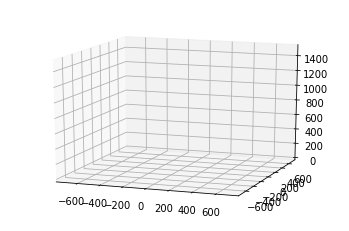

In [47]:
h36m_skel = h36m_skeleton.H36mSkeleton()
gif_file = output_dir / '3d_pose_300.gif' # output format can be .gif or .mp4 

ani = vis.vis_3d_keypoints_sequence(
    keypoints_sequence=pose3d_world[0:300],
    skeleton=h36m_skel,
    azimuth=azimuth,
    fps=60,
    output_file=gif_file
)
HTML(ani.to_jshtml())

## Convert 3D pose to BVH

In [49]:
bvh_file = output_dir / f'{video_file.stem}.bvh'
cmu_skel = cmu_skeleton.CMUSkeleton()
channels, header = cmu_skel.poses2bvh(pose3d_world, output_file=bvh_file)

In [50]:
output = 'miscs/h36m_cxk.bvh'
h36m_skel = h36m_skeleton.H36mSkeleton()
_ = h36m_skel.poses2bvh(pose3d_world, output_file=output)